# Colab Specific

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install datasets transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.0 MB/s eta 0:00:00


In [ ]:
! pip install shap optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
! pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Necessary packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import optuna
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Importing data

In [ ]:
# Define the folder path
folder_path = '/content/gdrive/MyDrive/Dissertation/Data'

df = pd.read_csv(os.path.join(folder_path,'final_query_with_race.csv'))

In [ ]:
df = pd.read_pickle("/content/gdrive/MyDrive/Dissertation/Data/final_query_with_embeddings.pkl")

In [ ]:
df_embeddings_gatortron = pd.read_pickle("/content/gdrive/MyDrive/Dissertation/Data/gatortron_embeddings.pkl")
df_embeddings_bert = pd.read_pickle("/content/gdrive/MyDrive/Dissertation/Data/bert_base_embeddings_last_hidden_state.pkl")
df_embeddings_longformer = pd.read_pickle("/content/gdrive/MyDrive/Dissertation/Data/longformer_embeddings.pkl")
df_embeddings_gatortron_all_layers = pd.read_pickle("/content/gdrive/MyDrive/Dissertation/Data/gatortron_base_embeddings_all_layers_.pkl")

In [ ]:
df_embeddings_gatortron.rename(columns={'full_token_length': 'full_token_length_gatortron'}, inplace=True)
df_embeddings_bert.rename(columns={'full_token_length': 'full_token_length_bert'}, inplace=True)
df_embeddings_longformer.rename(columns={'full_token_length': 'full_token_length_longformer'}, inplace=True)
df_embeddings_gatortron_all_layers.rename(columns={'full_token_length': 'full_token_gatortron_all_layers'}, inplace=True)


In [ ]:
df

hadm_id     admission_type  subject_id            charttime  \
0      22904305             URGENT    11029102  2132-08-12 00:00:00   
1      26084769           EW EMER.    11395953  2122-04-10 00:00:00   
2      22080506  OBSERVATION ADMIT    11508182  2148-10-10 00:00:00   
3      28963674           EW EMER.    13036184  2183-11-04 00:00:00   
4      20664061           EW EMER.    14042306  2133-11-26 00:00:00   
...         ...                ...         ...                  ...   
53582  26444801           EW EMER.    15913202  2135-10-10 00:00:00   
53583  21769291           EW EMER.    17436366  2120-05-06 00:00:00   
53584  29211352           EW EMER.    17572795  2179-11-16 00:00:00   
53585  26174763             URGENT    18426683  2160-07-16 00:00:00   
53586  24695403           EW EMER.    18968178  2119-09-14 00:00:00   

                   outtime         note_id   stay_id  age gender  \
0      2132-08-12 06:12:58  11029102-DS-16  32842923   49      F   
1      2122-04-08 14:33:24   11395953-DS-9  37317518   46      M   
2      2148-10-09 12:44:20   11508182-DS-7  35450187   68      F   
3      2183-10-28 09:24:36  13036184-DS-20  35144051   75      F   
4      2133-10-26 17:21:01   14042306-DS-7  36056807   46      F   
...                    ...             ...       ...  ...    ...   
53582  2135-10-10 14:47:01  15913202-DS-11  30635875   52      M   
53583  2120-05-02 17:40:06  17436366-DS-13  35722221   84      F   
53584  2179-11-13 18:24:50  17572795-DS-13  32513583   73      M   
53585  2160-07-16 18:11:31  18426683-DS-13  33144981   75      M   
53586  2119-09-01 16:21:52   18968178-DS-7  36337712   74      F   

                                                    text  ...  ck_cpk  ck_mb  \
0       \nName:  ___                      Unit No:   ...  ...     NaN    NaN   
1       \nName:  ___                Unit No:   ___\n ...  ...  3040.0   22.0   
2       \nName:  ___                 Unit No:   ___\n...  ...   139.0    NaN   
3       \nName:  ___                      Unit No:   ...  ...   223.0    5.5   
4       \nName:  ___                  Unit No:   ___\...  ...   276.0    6.0   
...                                                  ...  ...     ...    ...   
53582   \nName:  ___                    Unit No:   __...  ...     NaN    NaN   
53583   \nName:  ___                      Unit No:   ...  ...     NaN    NaN   
53584   \nName:  ___                  Unit No:   ___\...  ...     NaN    NaN   
53585   \nName:  ___               Unit No:   ___\n \...  ...    12.0    4.0   
53586   \nName:  ___                  Unit No:   ___\...  ...     NaN    NaN   

       ggt  oasis      sofa        gcs  apsiii  lods  aki_stage charlson  
0      NaN     30  1.003610  13.917241      13     2   0.107527        2  
1      NaN     25  6.069880  14.205882      45     5   0.082707        0  
2      NaN     15  0.000000  15.000000       9     0   0.000000        2  
3      NaN     50  7.542683  14.756757      72     7   2.140625        9  
4      NaN     24  1.241071  14.172414      17     2   0.129534        0  
...    ...    ...       ...        ...     ...   ...        ...      ...  
53582  NaN     21  0.000000  15.000000      22     1   0.250000        1  
53583  NaN     38  2.740964  14.674419      41     7   0.988166        6  
53584  NaN     34  5.958678  14.000000      50     8   0.225806        7  
53585  NaN     36  3.433373  14.601227      47     5   1.421053        8  
53586  NaN     38  5.389474  13.952381      52     8   0.584270        4  

[53587 rows x 97 columns]

# Data preprocessing

## Assigning embeddings and token lengths

In [ ]:
def assign_embeddings(df, df_list):
  merged_df = df
  for i in df_list:
    merged_df = pd.merge(merged_df, i.iloc[:,[0, 4]], on='hadm_id', how='left')
  return merged_df

def assign_token_lengths(df, df_list):
  merged_df = df
  for i in df_list:
    merged_df = pd.merge(merged_df, i.iloc[:,[0, 6]], on='hadm_id', how='left')
  return merged_df

df = assign_embeddings(df,[df_embeddings_gatortron, df_embeddings_gatortron_all_layers,df_embeddings_bert,df_embeddings_longformer])
#df = assign_embeddings(df,[df_embeddings_gatortron, df_embeddings_gatortron_all_layers,df_embeddings_bert,df_embeddings_longformer])

df = df.dropna(subset=['gatortron_base_embeddings_average'])

In [ ]:
df = assign_token_lengths(df,[df_embeddings_gatortron, df_embeddings_gatortron_all_layers,df_embeddings_bert,df_embeddings_longformer])

In [ ]:
df

hadm_id     admission_type  subject_id            charttime  \
0      22904305             URGENT    11029102  2132-08-12 00:00:00   
1      26084769           EW EMER.    11395953  2122-04-10 00:00:00   
2      22080506  OBSERVATION ADMIT    11508182  2148-10-10 00:00:00   
3      28963674           EW EMER.    13036184  2183-11-04 00:00:00   
4      20664061           EW EMER.    14042306  2133-11-26 00:00:00   
...         ...                ...         ...                  ...   
53582  26444801           EW EMER.    15913202  2135-10-10 00:00:00   
53583  21769291           EW EMER.    17436366  2120-05-06 00:00:00   
53584  29211352           EW EMER.    17572795  2179-11-16 00:00:00   
53585  26174763             URGENT    18426683  2160-07-16 00:00:00   
53586  24695403           EW EMER.    18968178  2119-09-14 00:00:00   

                   outtime         note_id   stay_id  age gender  \
0      2132-08-12 06:12:58  11029102-DS-16  32842923   49      F   
1      2122-04-08 14:33:24   11395953-DS-9  37317518   46      M   
2      2148-10-09 12:44:20   11508182-DS-7  35450187   68      F   
3      2183-10-28 09:24:36  13036184-DS-20  35144051   75      F   
4      2133-10-26 17:21:01   14042306-DS-7  36056807   46      F   
...                    ...             ...       ...  ...    ...   
53582  2135-10-10 14:47:01  15913202-DS-11  30635875   52      M   
53583  2120-05-02 17:40:06  17436366-DS-13  35722221   84      F   
53584  2179-11-13 18:24:50  17572795-DS-13  32513583   73      M   
53585  2160-07-16 18:11:31  18426683-DS-13  33144981   75      M   
53586  2119-09-01 16:21:52   18968178-DS-7  36337712   74      F   

                                                    text  ...  aki_stage  \
0       \nName:  ___                      Unit No:   ...  ...   0.107527   
1       \nName:  ___                Unit No:   ___\n ...  ...   0.082707   
2       \nName:  ___                 Unit No:   ___\n...  ...   0.000000   
3       \nName:  ___                      Unit No:   ...  ...   2.140625   
4       \nName:  ___                  Unit No:   ___\...  ...   0.129534   
...                                                  ...  ...        ...   
53582   \nName:  ___                    Unit No:   __...  ...   0.250000   
53583   \nName:  ___                      Unit No:   ...  ...   0.988166   
53584   \nName:  ___                  Unit No:   ___\...  ...   0.225806   
53585   \nName:  ___               Unit No:   ___\n \...  ...   1.421053   
53586   \nName:  ___                  Unit No:   ___\...  ...   0.584270   

       charlson                  gatortron_base_embeddings_average  \
0             2  [-0.30088443, 0.2617184, -0.15794945, 0.004040...   
1             0  [-0.27443784, 0.29789588, -0.21979217, 0.00184...   
2             2  [-0.34014314, 0.2517127, -0.21714468, 0.011929...   
3             9  [-0.24997675, 0.28216285, -0.19826198, -0.0363...   
4             0  [-0.23547588, 0.2894279, -0.24516986, -0.08409...   
...         ...                                                ...   
53582         1  [-0.12188913, 0.19008836, -0.17956415, -0.0948...   
53583         6  [-0.21326967, 0.282985, -0.17421906, -0.034861...   
53584         7  [-0.24516916, 0.16964239, -0.091739714, 0.0440...   
53585         8  [-0.31548384, 0.3078855, -0.15001139, 0.009430...   
53586         4  [-0.19028696, 0.32392785, -0.20754918, 0.00866...   

                    gatortron_base_embeddings_all_layers  \
0      [-0.9410878, 0.80115557, -0.060340658, -0.5756...   
1      [-0.7601598, 1.0179602, -0.4438809, -0.5318047...   
2      [-1.168565, 0.7554754, -0.18131693, -0.6519494...   
3      [-0.90599424, 1.0102751, -0.23457642, -0.64376...   
4      [-0.7913549, 0.909642, -0.36783996, -0.8713587...   
...                                                  ...   
53582  [-0.33597887, 0.6019221, -0.46077573, -1.01298...   
53583  [-0.6060558, 0.8769002, -0.21259211, -0.536516...   
53584  [-1.0209647, 0.6085193, 0.06432253, -

## Token Analysis

In [ ]:
df[['full_token_length_gatortron',	'full_token_gatortron_all_layers'	,'full_token_length_bert',	'full_token_length_longformer']].describe()

full_token_length_gatortron  full_token_gatortron_all_layers  \
count                 53587.000000                     53587.000000   
mean                   3253.954821                      3253.954821   
std                    1354.293130                      1354.293130   
min                     251.000000                       251.000000   
25%                    2327.500000                      2327.500000   
50%                    3027.000000                      3027.000000   
75%                    3894.000000                      3894.000000   
max                   14144.000000                     14144.000000   

       full_token_length_bert  full_token_length_longformer  
count            53587.000000                  53587.000000  
mean              3818.746188                   4480.691063  
std               1604.541451                   1875.211599  
min                275.000000                    423.000000  
25%               2719.000000                   3215.000000  
50%               3549.000000                   4156.000000  
75%               4582.000000                   5335.000000  
max              16760.000000                  33070.000000

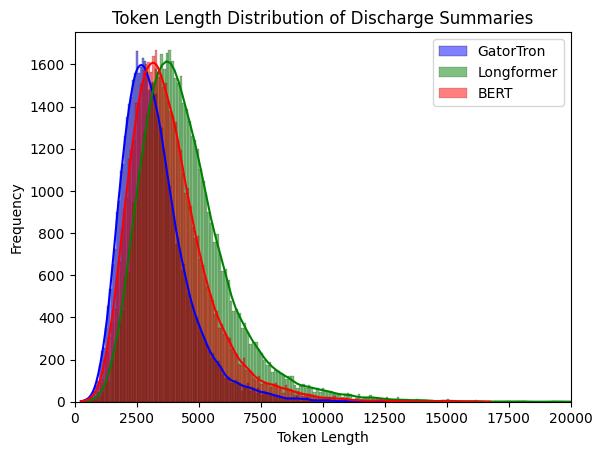

In [ ]:
import seaborn as sns

# Plot distribution for full_token_length_longformer
sns.histplot(df['full_token_length_gatortron'], kde=True, label='GatorTron', color='b')

# Plot distribution for full_token_length_longformer
sns.histplot(df['full_token_length_longformer'], kde=True, label='Longformer', color='g')

# Plot distribution for full_token_length_bert
sns.histplot(df['full_token_length_bert'], kde=True, label='BERT', color='r')

# Add title and labels
plt.title('Token Length Distribution of Discharge Summaries')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Set x-limit
plt.xlim([0, 20000])

# Show plot
plt.show()

## Loading Tokenizers

In [ ]:
from transformers import AutoModel, AutoTokenizer, AutoConfig

tokenizer= AutoTokenizer.from_pretrained('UFNLP/gatortron-base')
config=AutoConfig.from_pretrained('UFNLP/gatortron-base')
model=AutoModel.from_pretrained('UFNLP/gatortron-base')
model.to(device)


MegatronBertModel(
  (embeddings): MegatronBertEmbeddings(
    (word_embeddings): Embedding(50176, 1024, padding_idx=0)
    (position_embeddings): Embedding(512, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): MegatronBertEncoder(
    (layer): ModuleList(
      (0-23): 24 x MegatronBertLayer(
        (attention): MegatronBertAttention(
          (ln): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
          (self): MegatronBertSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): MegatronBertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
  

In [ ]:
from transformers import AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("yikuan8/Clinical-Longformer")
model = AutoModelForMaskedLM.from_pretrained("yikuan8/Clinical-Longformer")

model.to(device)

Some weights of the model checkpoint at yikuan8/Clinical-Longformer were not used when initializing LongformerForMaskedLM: ['longformer.embeddings.position_ids']
- This IS expected if you are initializing LongformerForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


LongformerForMaskedLM(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4098, 768, padding_idx=1)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
              (value_glo

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Embedding generation

In [ ]:
def extract_longformer_features(text, max_length=4096, chunk_strategy='average'):
    tokens = tokenizer.tokenize(text)
    token_len = len(tokens)
    all_embeddings = []
    max_num_chunks = int(np.ceil(token_len / (max_length - 2)))
    max_embedding_dim = None

    if token_len == 0:
        raise ValueError("The text should not be empty or contain only spaces.")

    for i in range(0, token_len, max_length - 2):
        chunk_tokens = tokens[i:i + max_length - 2]
        chunk_tokens = ['<s>'] + chunk_tokens + ['</s>']

        padding_length = max_length - len(chunk_tokens)
        padding = ['<pad>'] * padding_length
        chunk_tokens += padding

        attention_mask = [1 if token != '<pad>' else 0 for token in chunk_tokens]

        inputs = tokenizer.convert_tokens_to_ids(chunk_tokens)
        inputs = torch.tensor([inputs]).to(device)
        attention_mask = torch.tensor([attention_mask]).to(device)
        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_mask, output_hidden_states=True)

        hidden_states = outputs.hidden_states
        last_hidden_state = hidden_states[-1]

        embeddings = last_hidden_state.mean(dim=1).cpu().detach().numpy()
        all_embeddings.append(embeddings)

        if max_embedding_dim is None:
            max_embedding_dim = embeddings.shape[1]

    if chunk_strategy == 'average':
        final_embedding = np.mean(all_embeddings, axis=0).flatten()

    elif chunk_strategy == 'concatenate':
        padded_embeddings = [np.pad(embed, ((0, 0), (0, max_embedding_dim - embed.shape[1])), 'constant') for embed in all_embeddings]
        concatenated_embedding = np.concatenate(padded_embeddings, axis=1).flatten()
        final_embedding = np.pad(concatenated_embedding, (0, max_num_chunks * max_embedding_dim - concatenated_embedding.shape[0]), 'constant')

    elif chunk_strategy == 'first':
        first_chunk = all_embeddings[0]
        final_embedding = np.pad(first_chunk, ((0, 0), (0, max_embedding_dim - first_chunk.shape[1])), 'constant').flatten()

    elif chunk_strategy == 'last':
        last_chunk = all_embeddings[-1]
        final_embedding = np.pad(last_chunk, ((0, 0), (0, max_embedding_dim - last_chunk.shape[1])), 'constant').flatten()

    else:
        raise ValueError("Invalid chunk strategy. Choose from ['average', 'concatenate', 'first', 'last']")

    return final_embedding, all_embeddings, token_len, max_num_chunks

# Note: Define `tokenizer`, `model`, and `device` before using this function.

In [ ]:
import torch
import numpy as np

def extract_bert_features(text, max_length=512, chunk_strategy='average'):
    tokens = tokenizer.tokenize(text)
    token_len = len(tokens)
    all_embeddings = []
    max_num_chunks = int(np.ceil(token_len / (max_length - 2)))
    max_embedding_dim = None

    if token_len == 0:
        raise ValueError("The text should not be empty or contain only spaces.")

    for i in range(0, token_len, max_length - 2):
        chunk_tokens = tokens[i:i + max_length - 2]
        chunk_tokens = ['[CLS]'] + chunk_tokens + ['[SEP]']

        padding_length = max_length - len(chunk_tokens)
        padding = ['[PAD]'] * padding_length
        chunk_tokens += padding

        attention_mask = [1 if token != '[PAD]' else 0 for token in chunk_tokens]

        inputs = tokenizer.convert_tokens_to_ids(chunk_tokens)
        inputs = torch.tensor([inputs]).to(device)
        attention_mask = torch.tensor([attention_mask]).to(device)

        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_mask)

        embeddings = outputs.last_hidden_state.mean(dim=1).cpu().detach().numpy()
        all_embeddings.append(embeddings)

        if max_embedding_dim is None:
            max_embedding_dim = embeddings.shape[1]

    if chunk_strategy == 'average':
        final_embedding = np.mean(all_embeddings, axis=0).flatten()

    elif chunk_strategy == 'concatenate':
        padded_embeddings = [np.pad(embed, ((0, 0), (0, max_embedding_dim - embed.shape[1])), 'constant') for embed in all_embeddings]
        concatenated_embedding = np.concatenate(padded_embeddings, axis=1).flatten()
        final_embedding = np.pad(concatenated_embedding, (0, max_num_chunks * max_embedding_dim - concatenated_embedding.shape[0]), 'constant')

    elif chunk_strategy == 'first':
        first_chunk = all_embeddings[0]
        final_embedding = np.pad(first_chunk, ((0, 0), (0, max_embedding_dim - first_chunk.shape[1])), 'constant').flatten()

    elif chunk_strategy == 'last':
        last_chunk = all_embeddings[-1]
        final_embedding = np.pad(last_chunk, ((0, 0), (0, max_embedding_dim - last_chunk.shape[1])), 'constant').flatten()

    else:
        raise ValueError("Invalid chunk strategy. Choose from ['average', 'concatenate', 'first', 'last']")

    return final_embedding, all_embeddings, token_len, max_num_chunks

# Note: Define `tokenizer`, `model`, and `device` before using this function.

In [ ]:
import torch
import numpy as np

def extract_bert_features_all_layers(text, max_length=512, chunk_strategy='average'):
    tokens = tokenizer.tokenize(text)
    token_len = len(tokens)
    all_embeddings = []
    max_num_chunks = int(np.ceil(token_len / (max_length - 2)))
    max_embedding_dim = None

    if token_len == 0:
        raise ValueError("The text should not be empty or contain only spaces.")

    for i in range(0, token_len, max_length - 2):
        chunk_tokens = tokens[i:i + max_length - 2]
        chunk_tokens = ['[CLS]'] + chunk_tokens + ['[SEP]']

        padding_length = max_length - len(chunk_tokens)
        padding = ['[PAD]'] * padding_length
        chunk_tokens += padding

        attention_mask = [1 if token != '[PAD]' else 0 for token in chunk_tokens]

        inputs = tokenizer.convert_tokens_to_ids(chunk_tokens)
        inputs = torch.tensor([inputs]).to(device)
        attention_mask = torch.tensor([attention_mask]).to(device)

        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_mask, output_hidden_states=True)

        # Extract hidden states and average them
        hidden_states = outputs.hidden_states[1:]  # Exclude the initial embedding layer
        stacked_hidden_states = torch.stack(hidden_states, dim=0)
        averaged_hidden_states = torch.mean(stacked_hidden_states, dim=0)

        # Flatten the tensor and detach it from the computational graph
        embeddings = averaged_hidden_states.mean(dim=1).cpu().detach().numpy()
        all_embeddings.append(embeddings)

        if max_embedding_dim is None:
            max_embedding_dim = embeddings.shape[1]

    if chunk_strategy == 'average':
        final_embedding = np.mean(all_embeddings, axis=0).flatten()
    elif chunk_strategy == 'concatenate':
        padded_embeddings = [np.pad(embed, ((0, 0), (0, max_embedding_dim - embed.shape[1])), 'constant') for embed in all_embeddings]
        concatenated_embedding = np.concatenate(padded_embeddings, axis=1).flatten()
        final_embedding = np.pad(concatenated_embedding, (0, max_num_chunks * max_embedding_dim - concatenated_embedding.shape[0]), 'constant')
    elif chunk_strategy == 'first':
        first_chunk = all_embeddings[0]
        final_embedding = np.pad(first_chunk, ((0, 0), (0, max_embedding_dim - first_chunk.shape[1])), 'constant').flatten()
    elif chunk_strategy == 'last':
        last_chunk = all_embeddings[-1]
        final_embedding = np.pad(last_chunk, ((0, 0), (0, max_embedding_dim - last_chunk.shape[1])), 'constant').flatten()
    else:
        raise ValueError("Invalid chunk strategy. Choose from ['average', 'concatenate', 'first', 'last']")

    return final_embedding, all_embeddings, token_len, max_num_chunks

# Note: Define `tokenizer`, `model`, and `device` before using this function.


In [ ]:
df

hadm_id                                               text  \
0      27089790   \nName:  ___                   Unit No:   ___...   
1      20296034   \nName:  ___                 Unit No:   ___\n...   
2      24113307   \nName:  ___                 Unit No:   ___\n...   
3      28904663   \nName:  ___                    Unit No:   __...   
4      26968912   \nName:  ___                  Unit No:   ___\...   
...         ...                                                ...   
65324  29899720   \nName:  ___                    Unit No:   __...   
65325  26041417   \nName:  ___                  Unit No:   ___\...   
65326  20500252   \nName:  ___               Unit No:   ___\n \...   
65327  20835272   \nName:  ___.               Unit No:   ___\n ...   
65328  23458917   \nName:  ___                 Unit No:   ___\n...   

              note_id            charttime  
0      10012552-DS-12  2140-03-30 00:00:00  
1       10122589-DS-7  2180-09-10 00:00:00  
2       10150335-DS-6  2144-09-17 00:00:00  
3      10160622-DS-17  2176-01-19 00:00:00  
4      10172118-DS-13  2124-04-24 00:00:00  
...               ...                  ...  
65324  19723724-DS-19  2123-06-26 00:00:00  
65325  19800197-DS-16  2175-10-24 00:00:00  
65326  19820806-DS-10  2115-01-14 00:00:00  
65327   19832246-DS-9  2192-09-24 00:00:00  
65328  19935891-DS-19  2139-04-05 00:00:00  

[65329 rows x 4 columns]

In [ ]:
from tqdm import tqdm
import pandas as pd

tqdm.pandas()

def wrapper_function(x):
    final_embedding, chunk_embeddings, token_len, num_chunks = extract_longformer_features(x, chunk_strategy='average')
    return pd.Series([final_embedding, num_chunks, token_len] + chunk_embeddings)

# Apply function and get new DataFrame
new_df = df['text'].progress_apply(wrapper_function)

# Rename columns
new_df.rename(columns={0: 'longformer_embeddings', 1: 'num_chunks', 2: 'full_token_length'}, inplace=True)
for i in range(3, new_df.shape[1]):
    new_df.rename(columns={i: f'longformer_chunk_embedding_{i-2}'}, inplace=True)

# Concatenate the new DataFrame with the original one
df = pd.concat([df, new_df], axis=1)


 97%|█████████▋| 63355/65329 [4:07:58<07:43,  4.26it/s]

In [ ]:
# Save DataFrame
df.to_pickle("/content/gdrive/MyDrive/Dissertation/Data/final_query_with_embeddings_extra.pkl")


In [ ]:
from google.colab import runtime
runtime.unassign()

## Feature scaling and selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

def preprocess_scaling(df, continuous_features, binary_features, categorical_features):
    """
    Preprocesses the given DataFrame.

    Parameters:
        df (DataFrame): The DataFrame to preprocess.
        continuous_features (list): List of continuous feature columns to scale.
        binary_features (list): List of binary feature columns to scale.
        categorical_features (list): List of categorical feature columns to encode.

    Returns:
        DataFrame: A new DataFrame with preprocessed features.
    """
    scaler = MinMaxScaler()

    # Scale continuous features
    scaled_features = {}
    for feature in continuous_features:
        values = df[[feature]].values
        scaled_values = scaler.fit_transform(values)
        scaled_features[f"{feature}"] = scaled_values.flatten()

    # Scale binary features
    for feature in binary_features:
        values = df[[feature]].values
        scaled_values = scaler.fit_transform(values)
        scaled_features[f"{feature}"] = scaled_values.flatten()

    # One-hot encode categorical features
    encoder = OneHotEncoder(sparse=False)
    for feature in categorical_features:
        values = df[[feature]].values
        encoded_values = encoder.fit_transform(values)

        # If there are more than 2 categories, encoder.get_feature_names_out() will give appropriate names
        encoded_columns = encoder.get_feature_names_out([feature])
        for i, col_name in enumerate(encoded_columns):
            scaled_features[col_name] = encoded_values[:, i]

    return pd.DataFrame(scaled_features)

### Feature Engineering

In [ ]:
# Ethnicity needs to be mapped to fewer categories
mapping_dict = {
    'BLACK/AFRICAN AMERICAN': 'BLACK',
    'HISPANIC OR LATINO': 'HISPANIC',
    'WHITE': 'WHITE',
    'UNKNOWN': 'OTHER',
    'WHITE - BRAZILIAN': 'WHITE',
    'OTHER': 'OTHER',
    'HISPANIC/LATINO - PUERTO RICAN': 'HISPANIC',
    'ASIAN - SOUTH EAST ASIAN': 'ASIAN',
    'BLACK/CAPE VERDEAN': 'BLACK',
    'WHITE - EASTERN EUROPEAN': 'WHITE',
    'WHITE - OTHER EUROPEAN': 'WHITE',
    'HISPANIC/LATINO - CUBAN': 'HISPANIC',
    'UNABLE TO OBTAIN': 'OTHER',
    'BLACK/CARIBBEAN ISLAND': 'BLACK',
    'WHITE - RUSSIAN': 'WHITE',
    'ASIAN': 'ASIAN',
    'ASIAN - ASIAN INDIAN': 'ASIAN',
    'PATIENT DECLINED TO ANSWER': 'OTHER',
    'BLACK/AFRICAN': 'BLACK',
    'ASIAN - CHINESE': 'ASIAN',
    'MULTIPLE RACE/ETHNICITY': 'OTHER',
    'HISPANIC/LATINO - SALVADORAN': 'HISPANIC',
    'HISPANIC/LATINO - HONDURAN': 'HISPANIC',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'OTHER',
    'HISPANIC/LATINO - DOMINICAN': 'HISPANIC',
    'HISPANIC/LATINO - COLUMBIAN': 'HISPANIC',
    'AMERICAN INDIAN/ALASKA NATIVE': 'OTHER',
    'PORTUGUESE': 'WHITE',
    'HISPANIC/LATINO - GUATEMALAN': 'HISPANIC',
    'SOUTH AMERICAN': 'HISPANIC',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'HISPANIC',
    'HISPANIC/LATINO - MEXICAN': 'HISPANIC',
    'ASIAN - KOREAN': 'ASIAN',
}

df['ethnicity'] = df['race'].map(mapping_dict)

In [ ]:
# Select the features to be used
df_features = df[['age','gender', 'text', 'los', 'readmitted_next',
       'is_readmission', 'prior_admissions', 'avg_heart_rate',
       'avg_sbp', 'avg_dbp', 'avg_mbp', 'avg_sbp_ni', 'avg_dbp_ni',
       'avg_mbp_ni', 'avg_resp_rate', 'avg_temperature', 'avg_spo2',
       'avg_glucose', 'max_heart_rate', 'max_sbp', 'max_dbp', 'max_mbp',
       'max_sbp_ni', 'max_dbp_ni', 'max_mbp_ni', 'max_resp_rate',
       'max_temperature', 'max_spo2', 'max_glucose', 'min_heart_rate',
       'min_sbp', 'min_dbp', 'min_mbp', 'min_sbp_ni', 'min_dbp_ni',
       'min_mbp_ni', 'min_resp_rate', 'min_temperature', 'min_spo2',
       'min_glucose', 'last_heart_rate', 'last_sbp', 'last_dbp', 'last_mbp',
       'last_sbp_ni', 'last_dbp_ni', 'last_mbp_ni', 'last_resp_rate',
       'last_temperature', 'last_spo2', 'last_glucose', 'hemoglobin',
       'platelets', 'wbc', 'albumin', 'aniongap', 'bicarbonate', 'bun',
       'calcium', 'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'inr', 'oasis', 'sofa', 'gcs', 'apsiii', 'lods', 'aki_stage', 'charlson',
        'ethnicity', 'insurance']]

In [ ]:
df_features = df_features.apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
# List of column prefixes to calculate differences between avg and last vitals
column_prefixes = ['heart_rate', 'sbp', 'dbp', 'mbp', 'sbp_ni', 'dbp_ni', 'mbp_ni',
                   'resp_rate', 'temperature', 'spo2', 'glucose']

# Loop through the column prefixes and calculate the difference
for prefix in column_prefixes:
    avg_col = f'avg_{prefix}'
    last_col = f'last_{prefix}'
    diff_col = f'diff_{prefix}'

    # Make sure both columns exist in the DataFrame before calculating the difference
    if avg_col in df_features.columns and last_col in df_features.columns:
        df_features[diff_col] = df_features[last_col] - df_features[avg_col]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# Preprocess features
continuous_features = ['age', 'is_readmission', 'los', 'prior_admissions', 'oasis', 'sofa', 'gcs', 'apsiii', 'lods', 'aki_stage', 'charlson', 'diff_heart_rate',
       'diff_sbp', 'diff_dbp', 'diff_mbp', 'diff_sbp_ni', 'diff_dbp_ni',
       'diff_mbp_ni', 'diff_resp_rate', 'diff_temperature', 'diff_spo2',
       'diff_glucose','avg_heart_rate',
       'avg_sbp', 'avg_dbp', 'avg_mbp', 'avg_sbp_ni', 'avg_dbp_ni',
       'avg_mbp_ni', 'avg_resp_rate', 'avg_temperature', 'avg_spo2',
       'avg_glucose', 'max_heart_rate', 'max_sbp', 'max_dbp', 'max_mbp',
       'max_sbp_ni', 'max_dbp_ni', 'max_mbp_ni', 'max_resp_rate',
       'max_temperature', 'max_spo2', 'max_glucose', 'min_heart_rate',
       'min_sbp', 'min_dbp', 'min_mbp', 'min_sbp_ni', 'min_dbp_ni',
       'min_mbp_ni', 'min_resp_rate', 'min_temperature', 'min_spo2',
       'min_glucose', 'last_heart_rate', 'last_sbp', 'last_dbp', 'last_mbp',
       'last_sbp_ni', 'last_dbp_ni', 'last_mbp_ni', 'last_resp_rate',
       'last_temperature', 'last_spo2', 'last_glucose', 'hemoglobin',
       'platelets', 'wbc', 'aniongap', 'bicarbonate', 'bun',
       'calcium', 'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'inr']
binary_features = ['is_readmission']
categorical_features = ['gender','ethnicity','insurance']

df_features = preprocess_scaling(df_features, continuous_features, binary_features, categorical_features)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


### Transform features for model ingestion

In [ ]:
# Comment out features or embeddings

#Convert list of embeddings into a 2D numpy array
embedding_matrix = np.stack(df['gatortron_base_embeddings_average'].values)

#X = df_features.to_numpy()
X = np.hstack([embedding_matrix])

# Combine features
#X = np.hstack([embedding_matrix, df_features.to_numpy()])

#### Upsampling + Downsampling

In [ ]:
import pandas as pd
import numpy as np

# Assuming X_train, y_train are NumPy arrays and you've already done the train-test split.
# Convert them to DataFrame and Series respectively
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
y_train_series = pd.Series(y_train, name='target')

# Combine them into a single DataFrame
train_data = pd.concat([X_train_df, y_train_series], axis=1)

# Separate by class
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Count the number of samples in majority class
majority_count = len(majority_class)

# Randomly sample from minority class to match majority class count, with replacement
minority_upsampled = minority_class.sample(n=majority_count, replace=True, random_state=42)

# Combine the upsampled minority and original majority DataFrames
train_data_upsampled = pd.concat([minority_upsampled, majority_class], axis=0)

# Shuffle the data
train_data_upsampled = train_data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate into X and y again
X_train_upsampled = train_data_upsampled.drop(['target'], axis=1).to_numpy()
y_train_upsampled = train_data_upsampled['target'].to_numpy()

# Now you can train your model with X_train_upsampled and y_train_upsampled



In [ ]:
import pandas as pd
import numpy as np

# Assuming X_train, y_train are NumPy arrays and you've already done the train-test split.
# Convert them to DataFrame and Series respectively
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
y_train_series = pd.Series(y_train, name='target')

# Combine them into a single DataFrame
train_data = pd.concat([X_train_df, y_train_series], axis=1)

# Separate by class
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Count the number of samples in minority class
minority_count = len(minority_class)

# Randomly sample from majority class to match minority class count
majority_downsampled = majority_class.sample(n=minority_count, random_state=42)

# Combine the downsampled majority and original minority DataFrames
train_data_downsampled = pd.concat([majority_downsampled, minority_class], axis=0)

# Shuffle the data
train_data_downsampled = train_data_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate into X and y again
X_train_downsampled = train_data_downsampled.drop(['target'], axis=1).to_numpy()
y_train_downsampled = train_data_downsampled['target'].to_numpy()

# Now you can train your model with X_train_downsampled and y_train_downsampled



#### Sanity Test Embeddings

In [ ]:
import pandas as pd

# Create a new column to hold the length of each list
df['list_length'] = df['gatortron_base_embeddings_average'].apply(len)

# Show the new DataFrame with the lengths
print("DataFrame with list lengths:")
print(df)

# Basic statistics on the list lengths
print("\nBasic statistics:")
print(df['list_length'].describe())

# Value counts to see the frequency of each length
print("\nValue counts:")
print(df['list_length'].value_counts())


DataFrame with list lengths:
        hadm_id     admission_type  subject_id            charttime  \
0      25136353  OBSERVATION ADMIT    10107664  2162-01-27 00:00:00   
1      24997910  OBSERVATION ADMIT    10139992  2123-08-24 00:00:00   
2      26142813           EW EMER.    12059353  2173-09-01 00:00:00   
3      20295915             URGENT    14023173  2152-09-25 00:00:00   
4      21043056           EW EMER.    14102375  2180-08-04 00:00:00   
...         ...                ...         ...                  ...   
53582  23583209           EW EMER.    16597826  2133-01-27 00:00:00   
53583  26240611  OBSERVATION ADMIT    17740819  2181-02-26 00:00:00   
53584  26875586  OBSERVATION ADMIT    18038634  2187-04-22 00:00:00   
53585  23814766           EW EMER.    19443521  2123-05-28 00:00:00   
53586  29286783             URGENT    19989918  2178-07-21 00:00:00   

              note_id   stay_id  age gender  \
0      10107664-DS-13  33287202   79      M   
1      10139992-DS-22  3

In [ ]:
df

hadm_id     admission_type  subject_id            charttime  \
0      25136353  OBSERVATION ADMIT    10107664  2162-01-27 00:00:00   
1      24997910  OBSERVATION ADMIT    10139992  2123-08-24 00:00:00   
2      26142813           EW EMER.    12059353  2173-09-01 00:00:00   
3      20295915             URGENT    14023173  2152-09-25 00:00:00   
4      21043056           EW EMER.    14102375  2180-08-04 00:00:00   
...         ...                ...         ...                  ...   
53582  23583209           EW EMER.    16597826  2133-01-27 00:00:00   
53583  26240611  OBSERVATION ADMIT    17740819  2181-02-26 00:00:00   
53584  26875586  OBSERVATION ADMIT    18038634  2187-04-22 00:00:00   
53585  23814766           EW EMER.    19443521  2123-05-28 00:00:00   
53586  29286783             URGENT    19989918  2178-07-21 00:00:00   

              note_id   stay_id  age gender  \
0      10107664-DS-13  33287202   79      M   
1      10139992-DS-22  37614564   54      M   
2      12059353-DS-12  39022933   88      F   
3      14023173-DS-11  35731396   72      M   
4      14102375-DS-12  32499957   70      F   
...               ...       ...  ...    ...   
53582  16597826-DS-18  30489239   87      M   
53583  17740819-DS-10  34660872   72      M   
53584  18038634-DS-10  39721354   18      F   
53585  19443521-DS-11  36381866   48      F   
53586  19989918-DS-23  33220923   50      M   

                                                    text        los  ...  \
0       \nName:  ___               Unit No:   ___\n \...   2.910347  ...   
1       \nName:  ___                 Unit No:   ___\n...   1.956146  ...   
2       \nName:  ___                      Unit No:   ...   4.583507  ...   
3       \nName:  ___                     Unit No:   _...   1.069167  ...   
4       \nName:  ___                   Unit No:   ___...   0.881481  ...   
...                                                  ...        ...  ...   
53582   \nName:  ___                Unit No:   ___\n ...  18.958785  ...   
53583   \nName:  ___                   Unit No:   ___...   1.329780  ...   
53584   \nName:  ___                    Unit No:   __...   1.005463  ...   
53585   \nName:  ___                     Unit No:   _...   2.424664  ...   
53586   \nName:  ___                   Unit No:   ___...   3.736968  ...   

           sofa        gcs  apsiii  lods  aki_stage  charlson  \
0      6.705882  14.875000      63     8   2.226415         8   
1      9.208333  15.000000      37     6   0.693878         5   
2      2.392523  13.961538      47     6   1.593023         8   
3      5.692308  15.000000      41     6   0.363636         6   
4      0.636364  15.000000      35     2   0.000000         3   
...         ...        ...     ...   ...        ...       ...   
53582  2.643805  14.048485      25     2   0.495238         9   
53583  2.750000  13.666667      24     4   0.200000         6   
53584  1.000000  15.000000      37     1   0.000000         0   
53585  1.517241  14.909091      26     6   2.041667         8   
53586  1.500000  14.800000      14     1   1.423077         1   

                       gatortron_base_embeddings_average  \
0      [-0.1898342, 0.28806663, -0.1646405, -0.026281...   
1      [-0.21110252, 0.17286946, -0.24761656, -0.0440...   
2      [-0.31758744, 0.2911248, -0.24020799, 0.002299...   
3      [-0.25194445, 0.32171336, -0.21026617, 0.01841...   
4      [-0.26154065, 0.2635733, -0.1964773, -0.036876...   
...                                                  ...   
53582  [-0.2399231, 0.21294834, -0.1990951, 0.0088480...   
53583  [-0.27230933, 0.261899, -0.16797172, -0.064283...   
53584  [-0.23642123, 0.29841447, -0.119946375, -0.084...   
53585  [-0.29987562, 0.26715216, -0.21201093, 0.01874...   
53586  [-0.3225086, 0.21548808, -0.23680265, -0.02750...   

                    gatortron_base_embeddings_all_layers  \
0      [-0.7324738, 1.0949994, -0.15780465, -0.711532...   
1      [-0.8381315, 0.5288538, -0.26679787, -0.737448..

### Test Train Split

In [ ]:
#Convert list of embeddings into a 2D numpy array
embedding_matrix = np.stack(df['gatortron_base_embeddings_all_layers'].values)

# Combine features
#X = np.hstack([embedding_matrix, df_features.to_numpy()])

#X = df_features.to_numpy()
X = np.hstack([embedding_matrix])

y = df['readmitted_next'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating models

In [ ]:
# Bootstrapping methods to calculate 95% Confidence intervals
def bootstrap_auc(y_true, y_pred, n_bootstraps=1000, rng_seed=42):
    n = len(y_true)
    rng = np.random.RandomState(rng_seed)
    bootstrapped_aucs = []

    for i in range(n_bootstraps):
        indices = rng.randint(0, n, n)
        sample_true = y_true[indices]
        sample_pred = y_pred[indices]

        if len(np.unique(sample_true)) == 2:
            fpr, tpr, _ = roc_curve(sample_true, sample_pred)
            roc_auc = auc(fpr, tpr)
            bootstrapped_aucs.append(roc_auc)

    sorted_aucs = np.array(bootstrapped_aucs)
    sorted_aucs.sort()

    lower = np.percentile(sorted_aucs, 5)
    upper = np.percentile(sorted_aucs, 95)

    return lower, upper

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, make_scorer


def bootstrap_metric(y_true, y_pred, metric_func, n_bootstraps=1000, rng_seed=42):
    n = len(y_true)
    rng = np.random.RandomState(rng_seed)
    bootstrapped_scores = []

    for i in range(n_bootstraps):
        indices = rng.randint(0, n, n)
        sample_true = y_true[indices]
        sample_pred = y_pred[indices]

        if len(np.unique(sample_true)) == 2:
            score = metric_func(sample_true, sample_pred)
            bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    lower = np.percentile(sorted_scores, 5)
    upper = np.percentile(sorted_scores, 95)

    return lower, upper


## XGBoost

In [ ]:
import optuna
import shap

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Optuna objective
def objective(trial, X, y, class_weight):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'random_state': 42,
        'scale_pos_weight': class_weight,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'gamma': trial.suggest_float('gamma', 0.0, 0.4),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'alpha': trial.suggest_float('alpha', 0.0, 0.2)
    }

    classifier = xgb.XGBClassifier(**params)
    return cross_val_score(classifier, X, y, n_jobs=-1, cv=3, scoring='roc_auc').mean()

In [ ]:
df_features.columns

Index(['age', 'is_readmission', 'los', 'prior_admissions', 'oasis', 'sofa',
       'gcs', 'apsiii', 'lods', 'aki_stage', 'charlson', 'diff_heart_rate',
       'diff_sbp', 'diff_dbp', 'diff_mbp', 'diff_sbp_ni', 'diff_dbp_ni',
       'diff_mbp_ni', 'diff_resp_rate', 'diff_temperature', 'diff_spo2',
       'diff_glucose', 'avg_heart_rate', 'avg_sbp', 'avg_dbp', 'avg_mbp',
       'avg_sbp_ni', 'avg_dbp_ni', 'avg_mbp_ni', 'avg_resp_rate',
       'avg_temperature', 'avg_spo2', 'avg_glucose', 'max_heart_rate',
       'max_sbp', 'max_dbp', 'max_mbp', 'max_sbp_ni', 'max_dbp_ni',
       'max_mbp_ni', 'max_resp_rate', 'max_temperature', 'max_spo2',
       'max_glucose', 'min_heart_rate', 'min_sbp', 'min_dbp', 'min_mbp',
       'min_sbp_ni', 'min_dbp_ni', 'min_mbp_ni', 'min_resp_rate',
       'min_temperature', 'min_spo2', 'min_glucose', 'last_heart_rate',
       'last_sbp', 'last_dbp', 'last_mbp', 'last_sbp_ni', 'last_dbp_ni',
       'last_mbp_ni', 'last_resp_rate', 'last_temperature', 'last_spo2

In [ ]:
def run_XGBoost(df, column, strategy):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    if strategy == 'all':
      #Convert list of embeddings into a 2D numpy array
      embedding_matrix = np.stack(df[column].values)
      # Combine features
      X = np.hstack([embedding_matrix, df_features.to_numpy()])
      feature_names = ['Note Embedding'] * len(embedding_matrix) + list(df_features.columns)
    elif strategy == 'embeddings':
      #Convert list of embeddings into a 2D numpy array
      embedding_matrix = np.stack(df[column].values)
      X = np.hstack([embedding_matrix])
      feature_names=['Note Embedding'] * len(embedding_matrix)
    elif strategy == 'values':
      X = df_features.to_numpy()
      list(df_features.columns)
      feature_names = list(df_features.columns)

    # Label and class_weight
    y = df['readmitted_next'].values

    # Train-test split
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    unique_values, counts = np.unique(y_temp, return_counts=True)
    class_weight = df.readmitted_next.value_counts()[0] / df.readmitted_next.value_counts()[1]

    # Hyperparameter optimization
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, class_weight), n_trials=15)
    best_params = study.best_params
    print(best_params)

    # Fit the model
    classifier = xgb.XGBClassifier(**best_params, scale_pos_weight=class_weight, random_state=42)
    eval_set = [(X_train, y_train), (X_val, y_val)]
    classifier.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

    unique_values, counts = np.unique(y_test, return_counts=True)
    positive_class_ratio = counts[1]/counts[0]

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC Score: {roc_auc}')

    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # Make predictions and get the prediction probabilities
    y_pred_prob = classifier.predict_proba(X_test)[:,1]  # probabilities for the positive outcome
    # Compute ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Chance')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Compute Precision-Recall curve values
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    # Plotting Precision-Recall Curve
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.axhline(y=positive_class_ratio, color='r', linestyle='--', label='Random Chance')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

    # Plotting Loss Curves
    results = classifier.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()

    y_scores = classifier.predict(X_test).ravel()
    y_true = y_test

    # Compute precision-recall pairs
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    # Find the closest precision to 0.8
    idx = np.argmin(np.abs(precision - 0.8))

    # Corresponding recall
    recall_at_precision_80 = recall[idx]

    print(f"Recall at a precision of 80% is: {recall_at_precision_80}")

    lower_auc, upper_auc = bootstrap_auc(y_test, y_scores)
    print(f"AUC Confidence interval: ({lower_auc}, {upper_auc})")
    # Initialize the SHAP explainer
    explainer = shap.Explainer(classifier)

    # Generate SHAP values for a subset of the test data
    shap_values = explainer(X_test[:1000])  # Using the first 1000 samples for faster computation

    # Create a SHAP summary plot
    shap.summary_plot(shap_values, X_test[:1000],feature_names=feature_names)

    classifier.save_model(f"xgboost_model{column}_{strategy}.json")

### Gatortron Average - Embeddings

[I 2023-09-12 17:55:31,630] A new study created in memory with name: no-name-152136e0-9924-4c0e-8974-379c0898cfab
[I 2023-09-12 17:56:08,832] Trial 0 finished with value: 0.7098280154503006 and parameters: {'learning_rate': 0.17975204727351396, 'n_estimators': 149, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.0358016088785563, 'subsample': 0.7114838896752561, 'alpha': 0.0701165240310091}. Best is trial 0 with value: 0.7098280154503006.
[I 2023-09-12 17:56:19,523] Trial 1 finished with value: 0.7566121172622626 and parameters: {'learning_rate': 0.035159250316108615, 'n_estimators': 111, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.03004823080560808, 'subsample': 0.5602632838094803, 'alpha': 0.11257209433430376}. Best is trial 1 with value: 0.7566121172622626.
[I 2023-09-12 17:56:40,257] Trial 2 finished with value: 0.7434256471250925 and parameters: {'learning_rate': 0.08523277055143805, 'n_estimators': 115, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.3150257962028542, '

{'learning_rate': 0.09954145750452353, 'n_estimators': 166, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.17525192151594898, 'subsample': 0.5802080981887084, 'alpha': 0.13958064067933074}
Accuracy: 0.7187908191826833
Precision: 0.33314809669352596
Recall: 0.661334804191947
F1 Score: 0.4430894308943089
ROC AUC Score: 0.695911646902262


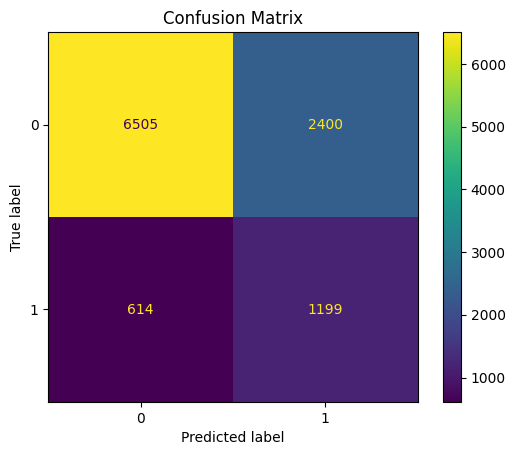

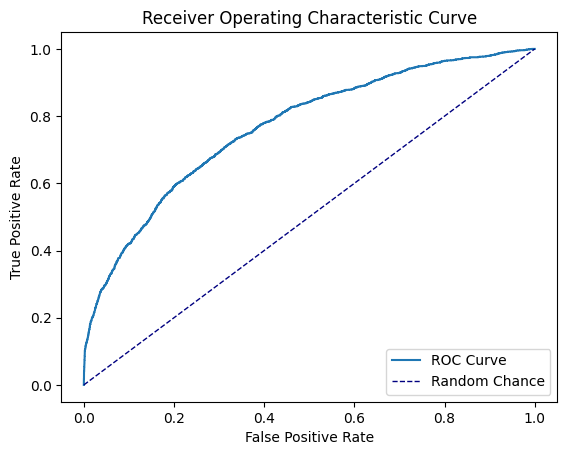

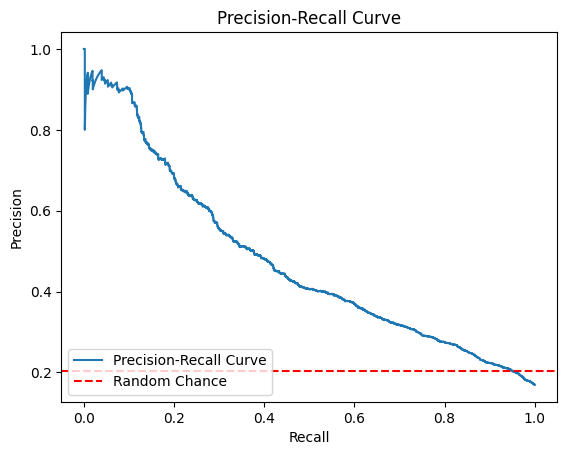

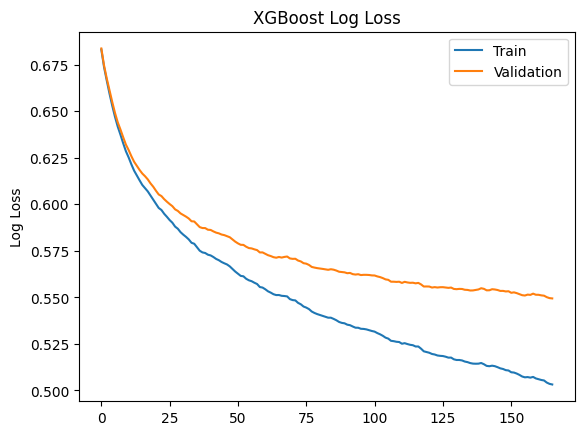

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.6860305291956562, 0.7061747013559232)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


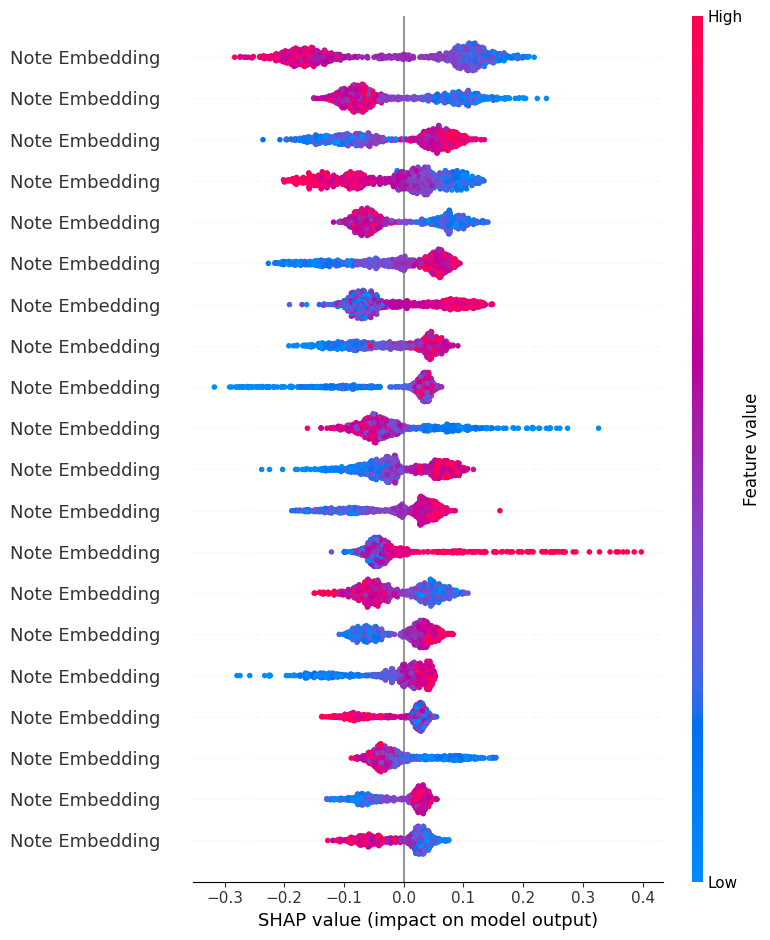

In [ ]:
run_XGBoost(df,'gatortron_base_embeddings_average', 'embeddings')

### Static Features




[I 2023-09-12 18:02:14,570] A new study created in memory with name: no-name-f013f044-a941-4e45-a215-2bf55eda51fc
[I 2023-09-12 18:02:16,837] Trial 0 finished with value: 0.7328930064016932 and parameters: {'learning_rate': 0.07552881001946188, 'n_estimators': 74, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.06394444581969516, 'subsample': 0.6301648220824676, 'alpha': 0.12611055816627262}. Best is trial 0 with value: 0.7328930064016932.
[I 2023-09-12 18:02:18,862] Trial 1 finished with value: 0.7124168822801895 and parameters: {'learning_rate': 0.23904624508318917, 'n_estimators': 155, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.374142399527798, 'subsample': 0.8277050583887912, 'alpha': 0.1806431279761731}. Best is trial 0 with value: 0.7328930064016932.
[I 2023-09-12 18:02:22,369] Trial 2 finished with value: 0.6864314271113333 and parameters: {'learning_rate': 0.17838900942254063, 'n_estimators': 145, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.22963491168575378, 'su

{'learning_rate': 0.0521571942119064, 'n_estimators': 147, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.34483394266246536, 'subsample': 0.5426201398315669, 'alpha': 0.09253740518260985}
Accuracy: 0.6954655719350625
Precision: 0.3115094829825929
Recall: 0.661334804191947
F1 Score: 0.42352525609325326
ROC AUC Score: 0.6818745890695838


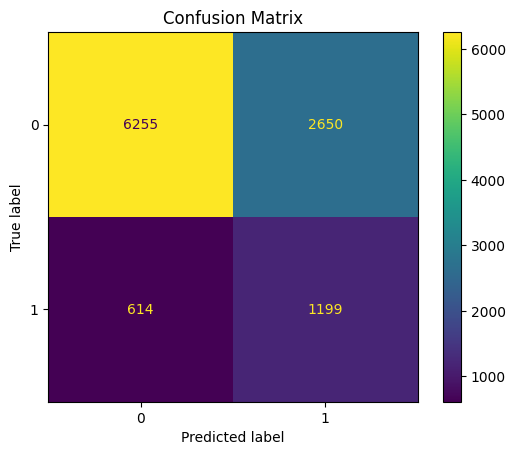

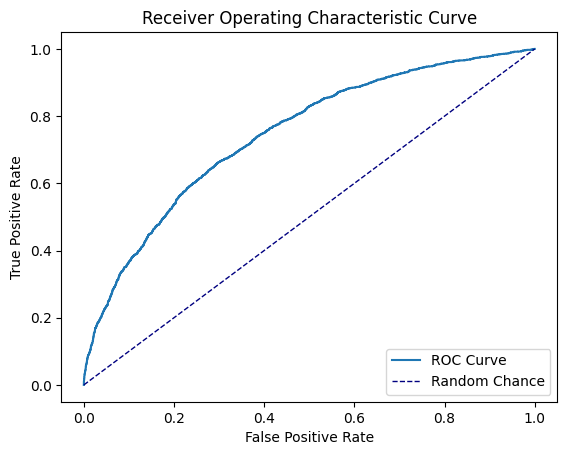

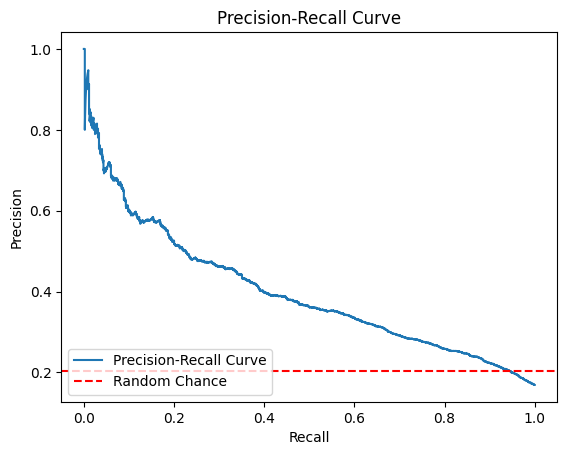

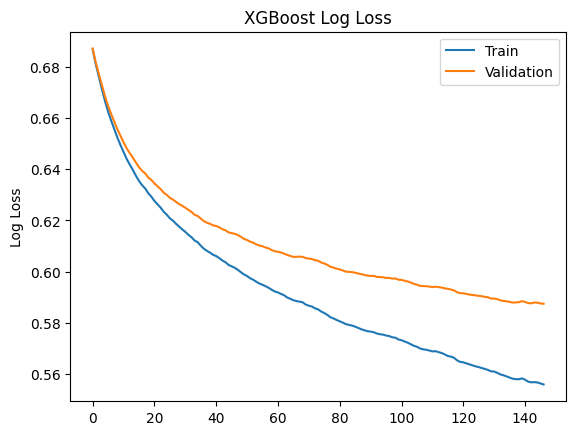

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.6718805173531308, 0.6920494966185381)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


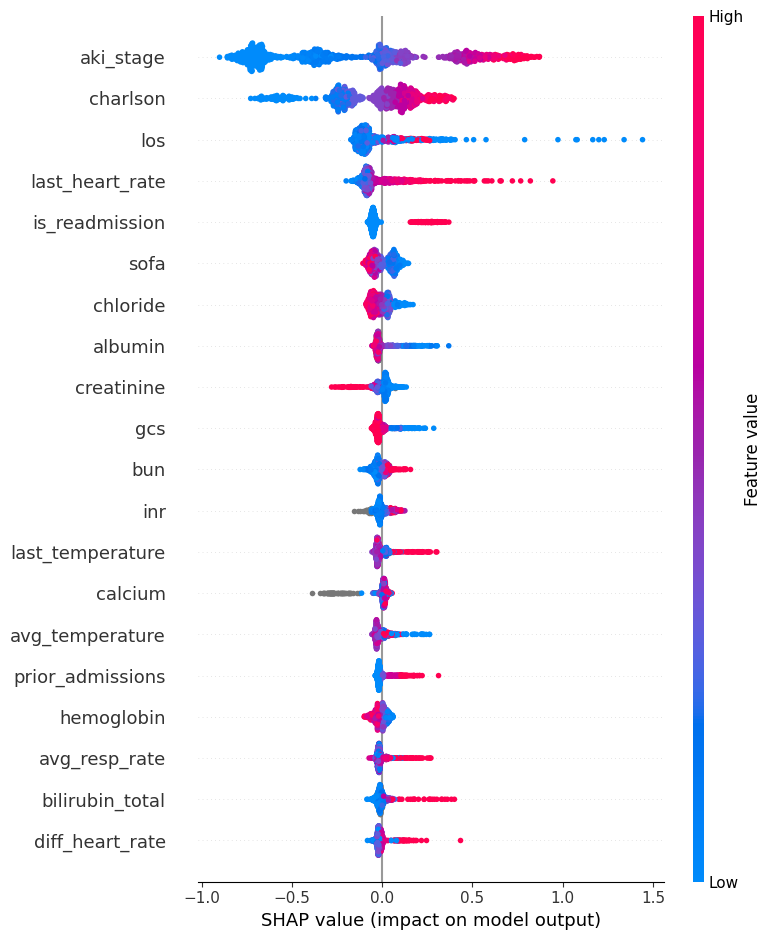

In [ ]:
run_XGBoost(df,'gatortron_base_embeddings_average', 'values')

### Gatortron Average - Static Features and Embeddings

[I 2023-09-12 18:09:07,540] A new study created in memory with name: no-name-39ab20e5-4991-45eb-8277-496b73fe45a7
[I 2023-09-12 18:09:34,540] Trial 0 finished with value: 0.7729578844559796 and parameters: {'learning_rate': 0.16321739995874918, 'n_estimators': 111, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.027090531547182817, 'subsample': 0.7349925105069708, 'alpha': 0.0009023472652087028}. Best is trial 0 with value: 0.7729578844559796.
[I 2023-09-12 18:09:49,010] Trial 1 finished with value: 0.789675949192497 and parameters: {'learning_rate': 0.12718768087929846, 'n_estimators': 92, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.08654175849705169, 'subsample': 0.8154002732981338, 'alpha': 0.016055595076364716}. Best is trial 1 with value: 0.789675949192497.
[I 2023-09-12 18:10:23,430] Trial 2 finished with value: 0.7869121176568036 and parameters: {'learning_rate': 0.08563371651014576, 'n_estimators': 179, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 0.3104561767028797,

{'learning_rate': 0.11977687153831632, 'n_estimators': 87, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.008134631550615834, 'subsample': 0.8900025942836536, 'alpha': 0.03413738378971204}
Accuracy: 0.7473409218137712
Precision: 0.3665374291679093
Recall: 0.6778819635962493
F1 Score: 0.4758033294618661
ROC AUC Score: 0.7196821384516899


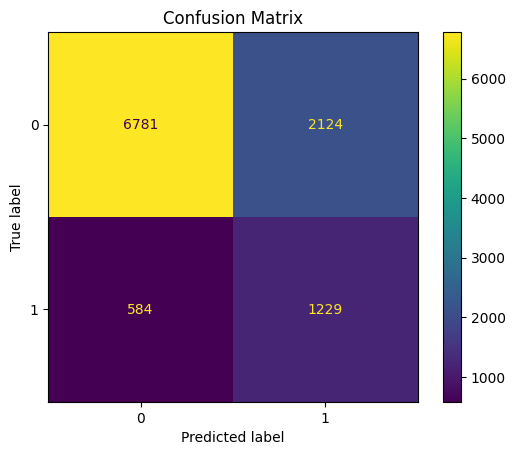

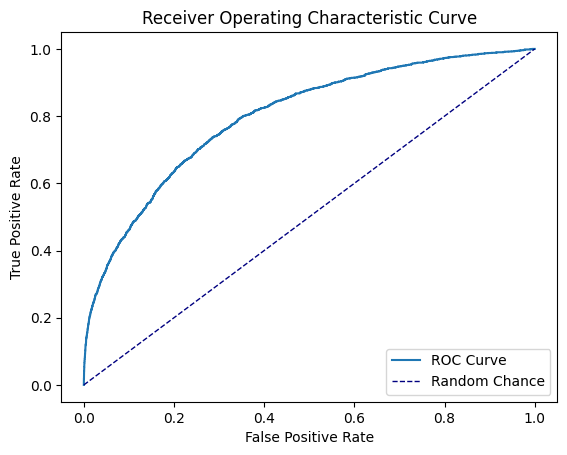

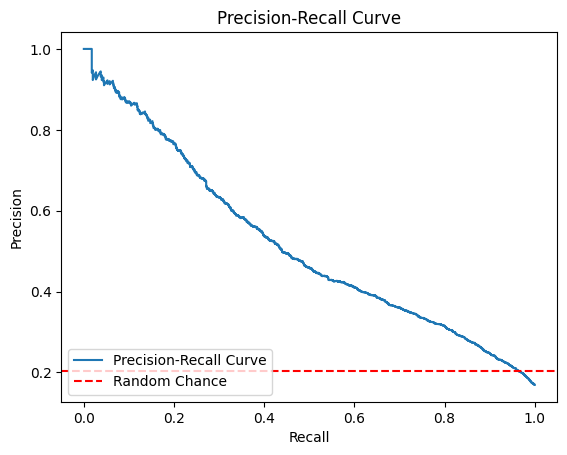

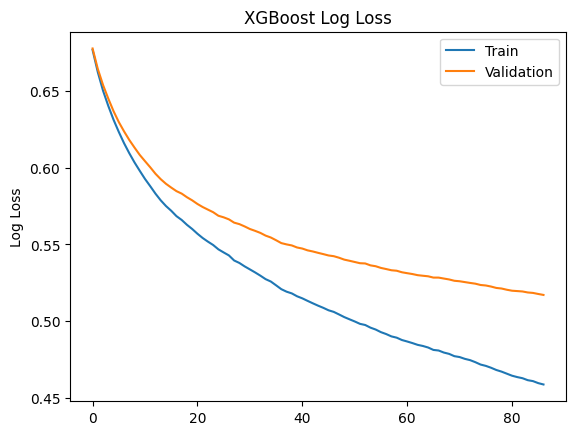

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.7100096697999455, 0.7297938434673497)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


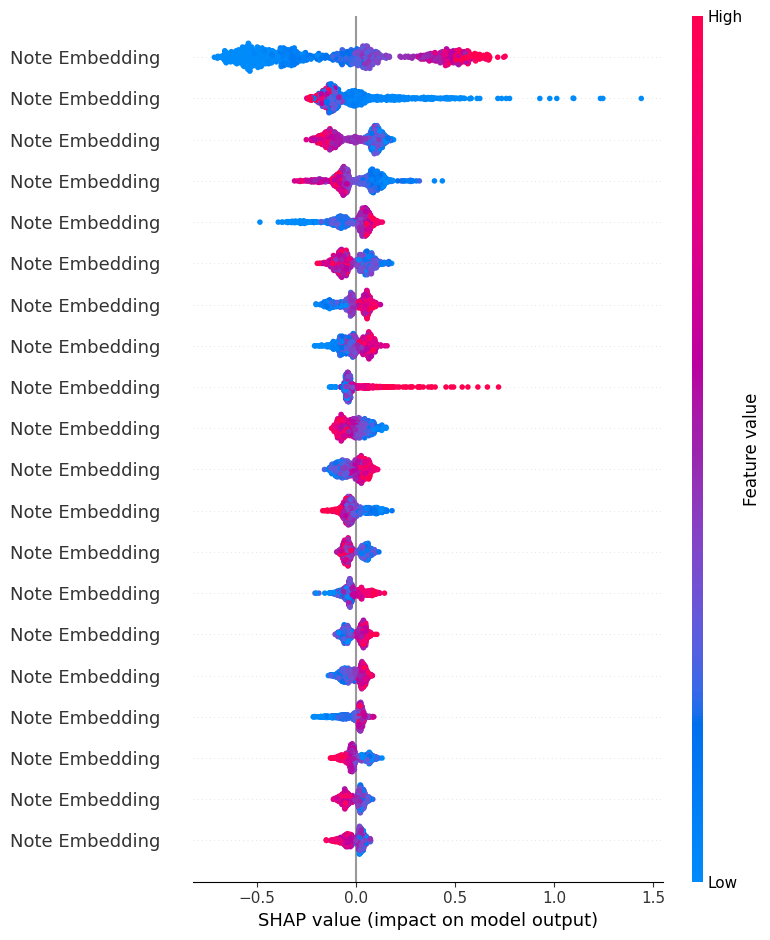

In [ ]:
run_XGBoost(df,'gatortron_base_embeddings_average', 'all')

### Gatortron All - Embeddings




[I 2023-09-12 18:19:40,529] A new study created in memory with name: no-name-23e72bc1-eaa6-4f8a-a1d9-f2017a78000b
[I 2023-09-12 18:20:13,517] Trial 0 finished with value: 0.7214368174709526 and parameters: {'learning_rate': 0.13119527688783425, 'n_estimators': 196, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.2838974786370299, 'subsample': 0.772148928179808, 'alpha': 0.12659670678091894}. Best is trial 0 with value: 0.7214368174709526.
[I 2023-09-12 18:20:43,180] Trial 1 finished with value: 0.7056717651222696 and parameters: {'learning_rate': 0.22010909062410983, 'n_estimators': 95, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.014652806675742314, 'subsample': 0.7399328913000413, 'alpha': 0.1474371439859696}. Best is trial 0 with value: 0.7214368174709526.
A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
[I 2023-09-12 18:21:08,809] Trial 2 finished with value: 0.7213363091138231 and parameters: 

{'learning_rate': 0.05155610187213692, 'n_estimators': 147, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.33200508068980544, 'subsample': 0.8806611904278553, 'alpha': 0.19969820031496072}
Accuracy: 0.7218697518193693
Precision: 0.33623107122826695
Recall: 0.661334804191947
F1 Score: 0.44580777096114516
ROC AUC Score: 0.6977645385361756


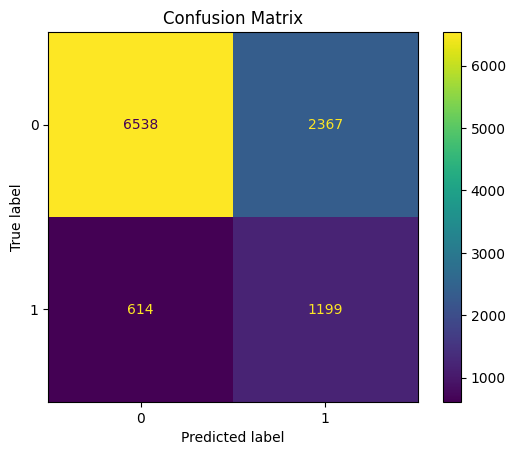

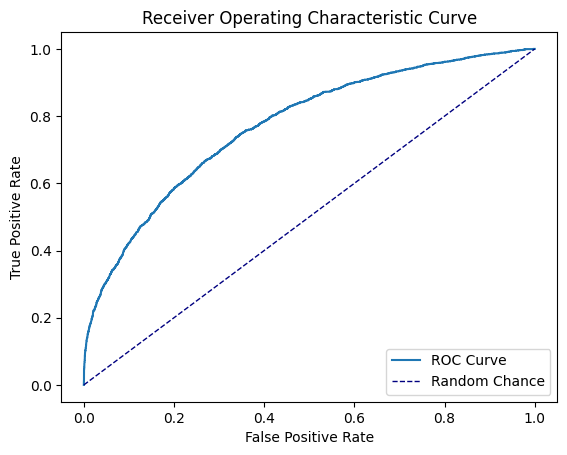

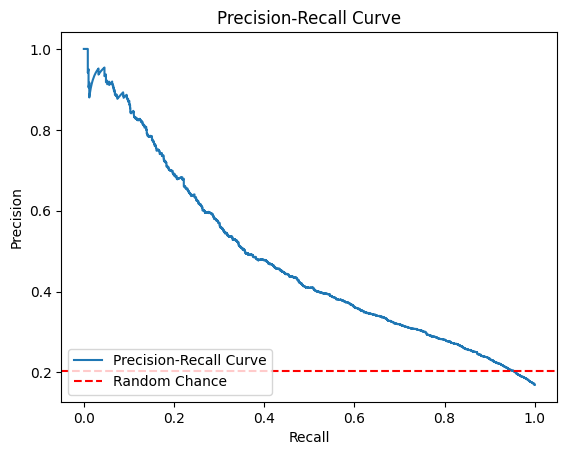

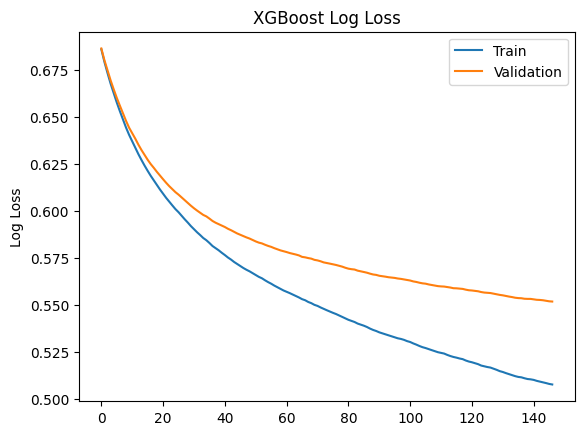

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.687915164744999, 0.708025157805018)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


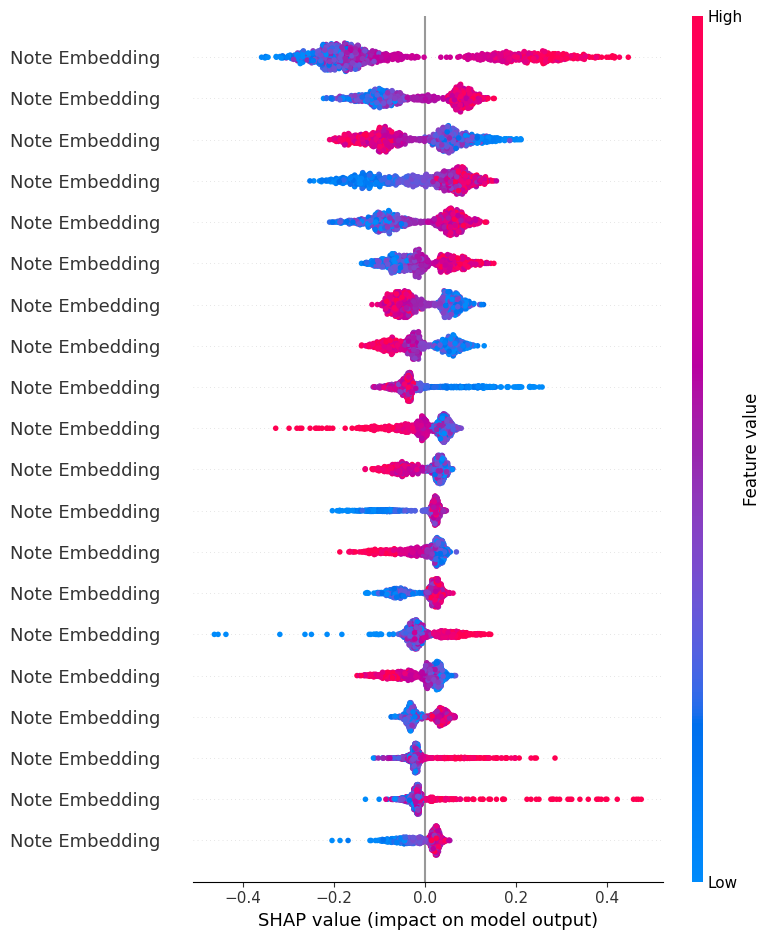

In [ ]:
run_XGBoost(df,'gatortron_base_embeddings_all_layers', 'embeddings')

### Gatortron All - Static Features and Embeddings

[I 2023-09-12 18:27:22,081] A new study created in memory with name: no-name-47dd65f0-37c2-43cc-9b00-f83f18d01e8d
[I 2023-09-12 18:27:39,196] Trial 0 finished with value: 0.7746635019071588 and parameters: {'learning_rate': 0.18689427717507168, 'n_estimators': 80, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.1289390318468068, 'subsample': 0.7088633933914672, 'alpha': 0.1225779457450962}. Best is trial 0 with value: 0.7746635019071588.
[I 2023-09-12 18:27:58,390] Trial 1 finished with value: 0.7674070725552804 and parameters: {'learning_rate': 0.2033176303697533, 'n_estimators': 55, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.0006380812975537165, 'subsample': 0.9141185424240381, 'alpha': 0.12827169900661198}. Best is trial 0 with value: 0.7746635019071588.
[I 2023-09-12 18:28:21,527] Trial 2 finished with value: 0.7934866496642176 and parameters: {'learning_rate': 0.06090910980954563, 'n_estimators': 177, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.11298159687171837, 's

{'learning_rate': 0.06090910980954563, 'n_estimators': 177, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.11298159687171837, 'subsample': 0.8955651949883389, 'alpha': 0.09273058992583344}
Accuracy: 0.7492069415935809
Precision: 0.3699851411589896
Recall: 0.6867071152785439
F1 Score: 0.4808806488991889
ROC AUC Score: 0.7243193072181602


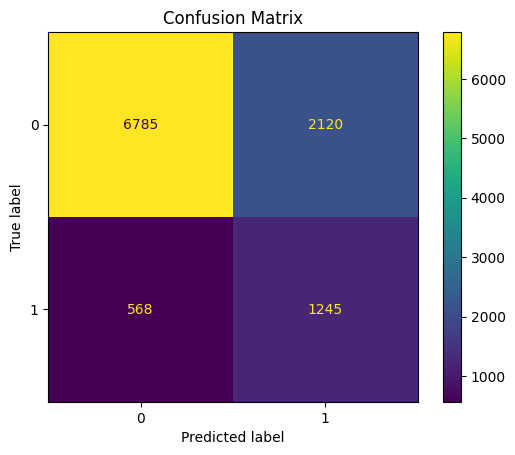

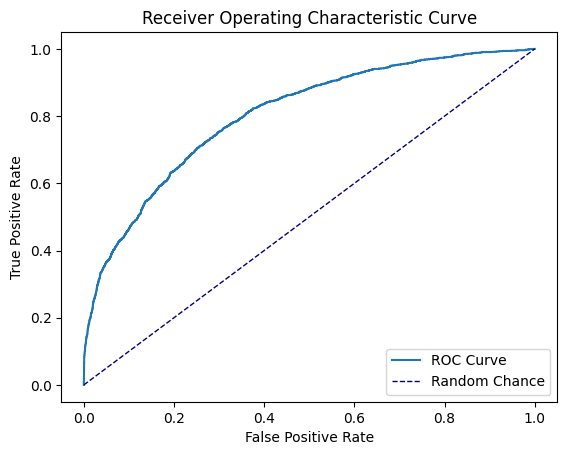

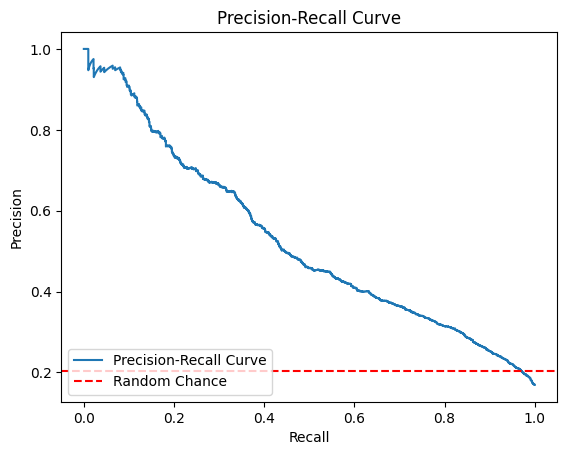

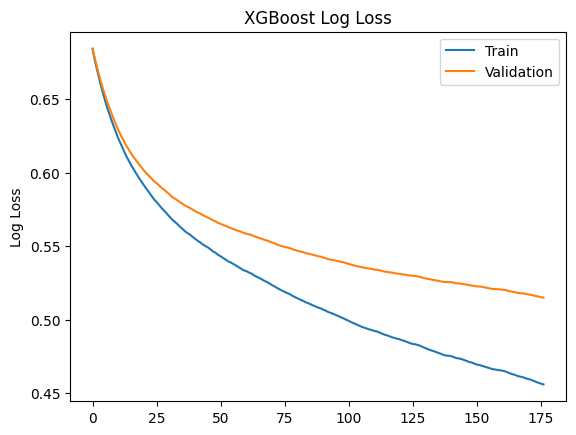

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.7137341575413392, 0.734026320126352)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


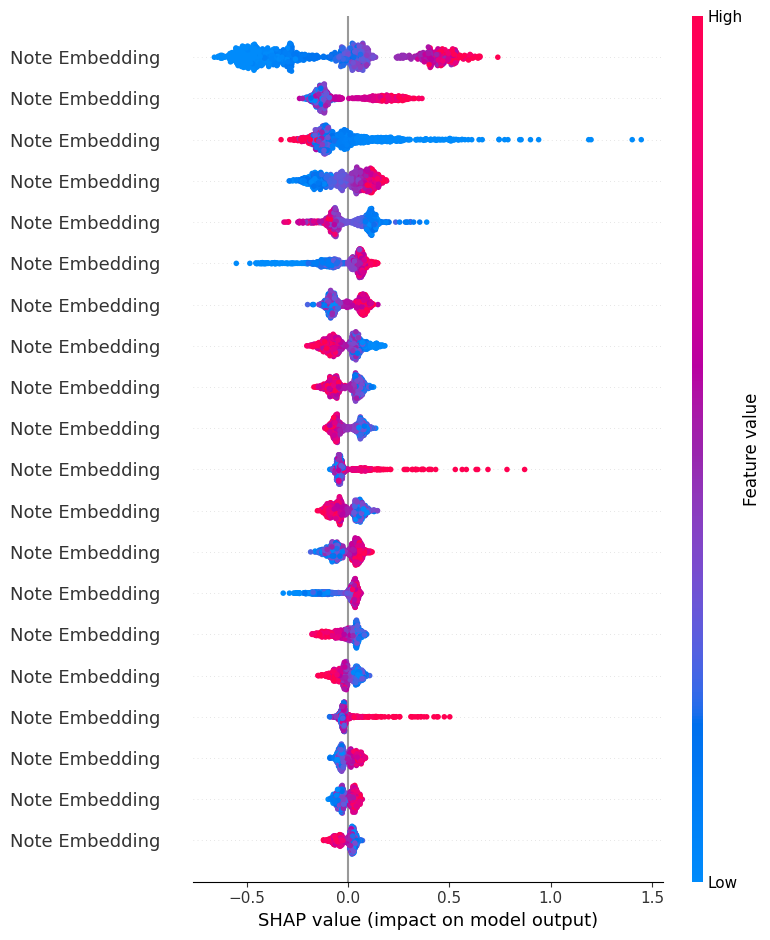

In [ ]:
run_XGBoost(df,'gatortron_base_embeddings_all_layers', 'all')

### Longformer - Static Features and Embeddings

[I 2023-09-12 18:37:05,741] A new study created in memory with name: no-name-3d6322ba-584b-4eea-9fc4-a9ebe5f5d372
[I 2023-09-12 18:37:15,799] Trial 0 finished with value: 0.7827720280020397 and parameters: {'learning_rate': 0.17043202142382735, 'n_estimators': 146, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.005273910710840202, 'subsample': 0.9417103513533089, 'alpha': 0.12922304628283854}. Best is trial 0 with value: 0.7827720280020397.
[I 2023-09-12 18:37:39,331] Trial 1 finished with value: 0.7737903753068075 and parameters: {'learning_rate': 0.040591340932310656, 'n_estimators': 120, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.04766708200231751, 'subsample': 0.6331630710011211, 'alpha': 0.1401975940250126}. Best is trial 0 with value: 0.7827720280020397.
[I 2023-09-12 18:38:08,629] Trial 2 finished with value: 0.7601036370227034 and parameters: {'learning_rate': 0.21986700760220826, 'n_estimators': 111, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.17381907216034762

{'learning_rate': 0.17043202142382735, 'n_estimators': 146, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0.005273910710840202, 'subsample': 0.9417103513533089, 'alpha': 0.12922304628283854}
Accuracy: 0.7458481059899235
Precision: 0.36317212376088914
Recall: 0.6668505239933812
F1 Score: 0.47024504084013996
ROC AUC Score: 0.7143910115755789


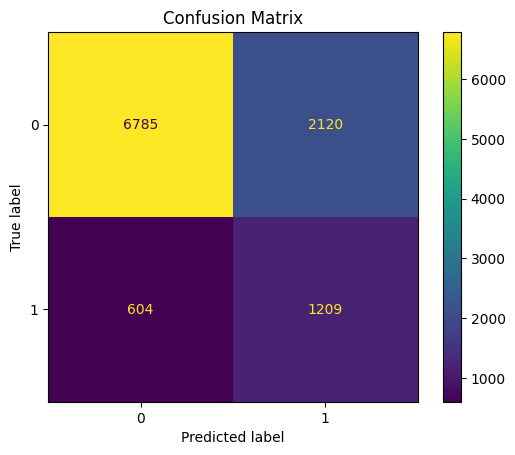

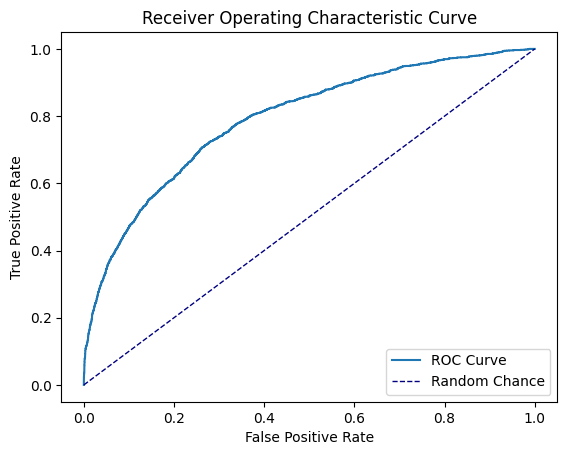

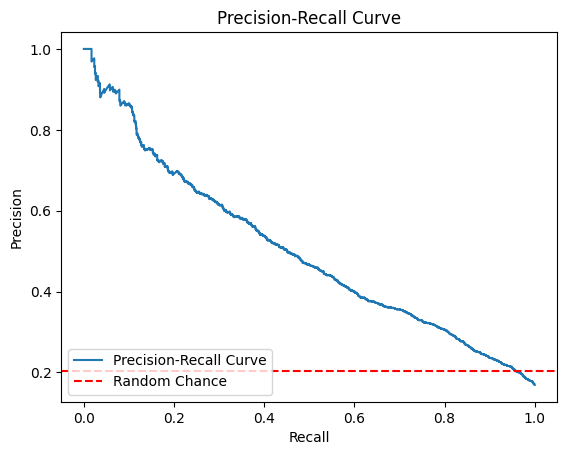

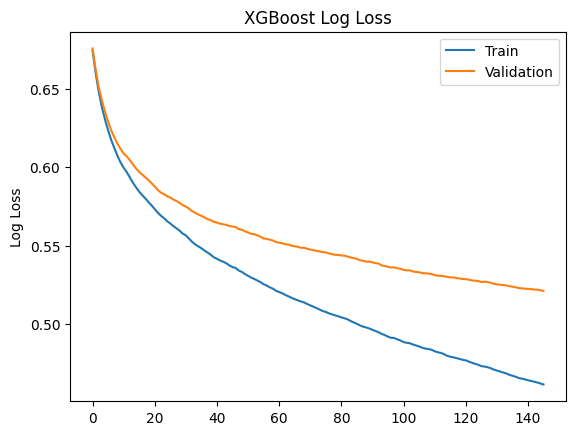

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.7047216002518631, 0.7238530744446648)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


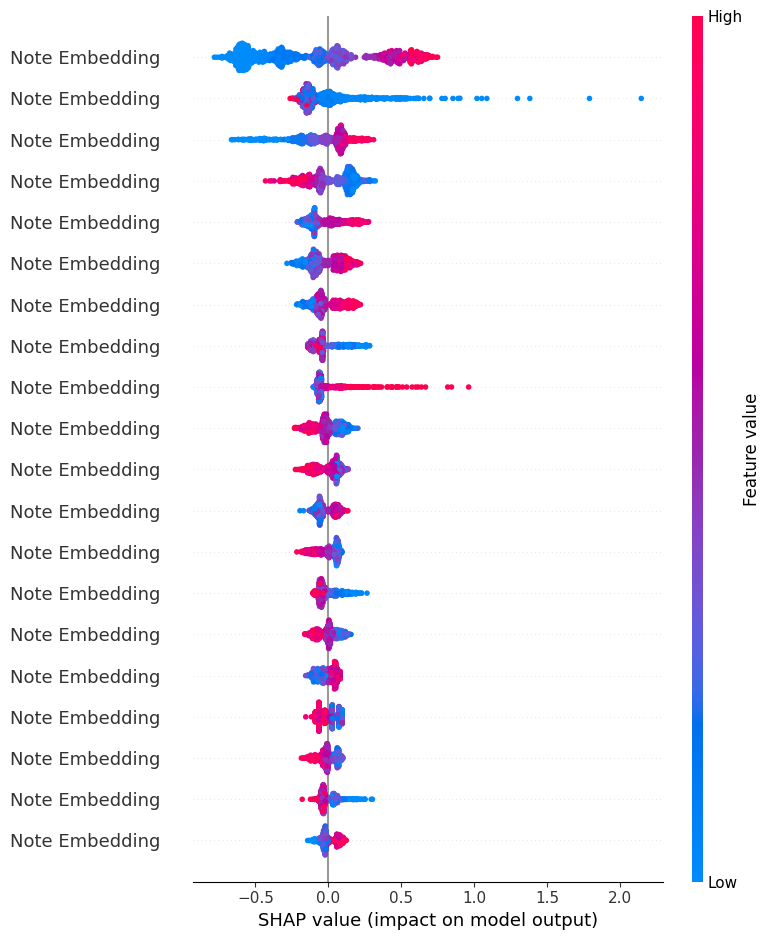

In [ ]:
run_XGBoost(df,'longformer_embeddings', 'all')

### Longformer - Embeddings

[I 2023-09-12 18:44:08,230] A new study created in memory with name: no-name-70eab332-6c2a-42c8-a51f-72b613c7e9c2
[I 2023-09-12 18:44:15,483] Trial 0 finished with value: 0.7426389265387582 and parameters: {'learning_rate': 0.132425248395125, 'n_estimators': 116, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.1873701594179541, 'subsample': 0.8449141439332954, 'alpha': 0.0628573685679774}. Best is trial 0 with value: 0.7426389265387582.
[I 2023-09-12 18:44:37,365] Trial 1 finished with value: 0.7092479690461918 and parameters: {'learning_rate': 0.1349060789314873, 'n_estimators': 112, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.11913537281648395, 'subsample': 0.9709767712146617, 'alpha': 0.19787432463932852}. Best is trial 0 with value: 0.7426389265387582.
[I 2023-09-12 18:44:48,004] Trial 2 finished with value: 0.7261080571414693 and parameters: {'learning_rate': 0.11793737692125528, 'n_estimators': 98, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 0.38530918114120083, 'subs

{'learning_rate': 0.132425248395125, 'n_estimators': 116, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.1873701594179541, 'subsample': 0.8449141439332954, 'alpha': 0.0628573685679774}
Accuracy: 0.7251352864340362
Precision: 0.33074394980579624
Recall: 0.6105901820187535
F1 Score: 0.4290697674418605
ROC AUC Score: 0.6795230528285795


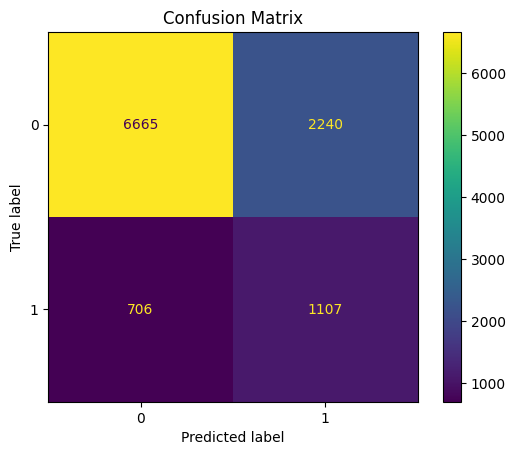

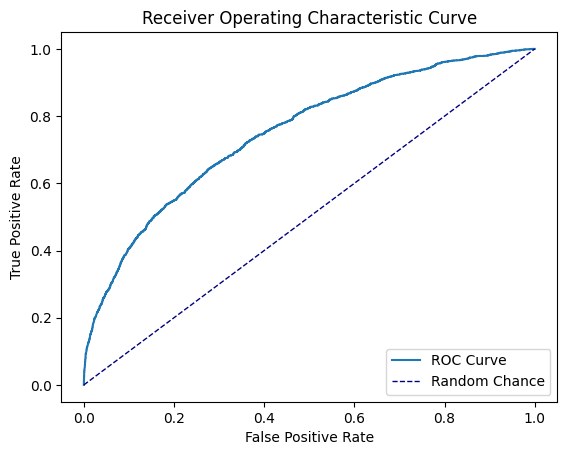

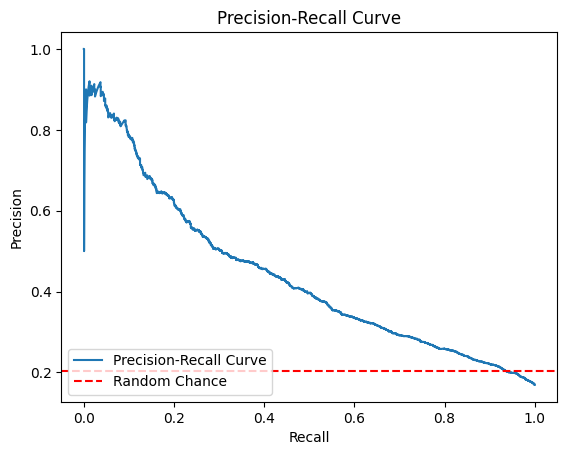

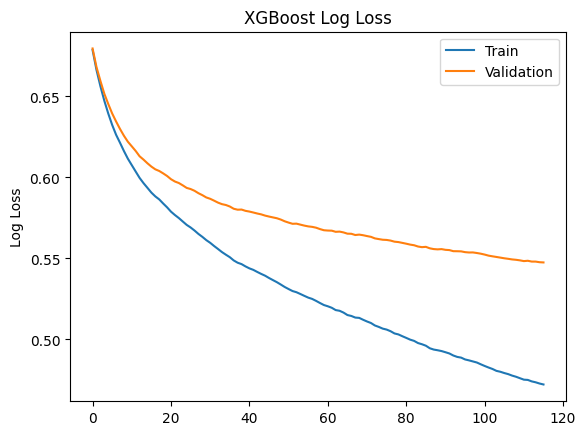

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.6688847217150217, 0.6900417967900035)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


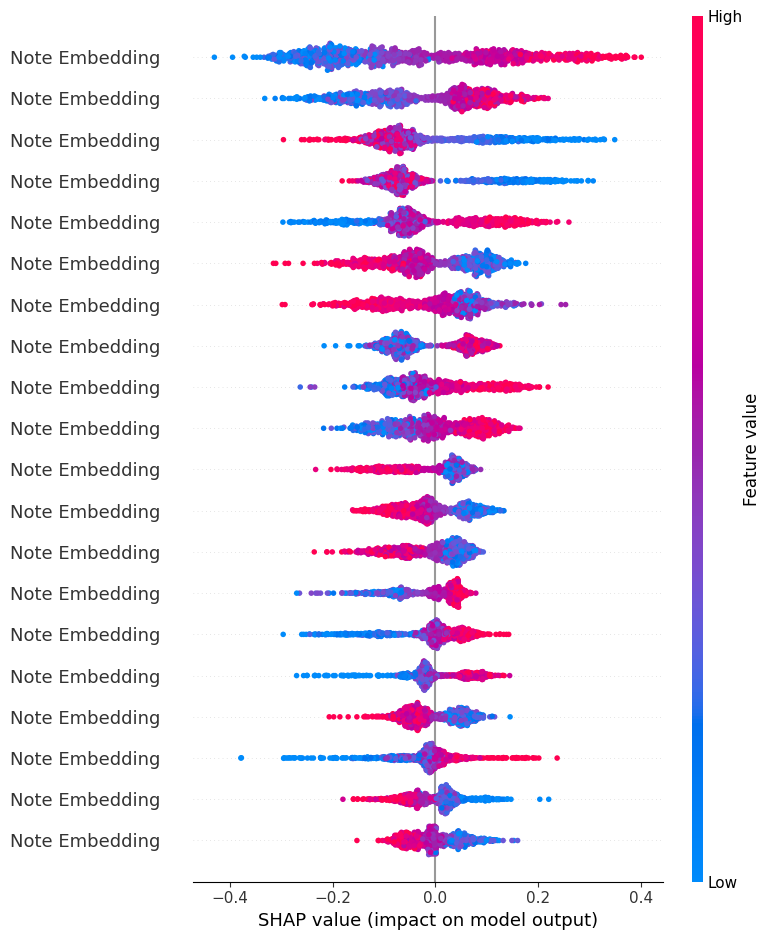

In [ ]:
run_XGBoost(df,'longformer_embeddings', 'embeddings')

### BERT - Static Features and Embeddings

[I 2023-09-12 18:49:53,278] A new study created in memory with name: no-name-52548020-2cfa-4a2b-9a17-ca691ce65b32
[I 2023-09-12 18:50:13,439] Trial 0 finished with value: 0.7515755972492094 and parameters: {'learning_rate': 0.012564331076314165, 'n_estimators': 92, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.28961275789981394, 'subsample': 0.704759870364661, 'alpha': 0.1744662969367355}. Best is trial 0 with value: 0.7515755972492094.
[I 2023-09-12 18:50:31,903] Trial 1 finished with value: 0.7489148771622922 and parameters: {'learning_rate': 0.18181447624528915, 'n_estimators': 153, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 0.37420526438780044, 'subsample': 0.6984046021609552, 'alpha': 0.13577607545439924}. Best is trial 0 with value: 0.7515755972492094.
[I 2023-09-12 18:50:51,412] Trial 2 finished with value: 0.7287617085315924 and parameters: {'learning_rate': 0.2351331953513405, 'n_estimators': 146, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.3334550730215848, 'su

{'learning_rate': 0.06907851354511493, 'n_estimators': 171, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.2102996721082567, 'subsample': 0.5595107798491763, 'alpha': 0.03666342346272273}
Accuracy: 0.7462213099458854
Precision: 0.36110260336906586
Recall: 0.6503033645890789
F1 Score: 0.4643560456872785
ROC AUC Score: 0.708026471738672


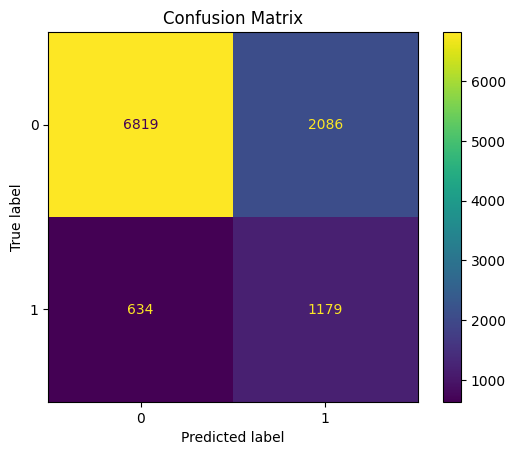

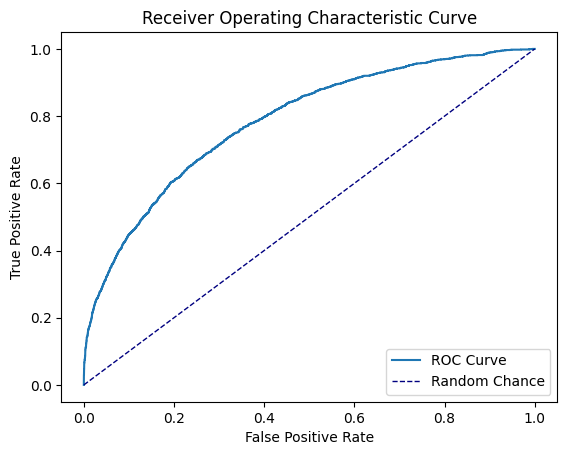

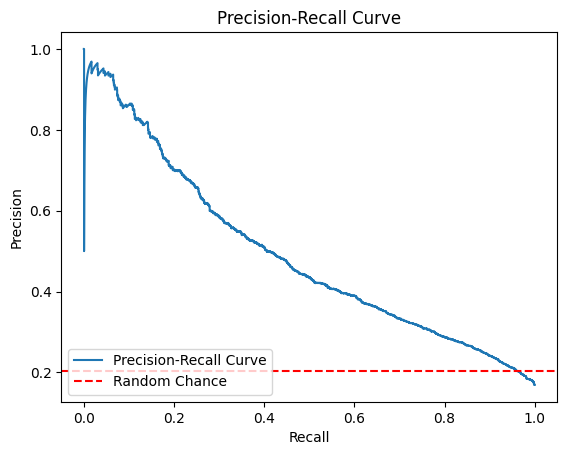

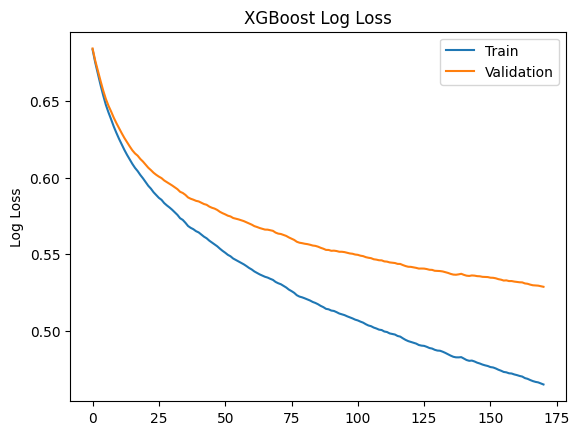

Recall at a precision of 80% is: 0.0
AUC Confidence interval: (0.6980389601264173, 0.7185411603170547)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


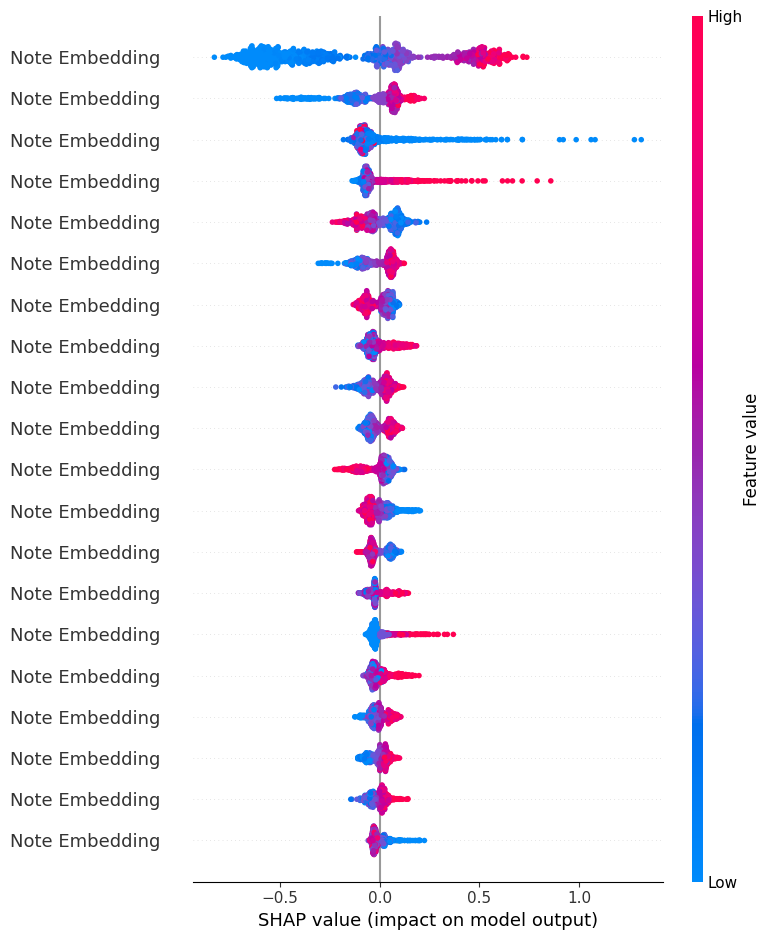

In [ ]:
run_XGBoost(df,'bert_base_embeddings_average', 'all')

# FFNN

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, make_scorer

import optuna

def objective(trial, X_train, y_train, X_val, y_val):
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    n_units = trial.suggest_int('n_units', 32, 128)
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_units // 2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    loss, auc = model.evaluate(X_val, y_val)
    return auc

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

def run_FFNN(df, column):
    #Convert list of embeddings into a 2D numpy array
    embedding_matrix = np.stack(df[column].values)

    # Combine features
    #X = np.hstack([embedding_matrix, df_features.to_numpy()])

    #X = df_features.to_numpy()
    X = np.hstack([embedding_matrix])

    y = df['readmitted_next'].values

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    positive_class_ratio = np.sum(y_test) / len(y_test)

    # Initialize lists to store ROC and PR curves for each fold
    tprs, fprs, rocs = [], [], []
    precisions, recalls = [], []

    n_splits = 5  # Number of K-fold Splits
    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    # Initialize lists to store metrics for each fold
    tprs, fprs, rocs = [], [], []
    precisions, recalls = [], []
    best_params_overall = None  # Store the best hyperparameters over all folds
    best_value_overall = -1.0   # Store the best value over all folds

    for train_index, val_index in skf.split(X_temp, y_temp):
        # Split data into k-folds
        X_train_fold, X_val_fold = X_temp[train_index], X_temp[val_index]
        y_train_fold, y_val_fold = y_temp[train_index], y_temp[val_index]

        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, X_train_fold, y_train_fold, X_val_fold, y_val_fold), n_trials=15)

        trial = study.best_trial
        if trial.value > best_value_overall:
          best_value_overall = trial.value
          best_params_overall = study.best_params

        print(f"Fold {val_index}")
        print(f"Best AUC: {trial.value}")
        print("Best hyperparameters: {}".format(trial.params))

        # Fetch best hyperparameters from the study
        best_params = study.best_params
        best_dropout_rate = best_params['dropout_rate']
        best_n_units = best_params['n_units']
        best_optimizer = best_params['optimizer']

        # Build the best model based on Optuna optimization
        model = Sequential()
        model.add(Dense(best_n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(best_n_units // 2, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_metric])

        class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train_fold)
        class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the best model
        history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), class_weight=class_weights_dict, callbacks=[early_stopping], verbose=0)

        # Getting the predictions from the model
        y_pred_val_fold = model.predict(X_val_fold).ravel()

        # Compute and store ROC curve and AUC for this fold
        fpr, tpr, _ = roc_curve(y_val_fold, y_pred_val_fold)
        roc_auc = auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        rocs.append(roc_auc)

        # Compute and store Precision-Recall curve for this fold
        precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_val_fold)
        precisions.append(precision)
        recalls.append(recall)

    # Plotting ROC curves for each fold
    plt.figure(figsize=(10, 7))
    for i in range(n_splits):
        plt.plot(fprs[i], tprs[i], lw=1, label=f'ROC curve Fold {i+1} (area = {rocs[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Each Fold')
    plt.legend(loc='lower right')
    plt.show()

    # Plotting PR curves for each fold
    plt.figure(figsize=(10, 7))
    for i in range(n_splits):
        plt.step(recalls[i], precisions[i], where='post', label=f'Fold {i+1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axhline(y=positive_class_ratio, color='r', linestyle='--', label='Random Chance')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for Each Fold')
    plt.legend(loc='lower right')
    plt.show()


    best_dropout_rate = best_params_overall['dropout_rate']
    best_n_units = best_params_overall['n_units']
    best_optimizer = best_params_overall['optimizer']

    # Build the best model based on Optuna optimization
    model = Sequential()
    model.add(Dense(best_n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
    model.add(Dropout(best_dropout_rate))
    model.add(Dense(best_n_units // 2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(best_dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_metric])

    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the best model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights_dict, callbacks=[early_stopping], verbose=1)
    # Evaluate the model
    metrics = model.evaluate(X_test, y_test)

    print(f"Test Loss: {metrics[0]}")
    print(f"Test AUC: {metrics[1]}")
    print(f"Test Precision: {metrics[2]}")
    print(f"Test Recall: {metrics[3]}")
    print(f"Test F1: {metrics[4]}")

    # Getting the predictions from the model
    y_pred_test = model.predict(X_test).ravel()



    # ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

    # Choose thresholds for F1 Score
    thresholds = np.arange(0.1, 1.0, 0.1)
    best_f1 = 0
    best_threshold = 0

    # Annotate some thresholds on the ROC curve
    for threshold in thresholds:
        y_pred_label = (y_pred_test > threshold).astype(int)
        current_f1 = f1_score(y_test, y_pred_label)
        print(f"Threshold: {threshold}, F1 Score: {current_f1}")

        # Find the point on the ROC curve for this threshold
        closest_point = np.argmin(np.abs(roc_thresholds - threshold))
        plt.plot(fpr[closest_point], tpr[closest_point], '^', markersize=10, label=f"Threshold {threshold} (F1={current_f1:.2f})")

        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Chance')
    plt.title('Receiver Operating Characteristic Curve with Thresholds')
    plt.legend(loc="lower right")
    plt.show()

    # Get model predictions
    y_pred = model.predict(X_test)

    # Flatten y_pred and y_test if they are not already flat
    y_pred = np.ravel(y_pred)
    y_test = np.ravel(y_test)

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plotting
    plt.figure()
    plt.step(recall, precision, where='post', label='Model')
    plt.axhline(y=positive_class_ratio, color='r', linestyle='--', label='Random Chance')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend()
    plt.show()

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # y_true: True binary labels (0 or 1)
    # y_scores: Confidence scores from your model
    y_scores = model.predict(X_test).ravel()
    y_true = y_test

    # Compute precision-recall pairs
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    # Find the closest precision to 0.8
    idx = np.argmin(np.abs(precision - 0.8))

    # Corresponding recall
    recall_at_precision_80 = recall[idx]

    print(f"Recall at a precision of 80% is: {recall_at_precision_80}")

    lower_auc, upper_auc = bootstrap_auc(y_test, y_pred_test)
    print(f"AUC Confidence interval: ({lower_auc:.2f}, {upper_auc:.2f})")

    save_dir = f"/content/gdrive/MyDrive/Dissertation/Models/{column}_model.h5"
    model.save(save_dir)


2.13.0


# Gatortron Last Hidden State

[I 2023-09-11 23:04:52,146] A new study created in memory with name: no-name-9e628a30-87ec-476f-8864-ff339499b361


268/268 [==============================] - 1s 2ms/step - loss: 0.6049 - auc: 0.7699


[I 2023-09-11 23:05:39,886] Trial 0 finished with value: 0.7698526382446289 and parameters: {'dropout_rate': 0.3800808299276537, 'n_units': 43, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7698526382446289.


268/268 [==============================] - 1s 2ms/step - loss: 0.5387 - auc: 0.7790


[I 2023-09-11 23:06:15,320] Trial 1 finished with value: 0.7790238857269287 and parameters: {'dropout_rate': 0.16063435187554576, 'n_units': 124, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.6237 - auc: 0.7740


[I 2023-09-11 23:06:50,936] Trial 2 finished with value: 0.7740370631217957 and parameters: {'dropout_rate': 0.2786372522653451, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.6940 - auc: 0.5000


[I 2023-09-11 23:07:27,680] Trial 3 finished with value: 0.5 and parameters: {'dropout_rate': 0.494680811346799, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.4993 - auc: 0.7769


[I 2023-09-11 23:08:03,650] Trial 4 finished with value: 0.7769025564193726 and parameters: {'dropout_rate': 0.2399335496134113, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.6263 - auc: 0.7474


[I 2023-09-11 23:08:40,367] Trial 5 finished with value: 0.747394323348999 and parameters: {'dropout_rate': 0.4286277645759201, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.5549 - auc: 0.7781


[I 2023-09-11 23:09:17,517] Trial 6 finished with value: 0.7781268358230591 and parameters: {'dropout_rate': 0.20338995478264157, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.5239 - auc: 0.7699


[I 2023-09-11 23:09:52,916] Trial 7 finished with value: 0.7698681950569153 and parameters: {'dropout_rate': 0.2923348973359042, 'n_units': 59, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.6256 - auc: 0.7705


[I 2023-09-11 23:10:29,139] Trial 8 finished with value: 0.7705124020576477 and parameters: {'dropout_rate': 0.45460170188213445, 'n_units': 116, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.5917 - auc: 0.7762


[I 2023-09-11 23:11:05,783] Trial 9 finished with value: 0.7762194871902466 and parameters: {'dropout_rate': 0.14475626909610995, 'n_units': 49, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7790238857269287.


268/268 [==============================] - 1s 2ms/step - loss: 0.5099 - auc: 0.7799


[I 2023-09-11 23:11:41,451] Trial 10 finished with value: 0.7799155116081238 and parameters: {'dropout_rate': 0.10029522715623382, 'n_units': 91, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7799155116081238.


268/268 [==============================] - 1s 2ms/step - loss: 0.5170 - auc: 0.7774


[I 2023-09-11 23:12:17,024] Trial 11 finished with value: 0.7773965001106262 and parameters: {'dropout_rate': 0.11143603046091533, 'n_units': 94, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7799155116081238.


268/268 [==============================] - 1s 2ms/step - loss: 0.6317 - auc: 0.7797


[I 2023-09-11 23:12:52,147] Trial 12 finished with value: 0.7797216176986694 and parameters: {'dropout_rate': 0.10296747832858444, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7799155116081238.


268/268 [==============================] - 1s 2ms/step - loss: 0.6106 - auc: 0.7796


[I 2023-09-11 23:13:27,330] Trial 13 finished with value: 0.7796022891998291 and parameters: {'dropout_rate': 0.11567058986088466, 'n_units': 102, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7799155116081238.


268/268 [==============================] - 1s 2ms/step - loss: 0.5987 - auc: 0.7768


[I 2023-09-11 23:14:02,062] Trial 14 finished with value: 0.776816189289093 and parameters: {'dropout_rate': 0.1918280552595208, 'n_units': 74, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7799155116081238.


Fold [    7    10    12 ... 42861 42865 42867]
Best AUC: 0.7799155116081238
Best hyperparameters: {'dropout_rate': 0.10029522715623382, 'n_units': 91, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-11 23:14:27,512] A new study created in memory with name: no-name-2cd6ed1e-7f15-4b66-8d3e-8229f4319bbe


268/268 [==============================] - 1s 2ms/step - loss: 0.6150 - auc: 0.7508


[I 2023-09-11 23:15:03,217] Trial 0 finished with value: 0.7507644891738892 and parameters: {'dropout_rate': 0.4078330645267382, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7507644891738892.


268/268 [==============================] - 1s 2ms/step - loss: 0.6592 - auc: 0.7606


[I 2023-09-11 23:15:39,313] Trial 1 finished with value: 0.7605809569358826 and parameters: {'dropout_rate': 0.3584141853967888, 'n_units': 54, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7605809569358826.


268/268 [==============================] - 1s 2ms/step - loss: 0.6577 - auc: 0.7611


[I 2023-09-11 23:16:14,188] Trial 2 finished with value: 0.7611011862754822 and parameters: {'dropout_rate': 0.33967871053673093, 'n_units': 101, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7611011862754822.


268/268 [==============================] - 1s 2ms/step - loss: 0.6209 - auc: 0.7698


[I 2023-09-11 23:16:49,946] Trial 3 finished with value: 0.7697852849960327 and parameters: {'dropout_rate': 0.1973159079848409, 'n_units': 48, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7697852849960327.


268/268 [==============================] - 1s 2ms/step - loss: 0.5479 - auc: 0.7692


[I 2023-09-11 23:17:26,428] Trial 4 finished with value: 0.7691788673400879 and parameters: {'dropout_rate': 0.23398778979983434, 'n_units': 51, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7697852849960327.


268/268 [==============================] - 1s 2ms/step - loss: 0.6189 - auc: 0.7680


[I 2023-09-11 23:18:02,313] Trial 5 finished with value: 0.7680354714393616 and parameters: {'dropout_rate': 0.3872261571554033, 'n_units': 72, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7697852849960327.


268/268 [==============================] - 1s 2ms/step - loss: 0.5290 - auc: 0.7706


[I 2023-09-11 23:18:37,540] Trial 6 finished with value: 0.7705730199813843 and parameters: {'dropout_rate': 0.23271018145919778, 'n_units': 77, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7705730199813843.


268/268 [==============================] - 1s 2ms/step - loss: 0.5764 - auc: 0.7656


[I 2023-09-11 23:19:13,546] Trial 7 finished with value: 0.7656304836273193 and parameters: {'dropout_rate': 0.4270084748911448, 'n_units': 123, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.7705730199813843.


268/268 [==============================] - 1s 2ms/step - loss: 0.4821 - auc: 0.7747


[I 2023-09-11 23:19:48,518] Trial 8 finished with value: 0.7746848464012146 and parameters: {'dropout_rate': 0.16348393646687265, 'n_units': 101, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.7746848464012146.


268/268 [==============================] - 1s 2ms/step - loss: 0.5978 - auc: 0.7492


[I 2023-09-11 23:20:24,377] Trial 9 finished with value: 0.7491714358329773 and parameters: {'dropout_rate': 0.48666706539610005, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.7746848464012146.


268/268 [==============================] - 1s 2ms/step - loss: 0.5714 - auc: 0.7721


[I 2023-09-11 23:20:59,797] Trial 10 finished with value: 0.7721217274665833 and parameters: {'dropout_rate': 0.10661588080337109, 'n_units': 126, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.7746848464012146.


268/268 [==============================] - 1s 2ms/step - loss: 0.4336 - auc: 0.7714


[I 2023-09-11 23:21:34,770] Trial 11 finished with value: 0.7714433670043945 and parameters: {'dropout_rate': 0.10589845859568076, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.7746848464012146.


268/268 [==============================] - 1s 2ms/step - loss: 0.5971 - auc: 0.7764


[I 2023-09-11 23:22:09,485] Trial 12 finished with value: 0.7763704657554626 and parameters: {'dropout_rate': 0.10291892955483703, 'n_units': 110, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.7763704657554626.


268/268 [==============================] - 1s 2ms/step - loss: 0.4956 - auc: 0.7710


[I 2023-09-11 23:22:44,440] Trial 13 finished with value: 0.7709674835205078 and parameters: {'dropout_rate': 0.15799882507916505, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.7763704657554626.


268/268 [==============================] - 1s 2ms/step - loss: 0.6010 - auc: 0.7701


[I 2023-09-11 23:23:19,461] Trial 14 finished with value: 0.7700863480567932 and parameters: {'dropout_rate': 0.2748174710612057, 'n_units': 109, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.7763704657554626.


Fold [    6     8    16 ... 42839 42848 42866]
Best AUC: 0.7763704657554626
Best hyperparameters: {'dropout_rate': 0.10291892955483703, 'n_units': 110, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-11 23:24:00,020] A new study created in memory with name: no-name-a795df70-5307-4640-b2b9-4d6b77fb1d72


268/268 [==============================] - 1s 2ms/step - loss: 0.6086 - auc: 0.7668


[I 2023-09-11 23:24:35,791] Trial 0 finished with value: 0.7668179869651794 and parameters: {'dropout_rate': 0.28721135584592683, 'n_units': 65, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7668179869651794.


268/268 [==============================] - 1s 2ms/step - loss: 0.6597 - auc: 0.7643


[I 2023-09-11 23:25:10,907] Trial 1 finished with value: 0.7643318772315979 and parameters: {'dropout_rate': 0.14168176936888002, 'n_units': 87, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7668179869651794.


268/268 [==============================] - 1s 2ms/step - loss: 0.5666 - auc: 0.7645


[I 2023-09-11 23:25:46,383] Trial 2 finished with value: 0.7644728422164917 and parameters: {'dropout_rate': 0.3993336987411563, 'n_units': 48, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7668179869651794.


268/268 [==============================] - 1s 2ms/step - loss: 0.6939 - auc: 0.5000


[I 2023-09-11 23:26:22,960] Trial 3 finished with value: 0.5 and parameters: {'dropout_rate': 0.4642910865563493, 'n_units': 82, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7668179869651794.


268/268 [==============================] - 1s 2ms/step - loss: 0.5354 - auc: 0.7686


[I 2023-09-11 23:26:59,290] Trial 4 finished with value: 0.7686330676078796 and parameters: {'dropout_rate': 0.15848820529637844, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7686330676078796.


268/268 [==============================] - 1s 2ms/step - loss: 0.6137 - auc: 0.7635


[I 2023-09-11 23:27:36,462] Trial 5 finished with value: 0.7635418772697449 and parameters: {'dropout_rate': 0.3465971118623968, 'n_units': 79, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7686330676078796.


268/268 [==============================] - 1s 2ms/step - loss: 0.5317 - auc: 0.7690


[I 2023-09-11 23:28:12,064] Trial 6 finished with value: 0.7690355777740479 and parameters: {'dropout_rate': 0.13761080599428835, 'n_units': 115, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7690355777740479.


268/268 [==============================] - 1s 2ms/step - loss: 0.5447 - auc: 0.7635


[I 2023-09-11 23:28:47,222] Trial 7 finished with value: 0.7635425925254822 and parameters: {'dropout_rate': 0.4383609506276248, 'n_units': 90, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7690355777740479.


268/268 [==============================] - 1s 2ms/step - loss: 0.5006 - auc: 0.7619


[I 2023-09-11 23:29:22,490] Trial 8 finished with value: 0.7619388699531555 and parameters: {'dropout_rate': 0.3331808801646719, 'n_units': 37, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7690355777740479.


268/268 [==============================] - 1s 2ms/step - loss: 0.6623 - auc: 0.7491


[I 2023-09-11 23:29:57,628] Trial 9 finished with value: 0.7491464018821716 and parameters: {'dropout_rate': 0.47772301039748, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7690355777740479.


268/268 [==============================] - 1s 2ms/step - loss: 0.5682 - auc: 0.7699


[I 2023-09-11 23:30:34,171] Trial 10 finished with value: 0.7699111700057983 and parameters: {'dropout_rate': 0.10284397188600669, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7699111700057983.


268/268 [==============================] - 1s 2ms/step - loss: 0.5201 - auc: 0.7708


[I 2023-09-11 23:31:10,556] Trial 11 finished with value: 0.7708196043968201 and parameters: {'dropout_rate': 0.10733314297669447, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7708196043968201.


268/268 [==============================] - 1s 2ms/step - loss: 0.4905 - auc: 0.7705


[I 2023-09-11 23:31:46,774] Trial 12 finished with value: 0.7704890966415405 and parameters: {'dropout_rate': 0.10264009032416531, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7708196043968201.


268/268 [==============================] - 1s 2ms/step - loss: 0.5518 - auc: 0.7622


[I 2023-09-11 23:32:23,357] Trial 13 finished with value: 0.7622120976448059 and parameters: {'dropout_rate': 0.21031412544576833, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7708196043968201.


268/268 [==============================] - 1s 2ms/step - loss: 0.5344 - auc: 0.7673


[I 2023-09-11 23:32:59,858] Trial 14 finished with value: 0.7672642469406128 and parameters: {'dropout_rate': 0.2075613873526013, 'n_units': 116, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7708196043968201.


Fold [    3     5    17 ... 42862 42864 42868]
Best AUC: 0.7708196043968201
Best hyperparameters: {'dropout_rate': 0.10733314297669447, 'n_units': 127, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-11 23:33:42,080] A new study created in memory with name: no-name-d4a7508c-7b8c-4465-b2bc-4e09fff79d37


268/268 [==============================] - 1s 2ms/step - loss: 0.5939 - auc: 0.7800


[I 2023-09-11 23:34:17,997] Trial 0 finished with value: 0.7800064086914062 and parameters: {'dropout_rate': 0.4184249416542911, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7800064086914062.


268/268 [==============================] - 1s 2ms/step - loss: 0.5746 - auc: 0.7809


[I 2023-09-11 23:34:54,344] Trial 1 finished with value: 0.780861496925354 and parameters: {'dropout_rate': 0.29893219267975657, 'n_units': 109, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.780861496925354.


268/268 [==============================] - 1s 2ms/step - loss: 0.5642 - auc: 0.7692


[I 2023-09-11 23:35:29,054] Trial 2 finished with value: 0.7692243456840515 and parameters: {'dropout_rate': 0.43937612715907903, 'n_units': 98, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.780861496925354.


268/268 [==============================] - 1s 2ms/step - loss: 0.5846 - auc: 0.7793


[I 2023-09-11 23:36:04,084] Trial 3 finished with value: 0.7793101668357849 and parameters: {'dropout_rate': 0.22667312919826976, 'n_units': 74, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.780861496925354.


268/268 [==============================] - 1s 2ms/step - loss: 0.5821 - auc: 0.7813


[I 2023-09-11 23:36:40,377] Trial 4 finished with value: 0.7812502384185791 and parameters: {'dropout_rate': 0.2784330643699029, 'n_units': 90, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7812502384185791.


268/268 [==============================] - 1s 2ms/step - loss: 0.6171 - auc: 0.7796


[I 2023-09-11 23:37:15,181] Trial 5 finished with value: 0.7795880436897278 and parameters: {'dropout_rate': 0.3439859527853564, 'n_units': 78, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7812502384185791.


268/268 [==============================] - 1s 2ms/step - loss: 0.5820 - auc: 0.7735


[I 2023-09-11 23:37:50,244] Trial 6 finished with value: 0.7734501957893372 and parameters: {'dropout_rate': 0.49725009043878066, 'n_units': 101, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7812502384185791.


268/268 [==============================] - 1s 2ms/step - loss: 0.5673 - auc: 0.7809


[I 2023-09-11 23:38:26,643] Trial 7 finished with value: 0.7809296250343323 and parameters: {'dropout_rate': 0.32750255164155706, 'n_units': 98, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7812502384185791.


268/268 [==============================] - 1s 2ms/step - loss: 0.4946 - auc: 0.7793


[I 2023-09-11 23:39:01,835] Trial 8 finished with value: 0.7793297171592712 and parameters: {'dropout_rate': 0.15457948041904027, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7812502384185791.


268/268 [==============================] - 1s 2ms/step - loss: 0.5738 - auc: 0.7845


[I 2023-09-11 23:39:38,130] Trial 9 finished with value: 0.7844939231872559 and parameters: {'dropout_rate': 0.13072078028338768, 'n_units': 122, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7844939231872559.


268/268 [==============================] - 1s 2ms/step - loss: 0.4894 - auc: 0.7860


[I 2023-09-11 23:40:14,601] Trial 10 finished with value: 0.7859739661216736 and parameters: {'dropout_rate': 0.10976768729334133, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7859739661216736.


268/268 [==============================] - 1s 2ms/step - loss: 0.5669 - auc: 0.7861


[I 2023-09-11 23:40:50,836] Trial 11 finished with value: 0.7860720157623291 and parameters: {'dropout_rate': 0.10137480734303293, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7860720157623291.


268/268 [==============================] - 1s 2ms/step - loss: 0.5952 - auc: 0.7841


[I 2023-09-11 23:41:27,287] Trial 12 finished with value: 0.78413325548172 and parameters: {'dropout_rate': 0.12712646092954694, 'n_units': 42, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7860720157623291.


268/268 [==============================] - 1s 2ms/step - loss: 0.5187 - auc: 0.7857


[I 2023-09-11 23:42:03,289] Trial 13 finished with value: 0.7856788635253906 and parameters: {'dropout_rate': 0.11009167665943986, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7860720157623291.


268/268 [==============================] - 1s 2ms/step - loss: 0.5711 - auc: 0.7843


[I 2023-09-11 23:42:39,376] Trial 14 finished with value: 0.7842893004417419 and parameters: {'dropout_rate': 0.18760337643076014, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7860720157623291.


Fold [    1    11    15 ... 42852 42856 42863]
Best AUC: 0.7860720157623291
Best hyperparameters: {'dropout_rate': 0.10137480734303293, 'n_units': 128, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-11 23:43:20,846] A new study created in memory with name: no-name-a5606f27-ef83-408c-a574-fb924a30dccf


268/268 [==============================] - 1s 2ms/step - loss: 0.6928 - auc: 0.5000


[I 2023-09-11 23:43:56,881] Trial 0 finished with value: 0.5 and parameters: {'dropout_rate': 0.3130016406079071, 'n_units': 34, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5.


268/268 [==============================] - 1s 2ms/step - loss: 0.6324 - auc: 0.7343


[I 2023-09-11 23:44:32,840] Trial 1 finished with value: 0.7343080043792725 and parameters: {'dropout_rate': 0.45590733380762993, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7343080043792725.


268/268 [==============================] - 1s 2ms/step - loss: 0.5874 - auc: 0.7592


[I 2023-09-11 23:45:07,237] Trial 2 finished with value: 0.7591938972473145 and parameters: {'dropout_rate': 0.44943153023775617, 'n_units': 117, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7591938972473145.


268/268 [==============================] - 1s 2ms/step - loss: 0.6406 - auc: 0.7617


[I 2023-09-11 23:45:43,424] Trial 3 finished with value: 0.7616811394691467 and parameters: {'dropout_rate': 0.3134803751737154, 'n_units': 97, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7616811394691467.


268/268 [==============================] - 1s 2ms/step - loss: 0.6588 - auc: 0.7643


[I 2023-09-11 23:46:19,338] Trial 4 finished with value: 0.7642772197723389 and parameters: {'dropout_rate': 0.19114284884230642, 'n_units': 81, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.6047 - auc: 0.7624


[I 2023-09-11 23:46:54,275] Trial 5 finished with value: 0.7624322175979614 and parameters: {'dropout_rate': 0.31262556235529304, 'n_units': 37, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.5284 - auc: 0.7579


[I 2023-09-11 23:47:28,715] Trial 6 finished with value: 0.7578626275062561 and parameters: {'dropout_rate': 0.46664127777331843, 'n_units': 115, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.5714 - auc: 0.7591


[I 2023-09-11 23:48:03,646] Trial 7 finished with value: 0.7591023445129395 and parameters: {'dropout_rate': 0.4190511774741179, 'n_units': 85, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.6078 - auc: 0.7603


[I 2023-09-11 23:48:39,627] Trial 8 finished with value: 0.7602922916412354 and parameters: {'dropout_rate': 0.46934228057077276, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.5357 - auc: 0.7635


[I 2023-09-11 23:49:15,242] Trial 9 finished with value: 0.7635121941566467 and parameters: {'dropout_rate': 0.3216063384345285, 'n_units': 43, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7642772197723389.


268/268 [==============================] - 1s 2ms/step - loss: 0.6675 - auc: 0.7652


[I 2023-09-11 23:49:51,411] Trial 10 finished with value: 0.7651832103729248 and parameters: {'dropout_rate': 0.1191602866158374, 'n_units': 64, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7651832103729248.


268/268 [==============================] - 1s 2ms/step - loss: 0.5392 - auc: 0.7710


[I 2023-09-11 23:50:27,217] Trial 11 finished with value: 0.7710395455360413 and parameters: {'dropout_rate': 0.10995904291382358, 'n_units': 62, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7710395455360413.


268/268 [==============================] - 1s 2ms/step - loss: 0.5695 - auc: 0.7707


[I 2023-09-11 23:51:03,442] Trial 12 finished with value: 0.770729124546051 and parameters: {'dropout_rate': 0.10018086755363773, 'n_units': 60, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7710395455360413.


268/268 [==============================] - 1s 2ms/step - loss: 0.5389 - auc: 0.7657


[I 2023-09-11 23:51:39,488] Trial 13 finished with value: 0.7657495737075806 and parameters: {'dropout_rate': 0.11070257196195123, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7710395455360413.


268/268 [==============================] - 1s 2ms/step - loss: 0.4879 - auc: 0.7647


[I 2023-09-11 23:52:15,266] Trial 14 finished with value: 0.7647385597229004 and parameters: {'dropout_rate': 0.19033665514040132, 'n_units': 60, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7710395455360413.


Fold [    0     2     4 ... 42835 42840 42854]
Best AUC: 0.7710395455360413
Best hyperparameters: {'dropout_rate': 0.10995904291382358, 'n_units': 62, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


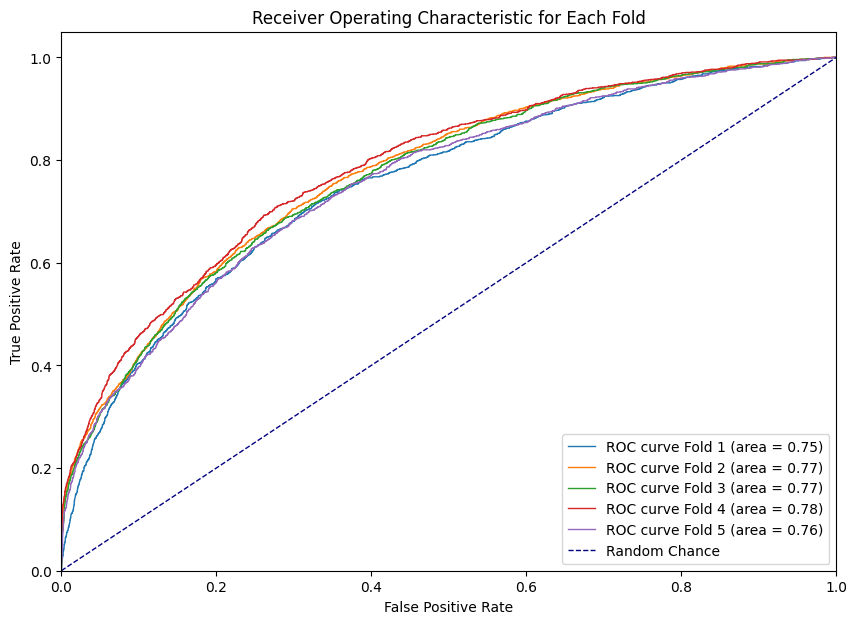

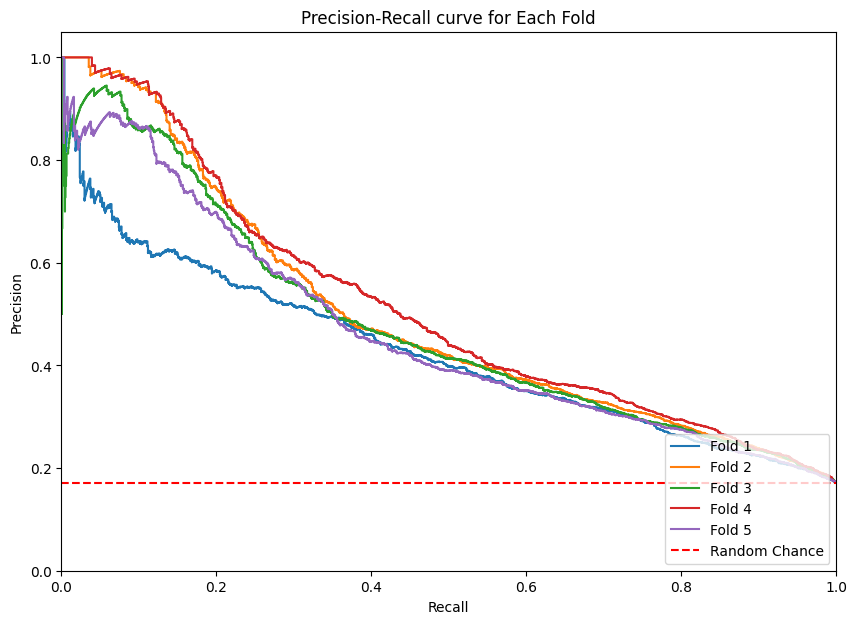

Epoch 1/10
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6352 - auc: 0.6877 - precision: 0.2660 - recall: 0.6090 - f1_metric: 0.3538 - val_loss: 0.5810 - val_auc: 0.7621 - val_precision: 0.3342 - val_recall: 0.6793 - val_f1_metric: 0.4325
Epoch 2/10
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6042 - auc: 0.7329 - precision: 0.3043 - recall: 0.6456 - f1_metric: 0.4034 - val_loss: 0.5678 - val_auc: 0.7678 - val_precision: 0.3416 - val_recall: 0.6595 - val_f1_metric: 0.4322
Epoch 3/10
1005/1005 [==============================] - 4s 4ms/step - loss: 0.5919 - auc: 0.7468 - precision: 0.3139 - recall: 0.6546 - f1_metric: 0.4123 - val_loss: 0.6348 - val_auc: 0.7719 - val_precision: 0.2902 - val_recall: 0.7857 - val_f1_metric: 0.4090
Epoch 4/10
1005/1005 [==============================] - 5s 5ms/step - loss: 0.5899 - auc: 0.7492 - precision: 0.3147 - recall: 0.6513 - f1_metric: 0.4126 - val_loss: 0.5792 - val_auc: 0.7737 - val_precision: 0.3253 - val

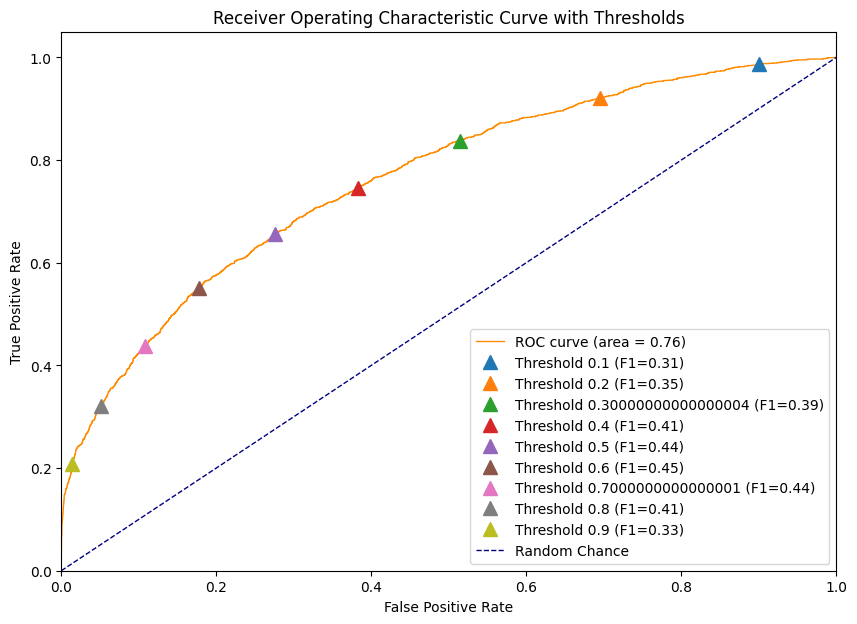

335/335 [==============================] - 0s 1ms/step


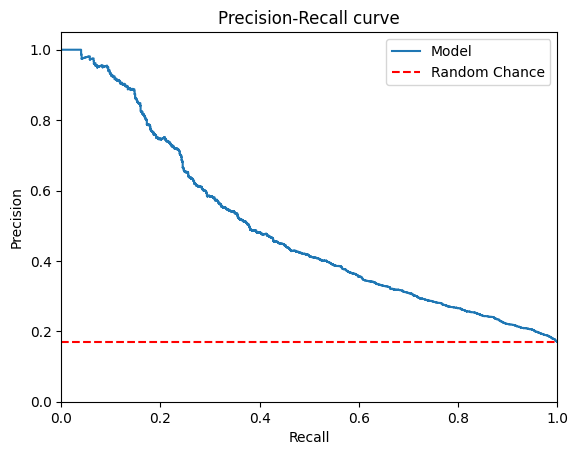

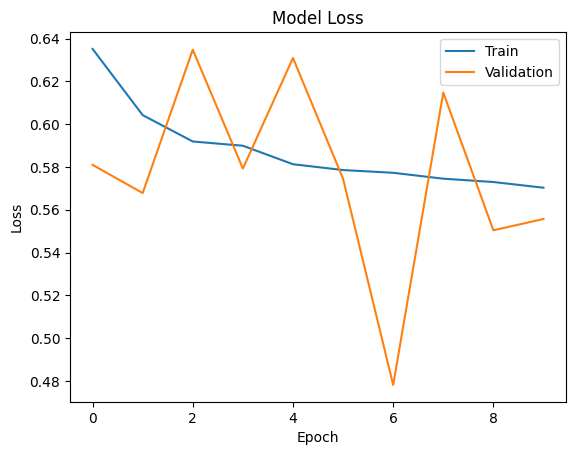

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.17086527929901424
AUC Confidence interval: (0.75, 0.77)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN(df, 'gatortron_base_embeddings_average')

# Gatortron All Layers

[I 2023-09-12 06:32:05,113] A new study created in memory with name: no-name-24b24d06-abb5-42bc-98ac-621afc9a5503


268/268 [==============================] - 1s 2ms/step - loss: 0.6170 - auc: 0.7765


[I 2023-09-12 06:32:52,825] Trial 0 finished with value: 0.7764623165130615 and parameters: {'dropout_rate': 0.14128028561701744, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6850 - auc: 0.5000


[I 2023-09-12 06:33:29,288] Trial 1 finished with value: 0.5 and parameters: {'dropout_rate': 0.47072831480752153, 'n_units': 57, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6096 - auc: 0.7738


[I 2023-09-12 06:34:04,466] Trial 2 finished with value: 0.7737907767295837 and parameters: {'dropout_rate': 0.202823698358716, 'n_units': 121, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.5640 - auc: 0.7747


[I 2023-09-12 06:34:39,599] Trial 3 finished with value: 0.7747099995613098 and parameters: {'dropout_rate': 0.37580196833004953, 'n_units': 112, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6934 - auc: 0.7701


[I 2023-09-12 06:35:16,852] Trial 4 finished with value: 0.7700756788253784 and parameters: {'dropout_rate': 0.3921276831685233, 'n_units': 97, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.5726 - auc: 0.7750


[I 2023-09-12 06:35:53,394] Trial 5 finished with value: 0.7750272750854492 and parameters: {'dropout_rate': 0.2643593318624587, 'n_units': 83, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7764623165130615.


268/268 [==============================] - 1s 2ms/step - loss: 0.5080 - auc: 0.7770


[I 2023-09-12 06:36:30,096] Trial 6 finished with value: 0.7769654989242554 and parameters: {'dropout_rate': 0.14565687176741876, 'n_units': 38, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.7769654989242554.


268/268 [==============================] - 1s 2ms/step - loss: 0.6655 - auc: 0.7696


[I 2023-09-12 06:37:05,617] Trial 7 finished with value: 0.7696214914321899 and parameters: {'dropout_rate': 0.2552013209850768, 'n_units': 42, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7769654989242554.


268/268 [==============================] - 1s 2ms/step - loss: 0.5681 - auc: 0.7461


[I 2023-09-12 06:37:42,175] Trial 8 finished with value: 0.7461493015289307 and parameters: {'dropout_rate': 0.41287584792040255, 'n_units': 71, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.7769654989242554.


268/268 [==============================] - 1s 2ms/step - loss: 0.5933 - auc: 0.7748


[I 2023-09-12 06:38:17,318] Trial 9 finished with value: 0.7748104929924011 and parameters: {'dropout_rate': 0.3450093021614563, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7769654989242554.


268/268 [==============================] - 1s 2ms/step - loss: 0.5951 - auc: 0.7682


[I 2023-09-12 06:38:54,375] Trial 10 finished with value: 0.7682216763496399 and parameters: {'dropout_rate': 0.11516045031189351, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.7769654989242554.


268/268 [==============================] - 1s 2ms/step - loss: 0.5603 - auc: 0.7798


[I 2023-09-12 06:39:30,872] Trial 11 finished with value: 0.7797697186470032 and parameters: {'dropout_rate': 0.10239380181883886, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7797697186470032.


268/268 [==============================] - 1s 2ms/step - loss: 0.5013 - auc: 0.7800


[I 2023-09-12 06:40:07,822] Trial 12 finished with value: 0.7799601554870605 and parameters: {'dropout_rate': 0.1047975278960997, 'n_units': 58, 'optimizer': 'Adam'}. Best is trial 12 with value: 0.7799601554870605.


268/268 [==============================] - 1s 2ms/step - loss: 0.4602 - auc: 0.7792


[I 2023-09-12 06:40:45,428] Trial 13 finished with value: 0.7792415022850037 and parameters: {'dropout_rate': 0.11025130808147104, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 12 with value: 0.7799601554870605.


268/268 [==============================] - 1s 2ms/step - loss: 0.5041 - auc: 0.7714


[I 2023-09-12 06:41:22,811] Trial 14 finished with value: 0.7713727355003357 and parameters: {'dropout_rate': 0.208331257699931, 'n_units': 51, 'optimizer': 'Adam'}. Best is trial 12 with value: 0.7799601554870605.


Fold [    7    10    12 ... 42861 42865 42867]
Best AUC: 0.7799601554870605
Best hyperparameters: {'dropout_rate': 0.1047975278960997, 'n_units': 58, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 06:42:02,543] A new study created in memory with name: no-name-401d7afb-c6d3-444c-acd2-1b8c87dc46d4


268/268 [==============================] - 1s 2ms/step - loss: 0.5543 - auc: 0.7739


[I 2023-09-12 06:42:38,250] Trial 0 finished with value: 0.7739263772964478 and parameters: {'dropout_rate': 0.17634438184146004, 'n_units': 94, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6681 - auc: 0.7166


[I 2023-09-12 06:43:13,400] Trial 1 finished with value: 0.7165705561637878 and parameters: {'dropout_rate': 0.3540116725805479, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6363 - auc: 0.7720


[I 2023-09-12 06:43:48,786] Trial 2 finished with value: 0.7719966173171997 and parameters: {'dropout_rate': 0.1408015205532212, 'n_units': 76, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6364 - auc: 0.7693


[I 2023-09-12 06:44:25,064] Trial 3 finished with value: 0.7692539095878601 and parameters: {'dropout_rate': 0.2943203934983184, 'n_units': 81, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5747 - auc: 0.7650


[I 2023-09-12 06:45:00,396] Trial 4 finished with value: 0.7649767398834229 and parameters: {'dropout_rate': 0.4504767776501235, 'n_units': 122, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6137 - auc: 0.7694


[I 2023-09-12 06:45:35,375] Trial 5 finished with value: 0.7693657279014587 and parameters: {'dropout_rate': 0.11450153585681147, 'n_units': 38, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6975 - auc: 0.7304


[I 2023-09-12 06:46:10,351] Trial 6 finished with value: 0.7304350733757019 and parameters: {'dropout_rate': 0.4232749425514998, 'n_units': 69, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5338 - auc: 0.7715


[I 2023-09-12 06:46:46,863] Trial 7 finished with value: 0.771500825881958 and parameters: {'dropout_rate': 0.23127123282125553, 'n_units': 84, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6339 - auc: 0.7423


[I 2023-09-12 06:47:22,084] Trial 8 finished with value: 0.7422720193862915 and parameters: {'dropout_rate': 0.4858356342769119, 'n_units': 72, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6571 - auc: 0.7685


[I 2023-09-12 06:47:57,041] Trial 9 finished with value: 0.7684696316719055 and parameters: {'dropout_rate': 0.30395809116808664, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5403 - auc: 0.7708


[I 2023-09-12 06:48:32,928] Trial 10 finished with value: 0.7708051800727844 and parameters: {'dropout_rate': 0.18258423995903075, 'n_units': 111, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6209 - auc: 0.7731


[I 2023-09-12 06:49:07,801] Trial 11 finished with value: 0.773075520992279 and parameters: {'dropout_rate': 0.10262156606469064, 'n_units': 101, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5606 - auc: 0.7702


[I 2023-09-12 06:49:42,265] Trial 12 finished with value: 0.7702144980430603 and parameters: {'dropout_rate': 0.10685349894418278, 'n_units': 103, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.6317 - auc: 0.7718


[I 2023-09-12 06:50:16,768] Trial 13 finished with value: 0.7718159556388855 and parameters: {'dropout_rate': 0.18027488762059665, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5966 - auc: 0.7681


[I 2023-09-12 06:50:51,438] Trial 14 finished with value: 0.7681083679199219 and parameters: {'dropout_rate': 0.1774220333605196, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7739263772964478.


Fold [    6     8    16 ... 42839 42848 42866]
Best AUC: 0.7739263772964478
Best hyperparameters: {'dropout_rate': 0.17634438184146004, 'n_units': 94, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 06:51:20,357] A new study created in memory with name: no-name-cc74069f-c79d-4d12-ad8f-c5dc33373817


268/268 [==============================] - 1s 2ms/step - loss: 0.6277 - auc: 0.7378


[I 2023-09-12 06:51:55,937] Trial 0 finished with value: 0.7377659678459167 and parameters: {'dropout_rate': 0.41880864900356807, 'n_units': 83, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7377659678459167.


268/268 [==============================] - 1s 2ms/step - loss: 0.6017 - auc: 0.7620


[I 2023-09-12 06:52:30,261] Trial 1 finished with value: 0.7619722485542297 and parameters: {'dropout_rate': 0.17452202206931566, 'n_units': 46, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7619722485542297.


268/268 [==============================] - 1s 2ms/step - loss: 0.6912 - auc: 0.5000


[I 2023-09-12 06:53:05,784] Trial 2 finished with value: 0.5 and parameters: {'dropout_rate': 0.3791463317495757, 'n_units': 52, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7619722485542297.


268/268 [==============================] - 1s 2ms/step - loss: 0.6877 - auc: 0.7497


[I 2023-09-12 06:53:40,939] Trial 3 finished with value: 0.7496734857559204 and parameters: {'dropout_rate': 0.3461735534713165, 'n_units': 87, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7619722485542297.


268/268 [==============================] - 1s 2ms/step - loss: 0.6198 - auc: 0.7643


[I 2023-09-12 06:54:16,863] Trial 4 finished with value: 0.7643061876296997 and parameters: {'dropout_rate': 0.2970301694386943, 'n_units': 102, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7643061876296997.


268/268 [==============================] - 1s 2ms/step - loss: 0.5417 - auc: 0.7646


[I 2023-09-12 06:54:51,194] Trial 5 finished with value: 0.7645733952522278 and parameters: {'dropout_rate': 0.3552740912764608, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7645733952522278.


268/268 [==============================] - 1s 2ms/step - loss: 0.4862 - auc: 0.7627


[I 2023-09-12 06:55:25,212] Trial 6 finished with value: 0.7627134323120117 and parameters: {'dropout_rate': 0.2386335429287666, 'n_units': 85, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7645733952522278.


268/268 [==============================] - 1s 2ms/step - loss: 0.5726 - auc: 0.7637


[I 2023-09-12 06:55:59,406] Trial 7 finished with value: 0.7636637091636658 and parameters: {'dropout_rate': 0.2146499757341884, 'n_units': 41, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7645733952522278.


268/268 [==============================] - 1s 2ms/step - loss: 0.5206 - auc: 0.7593


[I 2023-09-12 06:56:33,270] Trial 8 finished with value: 0.7593041062355042 and parameters: {'dropout_rate': 0.4224601680207153, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7645733952522278.


268/268 [==============================] - 1s 2ms/step - loss: 0.7209 - auc: 0.7634


[I 2023-09-12 06:57:08,715] Trial 9 finished with value: 0.7633522748947144 and parameters: {'dropout_rate': 0.19297538382469034, 'n_units': 83, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7645733952522278.


268/268 [==============================] - 1s 2ms/step - loss: 0.5406 - auc: 0.7702


[I 2023-09-12 06:57:43,447] Trial 10 finished with value: 0.7702434659004211 and parameters: {'dropout_rate': 0.10522617672446183, 'n_units': 60, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7702434659004211.


268/268 [==============================] - 1s 2ms/step - loss: 0.6148 - auc: 0.7663


[I 2023-09-12 06:58:17,567] Trial 11 finished with value: 0.7662801146507263 and parameters: {'dropout_rate': 0.125449534374512, 'n_units': 60, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7702434659004211.


268/268 [==============================] - 1s 2ms/step - loss: 0.8313 - auc: 0.7548


[I 2023-09-12 06:58:52,061] Trial 12 finished with value: 0.7548408508300781 and parameters: {'dropout_rate': 0.11473735741098924, 'n_units': 65, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7702434659004211.


268/268 [==============================] - 1s 2ms/step - loss: 0.6652 - auc: 0.7634


[I 2023-09-12 06:59:26,318] Trial 13 finished with value: 0.763445258140564 and parameters: {'dropout_rate': 0.10131200584185421, 'n_units': 67, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7702434659004211.


268/268 [==============================] - 1s 2ms/step - loss: 0.6733 - auc: 0.7654


[I 2023-09-12 07:00:01,050] Trial 14 finished with value: 0.765411913394928 and parameters: {'dropout_rate': 0.14371542117010647, 'n_units': 121, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.7702434659004211.


Fold [    3     5    17 ... 42862 42864 42868]
Best AUC: 0.7702434659004211
Best hyperparameters: {'dropout_rate': 0.10522617672446183, 'n_units': 60, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 07:00:33,079] A new study created in memory with name: no-name-0a6c64ff-7b1e-40a9-a7e2-770ada318e42


268/268 [==============================] - 1s 2ms/step - loss: 0.5441 - auc: 0.7815


[I 2023-09-12 07:01:08,700] Trial 0 finished with value: 0.7814950346946716 and parameters: {'dropout_rate': 0.1864595306084084, 'n_units': 123, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7814950346946716.


268/268 [==============================] - 1s 2ms/step - loss: 0.6506 - auc: 0.7825


[I 2023-09-12 07:01:42,863] Trial 1 finished with value: 0.782542884349823 and parameters: {'dropout_rate': 0.21230564585775136, 'n_units': 112, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6124 - auc: 0.7723


[I 2023-09-12 07:02:17,247] Trial 2 finished with value: 0.7723289132118225 and parameters: {'dropout_rate': 0.35422964256036404, 'n_units': 108, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6944 - auc: 0.7746


[I 2023-09-12 07:02:51,884] Trial 3 finished with value: 0.7746387720108032 and parameters: {'dropout_rate': 0.28774289843256173, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.4621 - auc: 0.7716


[I 2023-09-12 07:03:26,882] Trial 4 finished with value: 0.7716461420059204 and parameters: {'dropout_rate': 0.328021692922006, 'n_units': 37, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.5083 - auc: 0.7766


[I 2023-09-12 07:04:01,318] Trial 5 finished with value: 0.7765658497810364 and parameters: {'dropout_rate': 0.2491514724113495, 'n_units': 117, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6158 - auc: 0.7353


[I 2023-09-12 07:04:36,606] Trial 6 finished with value: 0.7353290319442749 and parameters: {'dropout_rate': 0.4306238268819361, 'n_units': 122, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.5896 - auc: 0.7809


[I 2023-09-12 07:05:12,205] Trial 7 finished with value: 0.7809231281280518 and parameters: {'dropout_rate': 0.2563977225603634, 'n_units': 67, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.5891 - auc: 0.7627


[I 2023-09-12 07:05:48,512] Trial 8 finished with value: 0.762658417224884 and parameters: {'dropout_rate': 0.33171130155943174, 'n_units': 96, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6965 - auc: 0.5000


[I 2023-09-12 07:06:24,014] Trial 9 finished with value: 0.5 and parameters: {'dropout_rate': 0.36785452217579906, 'n_units': 79, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.7566 - auc: 0.7797


[I 2023-09-12 07:06:58,707] Trial 10 finished with value: 0.7797051072120667 and parameters: {'dropout_rate': 0.10175159425919358, 'n_units': 51, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6780 - auc: 0.7791


[I 2023-09-12 07:07:34,401] Trial 11 finished with value: 0.7791183590888977 and parameters: {'dropout_rate': 0.1804645142379251, 'n_units': 123, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.5591 - auc: 0.7821


[I 2023-09-12 07:08:09,390] Trial 12 finished with value: 0.7820642590522766 and parameters: {'dropout_rate': 0.1933341900695312, 'n_units': 89, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.5105 - auc: 0.7820


[I 2023-09-12 07:08:43,878] Trial 13 finished with value: 0.7820165157318115 and parameters: {'dropout_rate': 0.19895138295039386, 'n_units': 86, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


268/268 [==============================] - 1s 2ms/step - loss: 0.6194 - auc: 0.7774


[I 2023-09-12 07:09:18,985] Trial 14 finished with value: 0.7773765921592712 and parameters: {'dropout_rate': 0.13786721806460236, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.782542884349823.


Fold [    1    11    15 ... 42852 42856 42863]
Best AUC: 0.782542884349823
Best hyperparameters: {'dropout_rate': 0.21230564585775136, 'n_units': 112, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 07:09:59,332] A new study created in memory with name: no-name-1e1c76d1-e057-4e2c-869a-e8f50d90299d


268/268 [==============================] - 1s 2ms/step - loss: 0.6930 - auc: 0.5000


[I 2023-09-12 07:10:35,462] Trial 0 finished with value: 0.5 and parameters: {'dropout_rate': 0.3531218663275021, 'n_units': 38, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5.


268/268 [==============================] - 1s 2ms/step - loss: 0.5758 - auc: 0.7650


[I 2023-09-12 07:11:10,453] Trial 1 finished with value: 0.7650300860404968 and parameters: {'dropout_rate': 0.22488512324705617, 'n_units': 34, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7650300860404968.


268/268 [==============================] - 1s 2ms/step - loss: 0.6468 - auc: 0.7597


[I 2023-09-12 07:11:46,175] Trial 2 finished with value: 0.7597067952156067 and parameters: {'dropout_rate': 0.2996687010307158, 'n_units': 57, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7650300860404968.


268/268 [==============================] - 1s 2ms/step - loss: 0.4974 - auc: 0.7593


[I 2023-09-12 07:12:21,349] Trial 3 finished with value: 0.7592663168907166 and parameters: {'dropout_rate': 0.44654737245106035, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7650300860404968.


268/268 [==============================] - 1s 2ms/step - loss: 0.5621 - auc: 0.7667


[I 2023-09-12 07:12:57,974] Trial 4 finished with value: 0.7667391300201416 and parameters: {'dropout_rate': 0.1527952002813925, 'n_units': 70, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.6344 - auc: 0.7164


[I 2023-09-12 07:13:32,947] Trial 5 finished with value: 0.7164283990859985 and parameters: {'dropout_rate': 0.4998638896028017, 'n_units': 57, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.7852 - auc: 0.7391


[I 2023-09-12 07:14:07,673] Trial 6 finished with value: 0.7390894889831543 and parameters: {'dropout_rate': 0.30829071271503783, 'n_units': 118, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.5749 - auc: 0.7649


[I 2023-09-12 07:14:42,531] Trial 7 finished with value: 0.7648871541023254 and parameters: {'dropout_rate': 0.1397608766810819, 'n_units': 51, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.5054 - auc: 0.7605


[I 2023-09-12 07:15:17,301] Trial 8 finished with value: 0.7605393528938293 and parameters: {'dropout_rate': 0.4199637113644503, 'n_units': 45, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.5680 - auc: 0.7564


[I 2023-09-12 07:15:52,304] Trial 9 finished with value: 0.7563532590866089 and parameters: {'dropout_rate': 0.41104921312121334, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.5050 - auc: 0.7667


[I 2023-09-12 07:16:28,277] Trial 10 finished with value: 0.766688883304596 and parameters: {'dropout_rate': 0.1459349513605727, 'n_units': 102, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7667391300201416.


268/268 [==============================] - 1s 2ms/step - loss: 0.5154 - auc: 0.7703


[I 2023-09-12 07:17:04,352] Trial 11 finished with value: 0.7702727913856506 and parameters: {'dropout_rate': 0.10230688488376274, 'n_units': 96, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7702727913856506.


268/268 [==============================] - 1s 2ms/step - loss: 0.5600 - auc: 0.7638


[I 2023-09-12 07:17:40,499] Trial 12 finished with value: 0.763765275478363 and parameters: {'dropout_rate': 0.10736483213822437, 'n_units': 88, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7702727913856506.


268/268 [==============================] - 1s 2ms/step - loss: 0.5981 - auc: 0.7630


[I 2023-09-12 07:18:17,224] Trial 13 finished with value: 0.7630051374435425 and parameters: {'dropout_rate': 0.19066711443157758, 'n_units': 82, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7702727913856506.


268/268 [==============================] - 1s 2ms/step - loss: 0.5705 - auc: 0.7662


[I 2023-09-12 07:18:53,557] Trial 14 finished with value: 0.7661690711975098 and parameters: {'dropout_rate': 0.10080833675243277, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7702727913856506.


Fold [    0     2     4 ... 42835 42840 42854]
Best AUC: 0.7702727913856506
Best hyperparameters: {'dropout_rate': 0.10230688488376274, 'n_units': 96, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


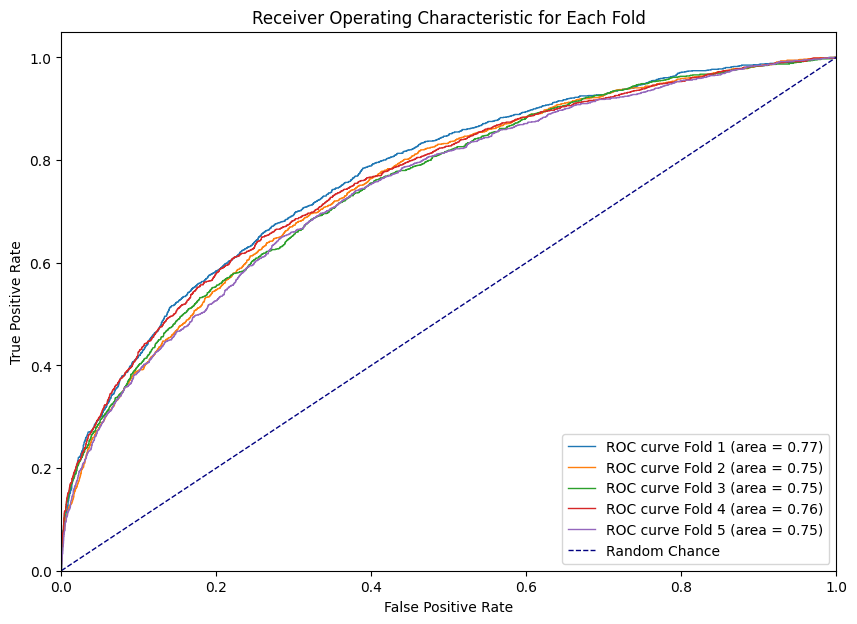

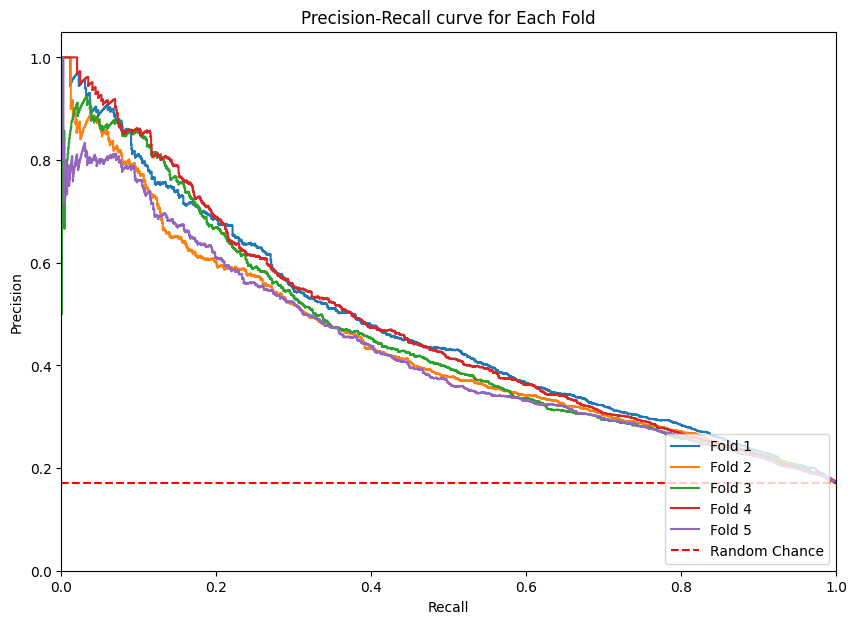

Epoch 1/10
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6826 - auc: 0.6368 - precision: 0.2341 - recall: 0.5969 - f1_metric: 0.3224 - val_loss: 0.6512 - val_auc: 0.7475 - val_precision: 0.2681 - val_recall: 0.8001 - val_f1_metric: 0.3890
Epoch 2/10
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6232 - auc: 0.7102 - precision: 0.2763 - recall: 0.6520 - f1_metric: 0.3736 - val_loss: 0.5366 - val_auc: 0.7647 - val_precision: 0.3683 - val_recall: 0.6002 - val_f1_metric: 0.4362
Epoch 3/10
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6105 - auc: 0.7278 - precision: 0.2852 - recall: 0.6744 - f1_metric: 0.3894 - val_loss: 0.6993 - val_auc: 0.7695 - val_precision: 0.2640 - val_recall: 0.8450 - val_f1_metric: 0.3905
Epoch 4/10
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6054 - auc: 0.7314 - precision: 0.2850 - recall: 0.6797 - f1_metric: 0.3890 - val_loss: 0.6106 - val_auc: 0.7626 - val_precision: 0.2754 - val

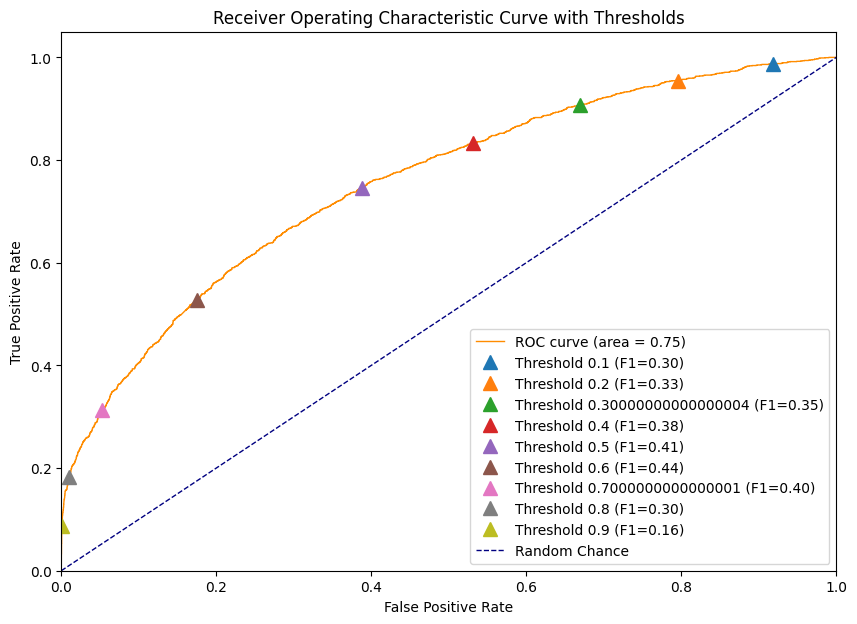

335/335 [==============================] - 0s 1ms/step


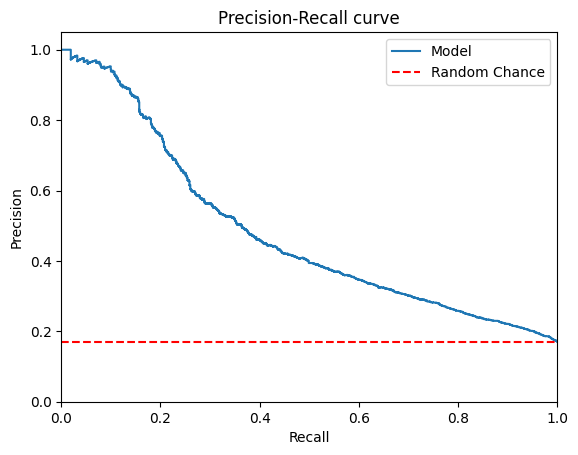

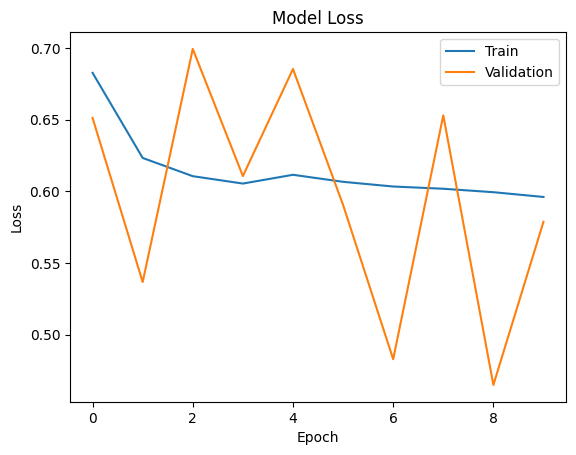

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.18072289156626506
AUC Confidence interval: (0.74, 0.76)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN(df, 'gatortron_base_embeddings_all_layers')

# BERT Last Hidden State

[I 2023-09-12 08:13:08,317] A new study created in memory with name: no-name-11eee6bb-01bc-48b5-a566-97a91973c8ff


268/268 [==============================] - 1s 2ms/step - loss: 0.6913 - auc: 0.5000


[I 2023-09-12 08:13:56,908] Trial 0 finished with value: 0.5 and parameters: {'dropout_rate': 0.4015119142772696, 'n_units': 33, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5.


268/268 [==============================] - 1s 2ms/step - loss: 0.5008 - auc: 0.7338


[I 2023-09-12 08:14:32,569] Trial 1 finished with value: 0.7338343262672424 and parameters: {'dropout_rate': 0.4191394324444405, 'n_units': 99, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7338343262672424.


268/268 [==============================] - 1s 2ms/step - loss: 0.6348 - auc: 0.7352


[I 2023-09-12 08:15:08,319] Trial 2 finished with value: 0.735244870185852 and parameters: {'dropout_rate': 0.26961595541200745, 'n_units': 44, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.735244870185852.


268/268 [==============================] - 1s 2ms/step - loss: 0.6063 - auc: 0.7345


[I 2023-09-12 08:15:45,579] Trial 3 finished with value: 0.7345262765884399 and parameters: {'dropout_rate': 0.3705645758717385, 'n_units': 87, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.735244870185852.


268/268 [==============================] - 1s 2ms/step - loss: 0.5889 - auc: 0.6943


[I 2023-09-12 08:16:22,552] Trial 4 finished with value: 0.6943164467811584 and parameters: {'dropout_rate': 0.23158446320277457, 'n_units': 33, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.735244870185852.


268/268 [==============================] - 1s 2ms/step - loss: 0.5992 - auc: 0.7434


[I 2023-09-12 08:16:59,545] Trial 5 finished with value: 0.7434306740760803 and parameters: {'dropout_rate': 0.12211799397018375, 'n_units': 77, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7434306740760803.


268/268 [==============================] - 1s 2ms/step - loss: 0.5999 - auc: 0.7394


[I 2023-09-12 08:17:35,766] Trial 6 finished with value: 0.7393922209739685 and parameters: {'dropout_rate': 0.3886086485630874, 'n_units': 89, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7434306740760803.


268/268 [==============================] - 1s 2ms/step - loss: 0.5784 - auc: 0.7347


[I 2023-09-12 08:18:11,305] Trial 7 finished with value: 0.7346949577331543 and parameters: {'dropout_rate': 0.474051426290268, 'n_units': 89, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7434306740760803.


268/268 [==============================] - 1s 2ms/step - loss: 0.6442 - auc: 0.7245


[I 2023-09-12 08:18:48,513] Trial 8 finished with value: 0.7245256304740906 and parameters: {'dropout_rate': 0.415132831679766, 'n_units': 93, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7434306740760803.


268/268 [==============================] - 1s 2ms/step - loss: 0.6420 - auc: 0.7445


[I 2023-09-12 08:19:23,860] Trial 9 finished with value: 0.7444563508033752 and parameters: {'dropout_rate': 0.15687018241386574, 'n_units': 70, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.7444563508033752.


268/268 [==============================] - 1s 2ms/step - loss: 0.7264 - auc: 0.7394


[I 2023-09-12 08:20:00,064] Trial 10 finished with value: 0.7393539547920227 and parameters: {'dropout_rate': 0.10281425516075318, 'n_units': 122, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.7444563508033752.


268/268 [==============================] - 1s 2ms/step - loss: 0.5997 - auc: 0.7438


[I 2023-09-12 08:20:36,940] Trial 11 finished with value: 0.743833601474762 and parameters: {'dropout_rate': 0.1071934270543412, 'n_units': 63, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7444563508033752.


268/268 [==============================] - 1s 2ms/step - loss: 0.6909 - auc: 0.7389


[I 2023-09-12 08:21:13,906] Trial 12 finished with value: 0.738889217376709 and parameters: {'dropout_rate': 0.1734256427600523, 'n_units': 62, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7444563508033752.


268/268 [==============================] - 1s 2ms/step - loss: 0.6752 - auc: 0.7413


[I 2023-09-12 08:21:49,413] Trial 13 finished with value: 0.7413190603256226 and parameters: {'dropout_rate': 0.18516894344757742, 'n_units': 63, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.7444563508033752.


268/268 [==============================] - 1s 2ms/step - loss: 0.6563 - auc: 0.7451


[I 2023-09-12 08:22:24,927] Trial 14 finished with value: 0.7451366782188416 and parameters: {'dropout_rate': 0.1515461596268505, 'n_units': 63, 'optimizer': 'RMSprop'}. Best is trial 14 with value: 0.7451366782188416.


Fold [    7    10    12 ... 42861 42865 42867]
Best AUC: 0.7451366782188416
Best hyperparameters: {'dropout_rate': 0.1515461596268505, 'n_units': 63, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 08:23:06,335] A new study created in memory with name: no-name-55dac611-495c-4a32-987e-40779abf16e8


268/268 [==============================] - 1s 2ms/step - loss: 0.6212 - auc: 0.7367


[I 2023-09-12 08:23:41,853] Trial 0 finished with value: 0.7366529107093811 and parameters: {'dropout_rate': 0.2941552260189685, 'n_units': 60, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7366529107093811.


268/268 [==============================] - 1s 2ms/step - loss: 0.6257 - auc: 0.7430


[I 2023-09-12 08:24:17,338] Trial 1 finished with value: 0.7430190443992615 and parameters: {'dropout_rate': 0.18157992170786175, 'n_units': 64, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6317 - auc: 0.7169


[I 2023-09-12 08:24:54,030] Trial 2 finished with value: 0.7168842554092407 and parameters: {'dropout_rate': 0.4362193279500072, 'n_units': 97, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6754 - auc: 0.7071


[I 2023-09-12 08:25:30,614] Trial 3 finished with value: 0.7070524096488953 and parameters: {'dropout_rate': 0.39092272990332255, 'n_units': 38, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6241 - auc: 0.7368


[I 2023-09-12 08:26:05,721] Trial 4 finished with value: 0.7367939949035645 and parameters: {'dropout_rate': 0.40032583160690594, 'n_units': 61, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6486 - auc: 0.7338


[I 2023-09-12 08:26:41,190] Trial 5 finished with value: 0.7337580919265747 and parameters: {'dropout_rate': 0.2952835834063515, 'n_units': 119, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6237 - auc: 0.7237


[I 2023-09-12 08:27:18,069] Trial 6 finished with value: 0.7237207889556885 and parameters: {'dropout_rate': 0.369422917108165, 'n_units': 98, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.5907 - auc: 0.7399


[I 2023-09-12 08:27:53,748] Trial 7 finished with value: 0.7399106621742249 and parameters: {'dropout_rate': 0.37166450839548293, 'n_units': 47, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7430190443992615.


268/268 [==============================] - 1s 2ms/step - loss: 0.6085 - auc: 0.7436


[I 2023-09-12 08:28:30,437] Trial 8 finished with value: 0.7436365485191345 and parameters: {'dropout_rate': 0.10063659581721432, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7436365485191345.


268/268 [==============================] - 1s 2ms/step - loss: 0.7023 - auc: 0.7093


[I 2023-09-12 08:29:06,987] Trial 9 finished with value: 0.7092741131782532 and parameters: {'dropout_rate': 0.23211208603947103, 'n_units': 55, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7436365485191345.


268/268 [==============================] - 1s 2ms/step - loss: 0.5228 - auc: 0.7431


[I 2023-09-12 08:29:43,747] Trial 10 finished with value: 0.7430853247642517 and parameters: {'dropout_rate': 0.10928046535257366, 'n_units': 86, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7436365485191345.


268/268 [==============================] - 1s 2ms/step - loss: 0.5644 - auc: 0.7450


[I 2023-09-12 08:30:20,829] Trial 11 finished with value: 0.745002269744873 and parameters: {'dropout_rate': 0.10448760697437547, 'n_units': 85, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.745002269744873.


268/268 [==============================] - 1s 2ms/step - loss: 0.5492 - auc: 0.7440


[I 2023-09-12 08:30:57,285] Trial 12 finished with value: 0.7439928650856018 and parameters: {'dropout_rate': 0.11730921966586061, 'n_units': 80, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.745002269744873.


268/268 [==============================] - 1s 2ms/step - loss: 0.5028 - auc: 0.7428


[I 2023-09-12 08:31:33,555] Trial 13 finished with value: 0.742810845375061 and parameters: {'dropout_rate': 0.16831600765988816, 'n_units': 74, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.745002269744873.


268/268 [==============================] - 1s 2ms/step - loss: 0.6121 - auc: 0.7418


[I 2023-09-12 08:32:10,849] Trial 14 finished with value: 0.7418181300163269 and parameters: {'dropout_rate': 0.15654349560003894, 'n_units': 116, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.745002269744873.


Fold [    6     8    16 ... 42839 42848 42866]
Best AUC: 0.745002269744873
Best hyperparameters: {'dropout_rate': 0.10448760697437547, 'n_units': 85, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 08:32:37,258] A new study created in memory with name: no-name-61a8ef9f-3311-4bfe-b5a6-14f7e4668fa6


268/268 [==============================] - 1s 2ms/step - loss: 0.5713 - auc: 0.7298


[I 2023-09-12 08:33:12,989] Trial 0 finished with value: 0.7297587394714355 and parameters: {'dropout_rate': 0.19043974586254017, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7297587394714355.


268/268 [==============================] - 1s 2ms/step - loss: 0.6490 - auc: 0.7227


[I 2023-09-12 08:33:48,041] Trial 1 finished with value: 0.7227092385292053 and parameters: {'dropout_rate': 0.31169666646325994, 'n_units': 35, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7297587394714355.


268/268 [==============================] - 1s 2ms/step - loss: 0.5110 - auc: 0.7317


[I 2023-09-12 08:34:24,862] Trial 2 finished with value: 0.731651782989502 and parameters: {'dropout_rate': 0.29503215588393666, 'n_units': 81, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.6194 - auc: 0.7267


[I 2023-09-12 08:34:59,836] Trial 3 finished with value: 0.7266892194747925 and parameters: {'dropout_rate': 0.28883302284309803, 'n_units': 42, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.7064 - auc: 0.7298


[I 2023-09-12 08:35:34,746] Trial 4 finished with value: 0.7297717332839966 and parameters: {'dropout_rate': 0.1574431302447454, 'n_units': 69, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5603 - auc: 0.7279


[I 2023-09-12 08:36:09,596] Trial 5 finished with value: 0.727912187576294 and parameters: {'dropout_rate': 0.3712945412902299, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5692 - auc: 0.7208


[I 2023-09-12 08:36:44,125] Trial 6 finished with value: 0.7208118438720703 and parameters: {'dropout_rate': 0.41807953052933977, 'n_units': 59, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.6359 - auc: 0.6780


[I 2023-09-12 08:37:20,347] Trial 7 finished with value: 0.677964448928833 and parameters: {'dropout_rate': 0.4548638721905901, 'n_units': 87, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5190 - auc: 0.7280


[I 2023-09-12 08:37:55,233] Trial 8 finished with value: 0.7279951572418213 and parameters: {'dropout_rate': 0.3525027680568721, 'n_units': 57, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5990 - auc: 0.7159


[I 2023-09-12 08:38:30,402] Trial 9 finished with value: 0.7159401774406433 and parameters: {'dropout_rate': 0.49743043025681977, 'n_units': 82, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5421 - auc: 0.7304


[I 2023-09-12 08:39:06,622] Trial 10 finished with value: 0.7303502559661865 and parameters: {'dropout_rate': 0.24051295395802652, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.731651782989502.


268/268 [==============================] - 1s 2ms/step - loss: 0.5727 - auc: 0.7352


[I 2023-09-12 08:39:42,857] Trial 11 finished with value: 0.7352051734924316 and parameters: {'dropout_rate': 0.22148693945453735, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7352051734924316.


268/268 [==============================] - 1s 2ms/step - loss: 0.5909 - auc: 0.7356


[I 2023-09-12 08:40:19,055] Trial 12 finished with value: 0.7356460690498352 and parameters: {'dropout_rate': 0.10838387108761033, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 12 with value: 0.7356460690498352.


268/268 [==============================] - 1s 2ms/step - loss: 0.5984 - auc: 0.7375


[I 2023-09-12 08:40:55,518] Trial 13 finished with value: 0.7375338077545166 and parameters: {'dropout_rate': 0.11999742985411525, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 13 with value: 0.7375338077545166.


268/268 [==============================] - 1s 2ms/step - loss: 0.5524 - auc: 0.7386


[I 2023-09-12 08:41:32,189] Trial 14 finished with value: 0.7385749220848083 and parameters: {'dropout_rate': 0.11870983077795648, 'n_units': 110, 'optimizer': 'Adam'}. Best is trial 14 with value: 0.7385749220848083.


Fold [    3     5    17 ... 42862 42864 42868]
Best AUC: 0.7385749220848083
Best hyperparameters: {'dropout_rate': 0.11870983077795648, 'n_units': 110, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 08:42:14,143] A new study created in memory with name: no-name-56ec0457-b2b4-4dfa-ae86-f82baebf8259


268/268 [==============================] - 1s 2ms/step - loss: 0.7571 - auc: 0.7482


[I 2023-09-12 08:42:49,135] Trial 0 finished with value: 0.7482220530509949 and parameters: {'dropout_rate': 0.13233419149241668, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7482220530509949.


268/268 [==============================] - 1s 2ms/step - loss: 0.6964 - auc: 0.7491


[I 2023-09-12 08:43:25,859] Trial 1 finished with value: 0.749141275882721 and parameters: {'dropout_rate': 0.2010086593577532, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.749141275882721.


268/268 [==============================] - 1s 2ms/step - loss: 0.6033 - auc: 0.7505


[I 2023-09-12 08:44:00,640] Trial 2 finished with value: 0.7505061626434326 and parameters: {'dropout_rate': 0.12678941673717592, 'n_units': 48, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.6095 - auc: 0.7040


[I 2023-09-12 08:44:37,784] Trial 3 finished with value: 0.704025149345398 and parameters: {'dropout_rate': 0.28254780714208483, 'n_units': 44, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.6469 - auc: 0.7197


[I 2023-09-12 08:45:14,291] Trial 4 finished with value: 0.7196971774101257 and parameters: {'dropout_rate': 0.4972869228339908, 'n_units': 111, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.5134 - auc: 0.7475


[I 2023-09-12 08:45:49,638] Trial 5 finished with value: 0.7475341558456421 and parameters: {'dropout_rate': 0.21843953770668137, 'n_units': 72, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.6322 - auc: 0.7484


[I 2023-09-12 08:46:24,859] Trial 6 finished with value: 0.7483687996864319 and parameters: {'dropout_rate': 0.15797303543581656, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.6900 - auc: 0.5000


[I 2023-09-12 08:47:00,183] Trial 7 finished with value: 0.5 and parameters: {'dropout_rate': 0.4783464818739692, 'n_units': 49, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.5726 - auc: 0.7501


[I 2023-09-12 08:47:35,220] Trial 8 finished with value: 0.7501393556594849 and parameters: {'dropout_rate': 0.1226960027547023, 'n_units': 45, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7505061626434326.


268/268 [==============================] - 1s 2ms/step - loss: 0.6153 - auc: 0.7537


[I 2023-09-12 08:48:12,094] Trial 9 finished with value: 0.7536988258361816 and parameters: {'dropout_rate': 0.15108575536605087, 'n_units': 78, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7536988258361816.


268/268 [==============================] - 1s 2ms/step - loss: 0.5888 - auc: 0.7469


[I 2023-09-12 08:48:48,539] Trial 10 finished with value: 0.7468739748001099 and parameters: {'dropout_rate': 0.3304810303709089, 'n_units': 77, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7536988258361816.


268/268 [==============================] - 1s 2ms/step - loss: 0.6531 - auc: 0.7545


[I 2023-09-12 08:49:25,028] Trial 11 finished with value: 0.7545244693756104 and parameters: {'dropout_rate': 0.1205958610750974, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7545244693756104.


268/268 [==============================] - 1s 2ms/step - loss: 0.5658 - auc: 0.7486


[I 2023-09-12 08:50:01,020] Trial 12 finished with value: 0.7485522627830505 and parameters: {'dropout_rate': 0.11241630423235943, 'n_units': 64, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7545244693756104.


268/268 [==============================] - 1s 2ms/step - loss: 0.5609 - auc: 0.7518


[I 2023-09-12 08:50:37,512] Trial 13 finished with value: 0.7517871260643005 and parameters: {'dropout_rate': 0.2114709539016053, 'n_units': 94, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7545244693756104.


268/268 [==============================] - 1s 2ms/step - loss: 0.7700 - auc: 0.7452


[I 2023-09-12 08:51:13,749] Trial 14 finished with value: 0.7451688051223755 and parameters: {'dropout_rate': 0.1822891909745875, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7545244693756104.


Fold [    1    11    15 ... 42852 42856 42863]
Best AUC: 0.7545244693756104
Best hyperparameters: {'dropout_rate': 0.1205958610750974, 'n_units': 61, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 08:51:55,543] A new study created in memory with name: no-name-86eb727d-2ab3-4078-a294-441960e78dc4


268/268 [==============================] - 1s 2ms/step - loss: 0.5734 - auc: 0.7347


[I 2023-09-12 08:52:30,237] Trial 0 finished with value: 0.7347488403320312 and parameters: {'dropout_rate': 0.13541637641716253, 'n_units': 39, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7347488403320312.


268/268 [==============================] - 1s 2ms/step - loss: 0.5834 - auc: 0.7403


[I 2023-09-12 08:53:06,176] Trial 1 finished with value: 0.7403326630592346 and parameters: {'dropout_rate': 0.14947096699943463, 'n_units': 84, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6142 - auc: 0.7261


[I 2023-09-12 08:53:42,677] Trial 2 finished with value: 0.726057767868042 and parameters: {'dropout_rate': 0.4102263564008327, 'n_units': 99, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5948 - auc: 0.7392


[I 2023-09-12 08:54:17,409] Trial 3 finished with value: 0.7392226457595825 and parameters: {'dropout_rate': 0.2301247510016467, 'n_units': 62, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5552 - auc: 0.7361


[I 2023-09-12 08:54:53,093] Trial 4 finished with value: 0.736072838306427 and parameters: {'dropout_rate': 0.25054031838480495, 'n_units': 44, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5858 - auc: 0.7279


[I 2023-09-12 08:55:28,904] Trial 5 finished with value: 0.727866530418396 and parameters: {'dropout_rate': 0.304115554772193, 'n_units': 114, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6958 - auc: 0.7324


[I 2023-09-12 08:56:04,971] Trial 6 finished with value: 0.7323589324951172 and parameters: {'dropout_rate': 0.26403397085893254, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.4827 - auc: 0.7382


[I 2023-09-12 08:56:39,627] Trial 7 finished with value: 0.7382355332374573 and parameters: {'dropout_rate': 0.26503681409616087, 'n_units': 44, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5755 - auc: 0.7373


[I 2023-09-12 08:57:14,563] Trial 8 finished with value: 0.7372927665710449 and parameters: {'dropout_rate': 0.14372072768137892, 'n_units': 47, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6795 - auc: 0.7344


[I 2023-09-12 08:57:50,596] Trial 9 finished with value: 0.7344022989273071 and parameters: {'dropout_rate': 0.2265569056231992, 'n_units': 110, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7403326630592346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5708 - auc: 0.7430


[I 2023-09-12 08:58:26,891] Trial 10 finished with value: 0.7430370450019836 and parameters: {'dropout_rate': 0.10239949080661792, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7430370450019836.


268/268 [==============================] - 1s 2ms/step - loss: 0.6120 - auc: 0.7376


[I 2023-09-12 08:59:03,294] Trial 11 finished with value: 0.7375784516334534 and parameters: {'dropout_rate': 0.11624053851555233, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7430370450019836.


268/268 [==============================] - 1s 2ms/step - loss: 0.5321 - auc: 0.7423


[I 2023-09-12 08:59:39,245] Trial 12 finished with value: 0.7423314452171326 and parameters: {'dropout_rate': 0.10226522267612723, 'n_units': 72, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7430370450019836.


268/268 [==============================] - 1s 2ms/step - loss: 0.5822 - auc: 0.7387


[I 2023-09-12 09:00:15,165] Trial 13 finished with value: 0.738738477230072 and parameters: {'dropout_rate': 0.11612823453555311, 'n_units': 68, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7430370450019836.


268/268 [==============================] - 1s 2ms/step - loss: 0.5660 - auc: 0.7388


[I 2023-09-12 09:00:50,757] Trial 14 finished with value: 0.7387742400169373 and parameters: {'dropout_rate': 0.18583373383061533, 'n_units': 68, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7430370450019836.


Fold [    0     2     4 ... 42835 42840 42854]
Best AUC: 0.7430370450019836
Best hyperparameters: {'dropout_rate': 0.10239949080661792, 'n_units': 127, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


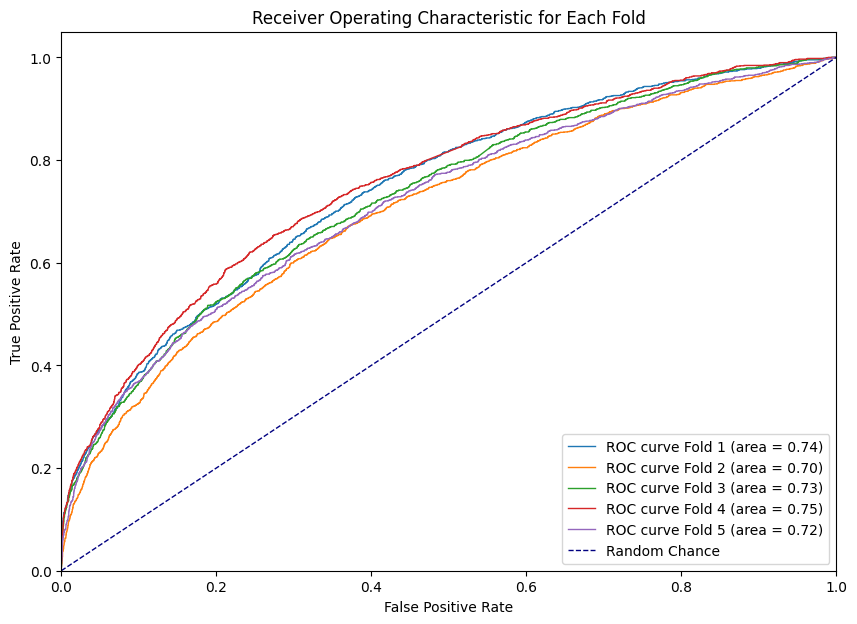

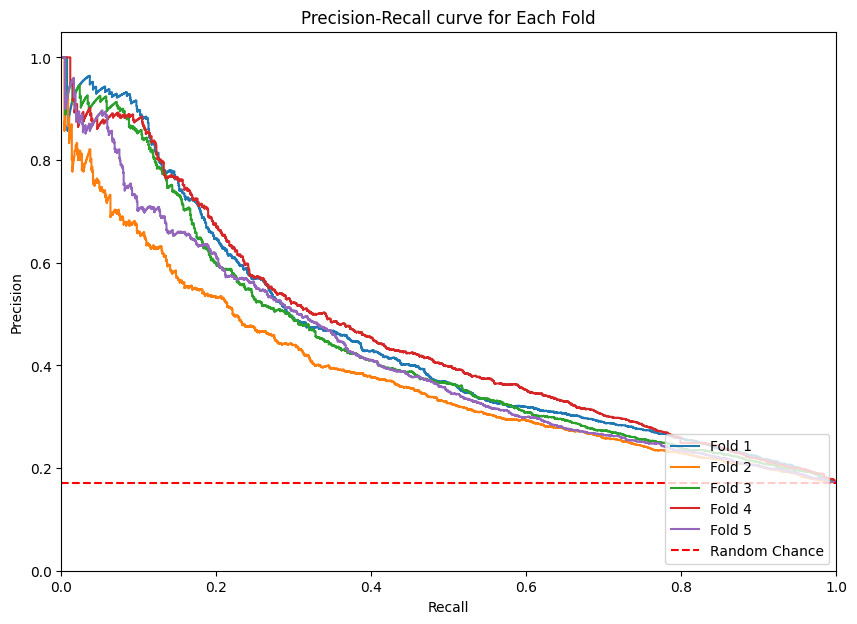

Epoch 1/20
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6697 - auc: 0.6205 - precision: 0.2270 - recall: 0.5632 - f1_metric: 0.3065 - val_loss: 0.6484 - val_auc: 0.7093 - val_precision: 0.2845 - val_recall: 0.6462 - val_f1_metric: 0.3814
Epoch 2/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6416 - auc: 0.6773 - precision: 0.2659 - recall: 0.5901 - f1_metric: 0.3547 - val_loss: 0.6499 - val_auc: 0.7232 - val_precision: 0.2813 - val_recall: 0.6804 - val_f1_metric: 0.3856
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6307 - auc: 0.6927 - precision: 0.2903 - recall: 0.5683 - f1_metric: 0.3712 - val_loss: 0.6075 - val_auc: 0.7349 - val_precision: 0.3799 - val_recall: 0.4741 - val_f1_metric: 0.4040
Epoch 4/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6261 - auc: 0.6985 - precision: 0.2980 - recall: 0.5526 - f1_metric: 0.3713 - val_loss: 0.6671 - val_auc: 0.7384 - val_precision: 0.2845 - val

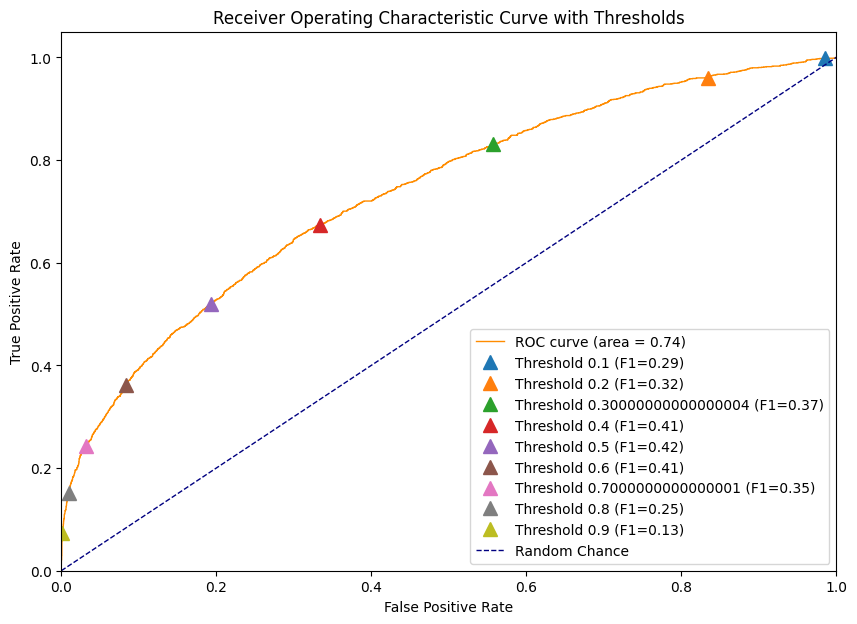

335/335 [==============================] - 0s 1ms/step


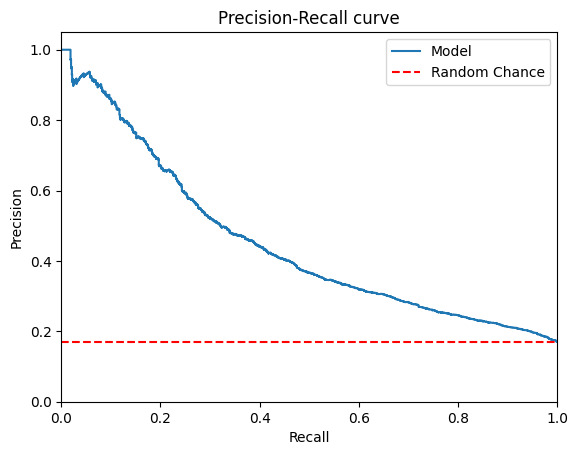

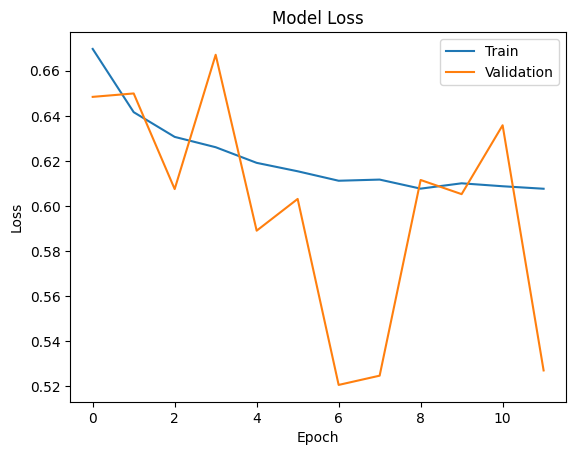

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.12650602409638553
AUC Confidence interval: (0.73, 0.75)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN(df, 'bert_base_embeddings_average')

# Clinical-Longformer Last Hidden State

[I 2023-09-12 09:15:33,627] A new study created in memory with name: no-name-39f51f9c-8593-46d0-94e5-273d9e43f196


268/268 [==============================] - 1s 2ms/step - loss: 0.7539 - auc: 0.7615


[I 2023-09-12 09:16:22,800] Trial 0 finished with value: 0.7615228295326233 and parameters: {'dropout_rate': 0.19840945013160202, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7615228295326233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5740 - auc: 0.7585


[I 2023-09-12 09:16:58,090] Trial 1 finished with value: 0.7584594488143921 and parameters: {'dropout_rate': 0.3614435187799431, 'n_units': 44, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7615228295326233.


268/268 [==============================] - 1s 2ms/step - loss: 0.6054 - auc: 0.7629


[I 2023-09-12 09:17:33,086] Trial 2 finished with value: 0.7628714442253113 and parameters: {'dropout_rate': 0.397731855898086, 'n_units': 37, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7628714442253113.


268/268 [==============================] - 1s 2ms/step - loss: 0.6793 - auc: 0.7625


[I 2023-09-12 09:18:07,195] Trial 3 finished with value: 0.7624742388725281 and parameters: {'dropout_rate': 0.41096162015587545, 'n_units': 115, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7628714442253113.


268/268 [==============================] - 1s 2ms/step - loss: 0.4799 - auc: 0.7669


[I 2023-09-12 09:18:41,061] Trial 4 finished with value: 0.7668735980987549 and parameters: {'dropout_rate': 0.25873661943817505, 'n_units': 76, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7668735980987549.


268/268 [==============================] - 1s 2ms/step - loss: 0.5153 - auc: 0.7697


[I 2023-09-12 09:19:16,301] Trial 5 finished with value: 0.7696545124053955 and parameters: {'dropout_rate': 0.17893941960076765, 'n_units': 85, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.6292 - auc: 0.7597


[I 2023-09-12 09:19:52,031] Trial 6 finished with value: 0.7596872448921204 and parameters: {'dropout_rate': 0.42816778658069754, 'n_units': 125, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.5710 - auc: 0.7654


[I 2023-09-12 09:20:26,378] Trial 7 finished with value: 0.7654222846031189 and parameters: {'dropout_rate': 0.2847227525498415, 'n_units': 64, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.7008 - auc: 0.7627


[I 2023-09-12 09:21:02,015] Trial 8 finished with value: 0.7626537680625916 and parameters: {'dropout_rate': 0.3824574804002452, 'n_units': 91, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.5939 - auc: 0.7666


[I 2023-09-12 09:21:37,385] Trial 9 finished with value: 0.7666282653808594 and parameters: {'dropout_rate': 0.26354720222286265, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.5002 - auc: 0.7684


[I 2023-09-12 09:22:12,139] Trial 10 finished with value: 0.7683635354042053 and parameters: {'dropout_rate': 0.10595083849913482, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.7696545124053955.


268/268 [==============================] - 1s 2ms/step - loss: 0.5443 - auc: 0.7719


[I 2023-09-12 09:22:46,434] Trial 11 finished with value: 0.7718614339828491 and parameters: {'dropout_rate': 0.10739339466570491, 'n_units': 99, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.7718614339828491.


268/268 [==============================] - 1s 2ms/step - loss: 0.5821 - auc: 0.7708


[I 2023-09-12 09:23:20,091] Trial 12 finished with value: 0.7708345055580139 and parameters: {'dropout_rate': 0.10741170352522424, 'n_units': 98, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.7718614339828491.


268/268 [==============================] - 1s 2ms/step - loss: 0.8371 - auc: 0.7556


[I 2023-09-12 09:23:54,071] Trial 13 finished with value: 0.7555989623069763 and parameters: {'dropout_rate': 0.11652191443166349, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.7718614339828491.


268/268 [==============================] - 1s 2ms/step - loss: 0.6522 - auc: 0.7626


[I 2023-09-12 09:24:27,845] Trial 14 finished with value: 0.7626326680183411 and parameters: {'dropout_rate': 0.15169706755798346, 'n_units': 68, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.7718614339828491.


Fold [    7    10    12 ... 42861 42865 42867]
Best AUC: 0.7718614339828491
Best hyperparameters: {'dropout_rate': 0.10739339466570491, 'n_units': 99, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 09:25:00,101] A new study created in memory with name: no-name-681cbe46-0bd2-4286-80b8-153fc655ba42


268/268 [==============================] - 1s 2ms/step - loss: 0.6408 - auc: 0.7584


[I 2023-09-12 09:25:34,321] Trial 0 finished with value: 0.7584002017974854 and parameters: {'dropout_rate': 0.25626585794923284, 'n_units': 43, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7584002017974854.


268/268 [==============================] - 1s 2ms/step - loss: 0.5218 - auc: 0.7629


[I 2023-09-12 09:26:08,242] Trial 1 finished with value: 0.7628825902938843 and parameters: {'dropout_rate': 0.22242424241274117, 'n_units': 53, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.7628825902938843.


268/268 [==============================] - 1s 2ms/step - loss: 0.6453 - auc: 0.7644


[I 2023-09-12 09:26:43,474] Trial 2 finished with value: 0.7644492983818054 and parameters: {'dropout_rate': 0.1145097698830953, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.6965 - auc: 0.7568


[I 2023-09-12 09:27:18,784] Trial 3 finished with value: 0.7568384408950806 and parameters: {'dropout_rate': 0.3465329794629728, 'n_units': 125, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.5812 - auc: 0.7555


[I 2023-09-12 09:27:54,174] Trial 4 finished with value: 0.7555465698242188 and parameters: {'dropout_rate': 0.3753799729243721, 'n_units': 125, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.5572 - auc: 0.7606


[I 2023-09-12 09:28:28,018] Trial 5 finished with value: 0.7605668902397156 and parameters: {'dropout_rate': 0.3056727972735756, 'n_units': 53, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.4991 - auc: 0.7584


[I 2023-09-12 09:29:02,594] Trial 6 finished with value: 0.7583984136581421 and parameters: {'dropout_rate': 0.4134723047821275, 'n_units': 90, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.6620 - auc: 0.7633


[I 2023-09-12 09:29:38,303] Trial 7 finished with value: 0.7632999420166016 and parameters: {'dropout_rate': 0.13805493887990436, 'n_units': 118, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.5807 - auc: 0.7558


[I 2023-09-12 09:30:12,683] Trial 8 finished with value: 0.755794882774353 and parameters: {'dropout_rate': 0.40659700133601495, 'n_units': 102, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7644492983818054.


268/268 [==============================] - 1s 2ms/step - loss: 0.5905 - auc: 0.7645


[I 2023-09-12 09:30:47,307] Trial 9 finished with value: 0.7644672989845276 and parameters: {'dropout_rate': 0.12019933253168356, 'n_units': 123, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.7644672989845276.


268/268 [==============================] - 1s 2ms/step - loss: 0.5688 - auc: 0.7464


[I 2023-09-12 09:31:22,806] Trial 10 finished with value: 0.7464305758476257 and parameters: {'dropout_rate': 0.47810735096192125, 'n_units': 73, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7644672989845276.


268/268 [==============================] - 1s 2ms/step - loss: 0.4754 - auc: 0.7632


[I 2023-09-12 09:31:58,486] Trial 11 finished with value: 0.7632184028625488 and parameters: {'dropout_rate': 0.11557536881656236, 'n_units': 105, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7644672989845276.


268/268 [==============================] - 1s 2ms/step - loss: 0.6260 - auc: 0.7633


[I 2023-09-12 09:32:33,782] Trial 12 finished with value: 0.7632595300674438 and parameters: {'dropout_rate': 0.10156469901741574, 'n_units': 103, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7644672989845276.


268/268 [==============================] - 1s 2ms/step - loss: 0.5124 - auc: 0.7630


[I 2023-09-12 09:33:09,339] Trial 13 finished with value: 0.7630434632301331 and parameters: {'dropout_rate': 0.18010270956638158, 'n_units': 82, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.7644672989845276.


268/268 [==============================] - 1s 2ms/step - loss: 0.4860 - auc: 0.7609


[I 2023-09-12 09:33:43,913] Trial 14 finished with value: 0.7609381079673767 and parameters: {'dropout_rate': 0.17366135575589126, 'n_units': 113, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.7644672989845276.


Fold [    6     8    16 ... 42839 42848 42866]
Best AUC: 0.7644672989845276
Best hyperparameters: {'dropout_rate': 0.12019933253168356, 'n_units': 123, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 09:34:12,504] A new study created in memory with name: no-name-43916af5-7ac6-43aa-8088-9518fd393eba


268/268 [==============================] - 1s 2ms/step - loss: 0.5825 - auc: 0.7494


[I 2023-09-12 09:34:46,868] Trial 0 finished with value: 0.7494186758995056 and parameters: {'dropout_rate': 0.2171526403892321, 'n_units': 34, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7494186758995056.


268/268 [==============================] - 1s 2ms/step - loss: 0.5249 - auc: 0.7469


[I 2023-09-12 09:35:20,991] Trial 1 finished with value: 0.7468675971031189 and parameters: {'dropout_rate': 0.1146805582339554, 'n_units': 115, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7494186758995056.


268/268 [==============================] - 1s 2ms/step - loss: 0.5795 - auc: 0.7479


[I 2023-09-12 09:35:55,514] Trial 2 finished with value: 0.7478542923927307 and parameters: {'dropout_rate': 0.3744971922562491, 'n_units': 90, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7494186758995056.


268/268 [==============================] - 1s 2ms/step - loss: 0.6354 - auc: 0.7532


[I 2023-09-12 09:36:31,239] Trial 3 finished with value: 0.7531870603561401 and parameters: {'dropout_rate': 0.16295771558694772, 'n_units': 117, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5356 - auc: 0.7503


[I 2023-09-12 09:37:06,773] Trial 4 finished with value: 0.7502825260162354 and parameters: {'dropout_rate': 0.2533910844116458, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5673 - auc: 0.7398


[I 2023-09-12 09:37:42,412] Trial 5 finished with value: 0.739754319190979 and parameters: {'dropout_rate': 0.45407047993308725, 'n_units': 59, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.6319 - auc: 0.7490


[I 2023-09-12 09:38:16,412] Trial 6 finished with value: 0.7489864230155945 and parameters: {'dropout_rate': 0.20378740069575213, 'n_units': 41, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5206 - auc: 0.7453


[I 2023-09-12 09:38:51,906] Trial 7 finished with value: 0.7452558279037476 and parameters: {'dropout_rate': 0.3245118955075146, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.4817 - auc: 0.7437


[I 2023-09-12 09:39:25,771] Trial 8 finished with value: 0.7437478303909302 and parameters: {'dropout_rate': 0.41613111862893193, 'n_units': 81, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5808 - auc: 0.7531


[I 2023-09-12 09:40:00,957] Trial 9 finished with value: 0.7530621886253357 and parameters: {'dropout_rate': 0.1372536100323296, 'n_units': 86, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5926 - auc: 0.7502


[I 2023-09-12 09:40:36,098] Trial 10 finished with value: 0.750202476978302 and parameters: {'dropout_rate': 0.29305313667046357, 'n_units': 104, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.7531870603561401.


268/268 [==============================] - 1s 2ms/step - loss: 0.5091 - auc: 0.7556


[I 2023-09-12 09:41:12,430] Trial 11 finished with value: 0.7555505633354187 and parameters: {'dropout_rate': 0.10152073641305226, 'n_units': 99, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7555505633354187.


268/268 [==============================] - 1s 2ms/step - loss: 0.5414 - auc: 0.7532


[I 2023-09-12 09:41:47,715] Trial 12 finished with value: 0.7532451152801514 and parameters: {'dropout_rate': 0.1544609739700108, 'n_units': 105, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7555505633354187.


268/268 [==============================] - 1s 2ms/step - loss: 0.6418 - auc: 0.7494


[I 2023-09-12 09:42:23,017] Trial 13 finished with value: 0.749351441860199 and parameters: {'dropout_rate': 0.11468873531279383, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7555505633354187.


268/268 [==============================] - 1s 2ms/step - loss: 0.5749 - auc: 0.7529


[I 2023-09-12 09:42:58,448] Trial 14 finished with value: 0.7529231309890747 and parameters: {'dropout_rate': 0.1746966630358875, 'n_units': 101, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7555505633354187.


Fold [    3     5    17 ... 42862 42864 42868]
Best AUC: 0.7555505633354187
Best hyperparameters: {'dropout_rate': 0.10152073641305226, 'n_units': 99, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 09:43:31,343] A new study created in memory with name: no-name-47e8e9cc-45b2-404a-bc43-87f4a52300e5


268/268 [==============================] - 1s 2ms/step - loss: 0.6882 - auc: 0.7662


[I 2023-09-12 09:44:05,802] Trial 0 finished with value: 0.7662093043327332 and parameters: {'dropout_rate': 0.23581275925560605, 'n_units': 74, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.7662093043327332.


268/268 [==============================] - 1s 2ms/step - loss: 0.5512 - auc: 0.7630


[I 2023-09-12 09:44:39,691] Trial 1 finished with value: 0.7630224823951721 and parameters: {'dropout_rate': 0.4392947457151474, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7662093043327332.


268/268 [==============================] - 1s 2ms/step - loss: 0.5849 - auc: 0.7611


[I 2023-09-12 09:45:13,489] Trial 2 finished with value: 0.7610775232315063 and parameters: {'dropout_rate': 0.45490846599689283, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7662093043327332.


268/268 [==============================] - 1s 2ms/step - loss: 0.7108 - auc: 0.7647


[I 2023-09-12 09:45:48,299] Trial 3 finished with value: 0.76470947265625 and parameters: {'dropout_rate': 0.34937060034958917, 'n_units': 32, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7662093043327332.


268/268 [==============================] - 1s 2ms/step - loss: 0.5799 - auc: 0.7672


[I 2023-09-12 09:46:22,782] Trial 4 finished with value: 0.7671565413475037 and parameters: {'dropout_rate': 0.33885504274934536, 'n_units': 66, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7671565413475037.


268/268 [==============================] - 1s 2ms/step - loss: 0.6075 - auc: 0.7630


[I 2023-09-12 09:46:58,040] Trial 5 finished with value: 0.7630045413970947 and parameters: {'dropout_rate': 0.37630977802577226, 'n_units': 35, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7671565413475037.


268/268 [==============================] - 1s 2ms/step - loss: 0.5180 - auc: 0.7605


[I 2023-09-12 09:47:33,604] Trial 6 finished with value: 0.7604663968086243 and parameters: {'dropout_rate': 0.4522527776943742, 'n_units': 84, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7671565413475037.


268/268 [==============================] - 1s 2ms/step - loss: 0.5797 - auc: 0.7651


[I 2023-09-12 09:48:08,860] Trial 7 finished with value: 0.7651139497756958 and parameters: {'dropout_rate': 0.4542870044216626, 'n_units': 108, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7671565413475037.


268/268 [==============================] - 1s 2ms/step - loss: 0.5073 - auc: 0.7690


[I 2023-09-12 09:48:43,900] Trial 8 finished with value: 0.7689796686172485 and parameters: {'dropout_rate': 0.20581225555294091, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7689796686172485.


268/268 [==============================] - 1s 2ms/step - loss: 0.5898 - auc: 0.7648


[I 2023-09-12 09:49:20,358] Trial 9 finished with value: 0.7648099660873413 and parameters: {'dropout_rate': 0.4240514822040019, 'n_units': 76, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7689796686172485.


268/268 [==============================] - 1s 2ms/step - loss: 0.6819 - auc: 0.7723


[I 2023-09-12 09:49:59,724] Trial 10 finished with value: 0.7722739577293396 and parameters: {'dropout_rate': 0.1138721589175226, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.7722739577293396.


268/268 [==============================] - 1s 2ms/step - loss: 0.5703 - auc: 0.7727


[I 2023-09-12 09:50:38,025] Trial 11 finished with value: 0.7727398872375488 and parameters: {'dropout_rate': 0.10518026239221213, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7727398872375488.


268/268 [==============================] - 1s 2ms/step - loss: 0.4652 - auc: 0.7699


[I 2023-09-12 09:51:15,194] Trial 12 finished with value: 0.7698989510536194 and parameters: {'dropout_rate': 0.11551644988672663, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7727398872375488.


268/268 [==============================] - 1s 2ms/step - loss: 0.5684 - auc: 0.7722


[I 2023-09-12 09:51:50,397] Trial 13 finished with value: 0.7722033262252808 and parameters: {'dropout_rate': 0.1160033403677031, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7727398872375488.


268/268 [==============================] - 1s 2ms/step - loss: 0.4715 - auc: 0.7709


[I 2023-09-12 09:52:26,072] Trial 14 finished with value: 0.7709202766418457 and parameters: {'dropout_rate': 0.10069800317260488, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.7727398872375488.


Fold [    1    11    15 ... 42852 42856 42863]
Best AUC: 0.7727398872375488
Best hyperparameters: {'dropout_rate': 0.10518026239221213, 'n_units': 128, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 09:53:03,341] A new study created in memory with name: no-name-21122b86-8e66-43e9-96cd-ca01ac473218


268/268 [==============================] - 1s 2ms/step - loss: 0.5606 - auc: 0.7580


[I 2023-09-12 09:53:37,667] Trial 0 finished with value: 0.7579916715621948 and parameters: {'dropout_rate': 0.17708208249194876, 'n_units': 67, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7579916715621948.


268/268 [==============================] - 1s 2ms/step - loss: 0.6171 - auc: 0.7549


[I 2023-09-12 09:54:11,313] Trial 1 finished with value: 0.7549290657043457 and parameters: {'dropout_rate': 0.3409975275448418, 'n_units': 113, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7579916715621948.


268/268 [==============================] - 1s 2ms/step - loss: 0.5468 - auc: 0.7552


[I 2023-09-12 09:54:45,371] Trial 2 finished with value: 0.7551969885826111 and parameters: {'dropout_rate': 0.39181696506737407, 'n_units': 79, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7579916715621948.


268/268 [==============================] - 1s 2ms/step - loss: 0.7486 - auc: 0.7532


[I 2023-09-12 09:55:19,559] Trial 3 finished with value: 0.7531651258468628 and parameters: {'dropout_rate': 0.18803726737809115, 'n_units': 49, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.7579916715621948.


268/268 [==============================] - 1s 2ms/step - loss: 0.5064 - auc: 0.7581


[I 2023-09-12 09:55:53,709] Trial 4 finished with value: 0.7580995559692383 and parameters: {'dropout_rate': 0.23976932800988898, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.7580995559692383.


268/268 [==============================] - 1s 2ms/step - loss: 0.5756 - auc: 0.7518


[I 2023-09-12 09:56:29,424] Trial 5 finished with value: 0.7517987489700317 and parameters: {'dropout_rate': 0.3830347363240808, 'n_units': 116, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.7580995559692383.


268/268 [==============================] - 1s 2ms/step - loss: 0.6503 - auc: 0.7584


[I 2023-09-12 09:57:03,186] Trial 6 finished with value: 0.7583511471748352 and parameters: {'dropout_rate': 0.18931976566879682, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.7583511471748352.


268/268 [==============================] - 1s 2ms/step - loss: 0.5215 - auc: 0.7594


[I 2023-09-12 09:57:37,293] Trial 7 finished with value: 0.7593938112258911 and parameters: {'dropout_rate': 0.235546272627408, 'n_units': 44, 'optimizer': 'RMSprop'}. Best is trial 7 with value: 0.7593938112258911.


268/268 [==============================] - 1s 2ms/step - loss: 0.5099 - auc: 0.7608


[I 2023-09-12 09:58:12,710] Trial 8 finished with value: 0.7608343362808228 and parameters: {'dropout_rate': 0.17816372473531714, 'n_units': 126, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.6866 - auc: 0.7494


[I 2023-09-12 09:58:47,986] Trial 9 finished with value: 0.7493900060653687 and parameters: {'dropout_rate': 0.1345598237492486, 'n_units': 53, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.5897 - auc: 0.7511


[I 2023-09-12 09:59:23,610] Trial 10 finished with value: 0.7510806322097778 and parameters: {'dropout_rate': 0.4876125851971318, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.5170 - auc: 0.7595


[I 2023-09-12 09:59:59,353] Trial 11 finished with value: 0.7594500184059143 and parameters: {'dropout_rate': 0.10526672123154143, 'n_units': 93, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.6415 - auc: 0.7586


[I 2023-09-12 10:00:35,035] Trial 12 finished with value: 0.7585607171058655 and parameters: {'dropout_rate': 0.10137500486340617, 'n_units': 96, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.4751 - auc: 0.7599


[I 2023-09-12 10:01:10,829] Trial 13 finished with value: 0.7598833441734314 and parameters: {'dropout_rate': 0.1027808323761074, 'n_units': 90, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


268/268 [==============================] - 1s 2ms/step - loss: 0.5696 - auc: 0.7586


[I 2023-09-12 10:01:47,114] Trial 14 finished with value: 0.7586339116096497 and parameters: {'dropout_rate': 0.14872700573222636, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7608343362808228.


Fold [    0     2     4 ... 42835 42840 42854]
Best AUC: 0.7608343362808228
Best hyperparameters: {'dropout_rate': 0.17816372473531714, 'n_units': 126, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


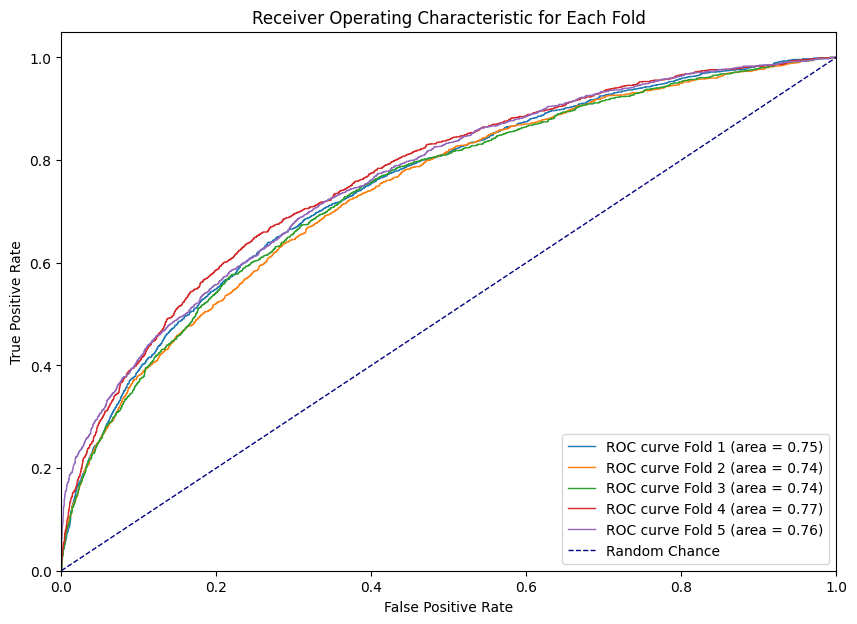

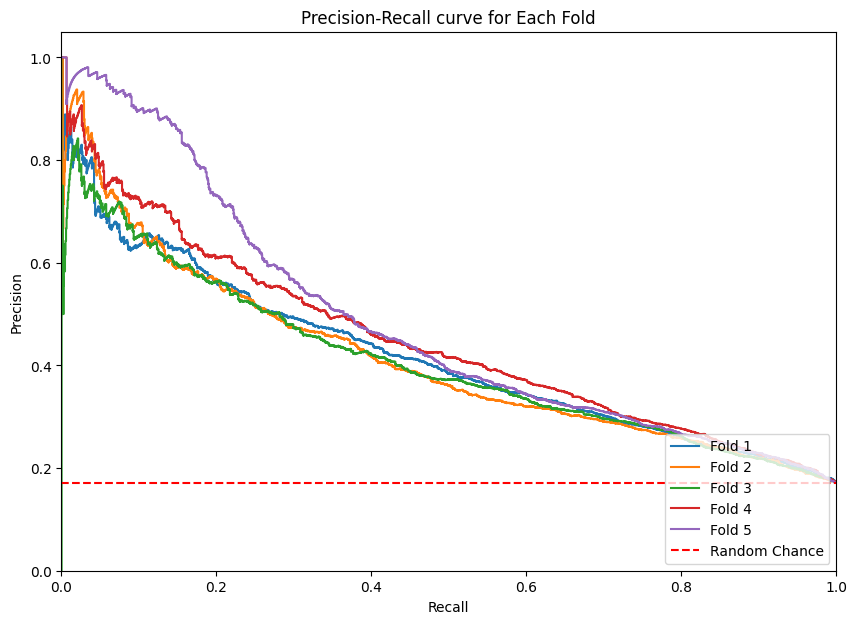

Epoch 1/20
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6535 - auc: 0.6560 - precision: 0.2485 - recall: 0.5861 - f1_metric: 0.3306 - val_loss: 0.7031 - val_auc: 0.7392 - val_precision: 0.2646 - val_recall: 0.7883 - val_f1_metric: 0.3831
Epoch 2/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6204 - auc: 0.7123 - precision: 0.2887 - recall: 0.6253 - f1_metric: 0.3835 - val_loss: 0.6264 - val_auc: 0.7522 - val_precision: 0.3110 - val_recall: 0.6954 - val_f1_metric: 0.4143
Epoch 3/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6084 - auc: 0.7287 - precision: 0.3044 - recall: 0.6306 - f1_metric: 0.3970 - val_loss: 0.5936 - val_auc: 0.7641 - val_precision: 0.3478 - val_recall: 0.6595 - val_f1_metric: 0.4378
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6008 - auc: 0.7368 - precision: 0.3129 - recall: 0.6363 - f1_metric: 0.4065 - val_loss: 0.5993 - val_auc: 0.7673 - val_precision: 0.3189 - val

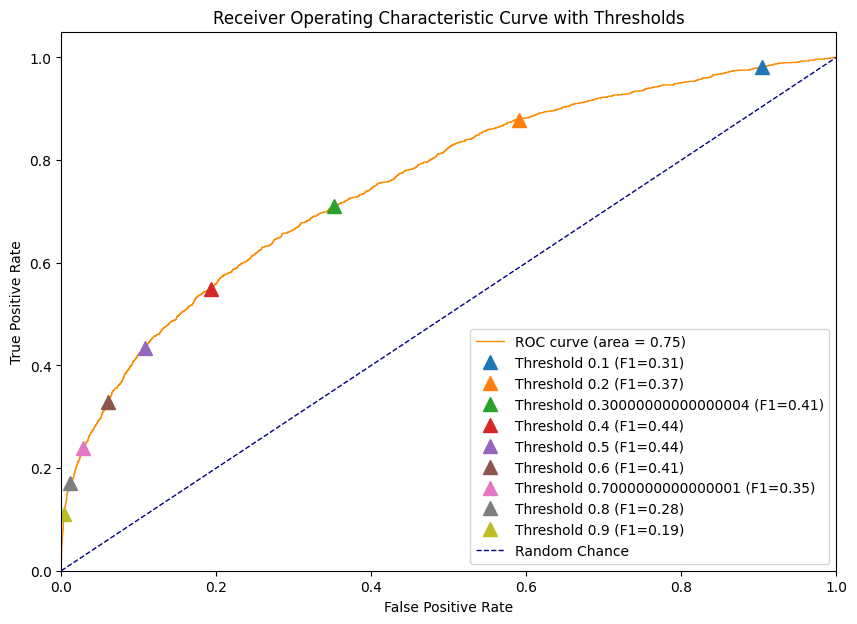

335/335 [==============================] - 0s 1ms/step


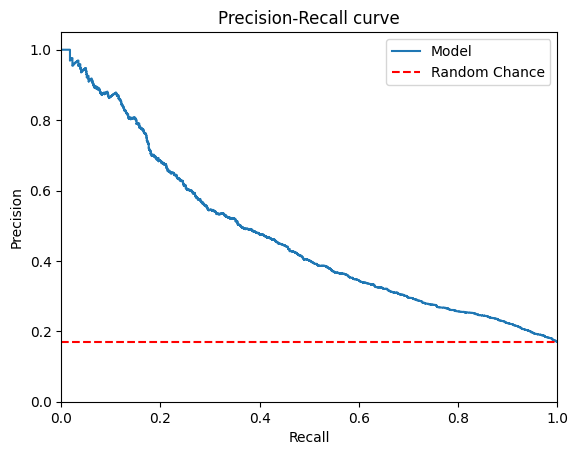

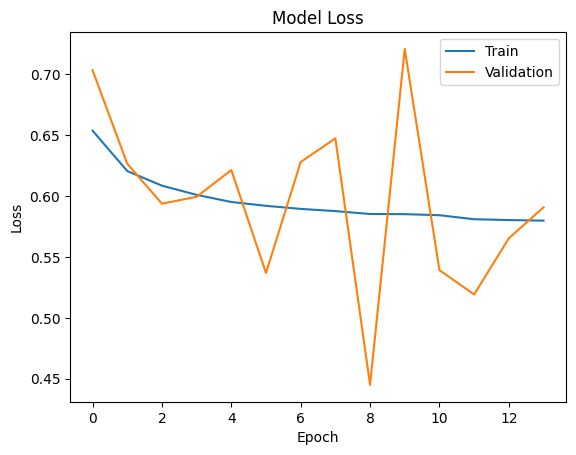

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.1511500547645126
AUC Confidence interval: (0.74, 0.76)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN(df, 'longformer_embeddings')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/gdrive/MyDrive/Dissertation/Models/gatortron_base_embeddings_average.h5', custom_objects={'f1_metric': f1_metric})

# FFNN F1 Target

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, make_scorer

import optuna

def bootstrap_auc(y_true, y_pred, n_bootstraps=1000, rng_seed=42):
    n = len(y_true)
    rng = np.random.RandomState(rng_seed)
    bootstrapped_aucs = []

    for i in range(n_bootstraps):
        indices = rng.randint(0, n, n)
        sample_true = y_true[indices]
        sample_pred = y_pred[indices]

        if len(np.unique(sample_true)) == 2:
            fpr, tpr, _ = roc_curve(sample_true, sample_pred)
            roc_auc = auc(fpr, tpr)
            bootstrapped_aucs.append(roc_auc)

    sorted_aucs = np.array(bootstrapped_aucs)
    sorted_aucs.sort()

    lower = np.percentile(sorted_aucs, 5)
    upper = np.percentile(sorted_aucs, 95)

    return lower, upper

from sklearn.metrics import make_scorer

def bootstrap_metric(y_true, y_pred, metric_func, n_bootstraps=1000, rng_seed=42):
    n = len(y_true)
    rng = np.random.RandomState(rng_seed)
    bootstrapped_scores = []

    for i in range(n_bootstraps):
        indices = rng.randint(0, n, n)
        sample_true = y_true[indices]
        sample_pred = y_pred[indices]

        if len(np.unique(sample_true)) == 2:
            score = metric_func(sample_true, sample_pred)
            bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    lower = np.percentile(sorted_scores, 5)
    upper = np.percentile(sorted_scores, 95)

    return lower, upper

def objective(trial, X_train, y_train, X_val, y_val):
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    n_units = trial.suggest_int('n_units', 32, 128)
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_units // 2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[f1_metric])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    loss, f1 = model.evaluate(X_val, y_val)
    return f1

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

def run_FFNN_f1(df, column):
    #Convert list of embeddings into a 2D numpy array
    embedding_matrix = np.stack(df[column].values)

    # Combine features
    #X = np.hstack([embedding_matrix, df_features.to_numpy()])

    #X = df_features.to_numpy()
    X = np.hstack([embedding_matrix])

    y = df['readmitted_next'].values

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    positive_class_ratio = np.sum(y_test) / len(y_test)

    # Initialize lists to store ROC and PR curves for each fold
    tprs, fprs, rocs = [], [], []
    precisions, recalls = [], []

    n_splits = 5  # Number of K-fold Splits
    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    # Initialize lists to store metrics for each fold
    tprs, fprs, rocs = [], [], []
    precisions, recalls = [], []
    best_params_overall = None  # Store the best hyperparameters over all folds
    best_value_overall = -1.0   # Store the best value over all folds

    for train_index, val_index in skf.split(X_temp, y_temp):
        # Split data into k-folds
        X_train_fold, X_val_fold = X_temp[train_index], X_temp[val_index]
        y_train_fold, y_val_fold = y_temp[train_index], y_temp[val_index]

        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, X_train_fold, y_train_fold, X_val_fold, y_val_fold), n_trials=15)

        trial = study.best_trial
        if trial.value > best_value_overall:
          best_value_overall = trial.value
          best_params_overall = study.best_params

        print(f"Fold {val_index}")
        print(f"Best f1_metric: {trial.value}")
        print("Best hyperparameters: {}".format(trial.params))

        # Fetch best hyperparameters from the study
        best_params = study.best_params
        best_dropout_rate = best_params['dropout_rate']
        best_n_units = best_params['n_units']
        best_optimizer = best_params['optimizer']

        # Build the best model based on Optuna optimization
        model = Sequential()
        model.add(Dense(best_n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(best_n_units // 2, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_metric])

        class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train_fold)
        class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the best model
        history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), class_weight=class_weights_dict, callbacks=[early_stopping], verbose=0)

        # Getting the predictions from the model
        y_pred_val_fold = model.predict(X_val_fold).ravel()

        # Compute and store ROC curve and AUC for this fold
        fpr, tpr, _ = roc_curve(y_val_fold, y_pred_val_fold)
        roc_auc = auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        rocs.append(roc_auc)

        # Compute and store Precision-Recall curve for this fold
        precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_val_fold)
        precisions.append(precision)
        recalls.append(recall)

    # Plotting ROC curves for each fold
    plt.figure(figsize=(10, 7))
    for i in range(n_splits):
        plt.plot(fprs[i], tprs[i], lw=1, label=f'ROC curve Fold {i+1} (area = {rocs[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Each Fold')
    plt.legend(loc='lower right')
    plt.show()

    # Plotting PR curves for each fold
    plt.figure(figsize=(10, 7))
    for i in range(n_splits):
        plt.step(recalls[i], precisions[i], where='post', label=f'Fold {i+1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axhline(y=positive_class_ratio, color='r', linestyle='--', label='Random Chance')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for Each Fold')
    plt.legend(loc='lower right')
    plt.show()


    best_dropout_rate = best_params_overall['dropout_rate']
    best_n_units = best_params_overall['n_units']
    best_optimizer = best_params_overall['optimizer']

    # Build the best model based on Optuna optimization
    model = Sequential()
    model.add(Dense(best_n_units, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'))
    model.add(Dropout(best_dropout_rate))
    model.add(Dense(best_n_units // 2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(best_dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_metric])

    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the best model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights_dict, callbacks=[early_stopping], verbose=1)
    # Evaluate the model
    metrics = model.evaluate(X_test, y_test)

    print(f"Test Loss: {metrics[0]}")
    print(f"Test AUC: {metrics[1]}")
    print(f"Test Precision: {metrics[2]}")
    print(f"Test Recall: {metrics[3]}")
    print(f"Test F1: {metrics[4]}")

    # Getting the predictions from the model
    y_pred_test = model.predict(X_test).ravel()

    # ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

    # Choose thresholds for F1 Score
    thresholds = np.arange(0.1, 1.0, 0.1)
    best_f1 = 0
    best_threshold = 0

    # Annotate some thresholds on the ROC curve
    for threshold in thresholds:
        y_pred_label = (y_pred_test > threshold).astype(int)
        current_f1 = f1_score(y_test, y_pred_label)
        print(f"Threshold: {threshold}, F1 Score: {current_f1}")

        # Find the point on the ROC curve for this threshold
        closest_point = np.argmin(np.abs(roc_thresholds - threshold))
        plt.plot(fpr[closest_point], tpr[closest_point], '^', markersize=10, label=f"Threshold {threshold} (F1={current_f1:.2f})")

        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Chance')
    plt.title('Receiver Operating Characteristic Curve with Thresholds')
    plt.legend(loc="lower right")
    plt.show()

    # Get model predictions
    y_pred = model.predict(X_test)

    # Flatten y_pred and y_test if they are not already flat
    y_pred = np.ravel(y_pred)
    y_test = np.ravel(y_test)

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plotting
    plt.figure()
    plt.step(recall, precision, where='post', label='Model')
    plt.axhline(y=positive_class_ratio, color='r', linestyle='--', label='Random Chance')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend()
    plt.show()

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # y_true: True binary labels (0 or 1)
    # y_scores: Confidence scores from your model
    y_scores = model.predict(X_test).ravel()
    y_true = y_test

    # Compute precision-recall pairs
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    # Find the closest precision to 0.8
    idx = np.argmin(np.abs(precision - 0.8))

    # Corresponding recall
    recall_at_precision_80 = recall[idx]

    print(f"Recall at a precision of 80% is: {recall_at_precision_80}")

    lower_auc, upper_auc = bootstrap_auc(y_test, y_pred_test)
    print(f"AUC Confidence interval: ({lower_auc:.2f}, {upper_auc:.2f})")

    save_dir = f"/content/gdrive/MyDrive/Dissertation/Models/{column}_f1_model.h5"
    model.save(save_dir)


2.13.0


ModuleNotFoundError: ignored

[I 2023-09-12 11:20:05,305] A new study created in memory with name: no-name-47250981-e274-411a-b42d-502255fb53cf


268/268 [==============================] - 1s 2ms/step - loss: 0.5858 - f1_metric: 0.4293


[I 2023-09-12 11:20:39,169] Trial 0 finished with value: 0.4292793571949005 and parameters: {'dropout_rate': 0.17005023533859814, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4292793571949005.


268/268 [==============================] - 1s 2ms/step - loss: 0.6950 - f1_metric: 0.2869


[I 2023-09-12 11:21:14,195] Trial 1 finished with value: 0.28688475489616394 and parameters: {'dropout_rate': 0.4697667502449384, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4292793571949005.


268/268 [==============================] - 1s 2ms/step - loss: 0.5919 - f1_metric: 0.4237


[I 2023-09-12 11:21:50,212] Trial 2 finished with value: 0.42366260290145874 and parameters: {'dropout_rate': 0.4304369294361984, 'n_units': 66, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4292793571949005.


268/268 [==============================] - 1s 2ms/step - loss: 0.5773 - f1_metric: 0.4445


[I 2023-09-12 11:22:25,976] Trial 3 finished with value: 0.44448769092559814 and parameters: {'dropout_rate': 0.4041515535148219, 'n_units': 46, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.44448769092559814.


268/268 [==============================] - 1s 2ms/step - loss: 0.5477 - f1_metric: 0.4283


[I 2023-09-12 11:22:59,736] Trial 4 finished with value: 0.4282565712928772 and parameters: {'dropout_rate': 0.29336989682854153, 'n_units': 95, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.44448769092559814.


268/268 [==============================] - 1s 2ms/step - loss: 0.5776 - f1_metric: 0.4277


[I 2023-09-12 11:23:33,885] Trial 5 finished with value: 0.4277133643627167 and parameters: {'dropout_rate': 0.16136696648023513, 'n_units': 114, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.44448769092559814.


268/268 [==============================] - 1s 2ms/step - loss: 0.4963 - f1_metric: 0.4364


[I 2023-09-12 11:24:08,544] Trial 6 finished with value: 0.4363933801651001 and parameters: {'dropout_rate': 0.23986312993076642, 'n_units': 59, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.44448769092559814.


268/268 [==============================] - 1s 2ms/step - loss: 0.6181 - f1_metric: 0.4289


[I 2023-09-12 11:24:43,651] Trial 7 finished with value: 0.4289490282535553 and parameters: {'dropout_rate': 0.48300052340374566, 'n_units': 117, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.44448769092559814.


268/268 [==============================] - 1s 2ms/step - loss: 0.4677 - f1_metric: 0.4513


[I 2023-09-12 11:25:17,260] Trial 8 finished with value: 0.4513167440891266 and parameters: {'dropout_rate': 0.21244838187815396, 'n_units': 117, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.5819 - f1_metric: 0.4334


[I 2023-09-12 11:25:51,547] Trial 9 finished with value: 0.4334145486354828 and parameters: {'dropout_rate': 0.4969233448170953, 'n_units': 87, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.5068 - f1_metric: 0.4450


[I 2023-09-12 11:26:25,052] Trial 10 finished with value: 0.44499778747558594 and parameters: {'dropout_rate': 0.11513747108985606, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.5325 - f1_metric: 0.4420


[I 2023-09-12 11:26:58,009] Trial 11 finished with value: 0.4420262575149536 and parameters: {'dropout_rate': 0.10620659367872214, 'n_units': 127, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.6493 - f1_metric: 0.4022


[I 2023-09-12 11:27:31,384] Trial 12 finished with value: 0.4021594524383545 and parameters: {'dropout_rate': 0.20555637676081623, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.5131 - f1_metric: 0.4457


[I 2023-09-12 11:28:04,475] Trial 13 finished with value: 0.44573214650154114 and parameters: {'dropout_rate': 0.1128073161399236, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


268/268 [==============================] - 1s 2ms/step - loss: 0.6819 - f1_metric: 0.3814


[I 2023-09-12 11:28:37,615] Trial 14 finished with value: 0.38141271471977234 and parameters: {'dropout_rate': 0.24431804367692192, 'n_units': 32, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.4513167440891266.


Fold [    7    10    12 ... 42861 42865 42867]
Best f1_metric: 0.4513167440891266
Best hyperparameters: {'dropout_rate': 0.21244838187815396, 'n_units': 117, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 11:29:10,280] A new study created in memory with name: no-name-d52dbed6-917a-4df8-9f23-8f8e9db579e4


268/268 [==============================] - 1s 2ms/step - loss: 0.6146 - f1_metric: 0.4112


[I 2023-09-12 11:29:43,965] Trial 0 finished with value: 0.4112201929092407 and parameters: {'dropout_rate': 0.4857331071480381, 'n_units': 80, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4112201929092407.


268/268 [==============================] - 1s 2ms/step - loss: 0.5075 - f1_metric: 0.4445


[I 2023-09-12 11:30:17,697] Trial 1 finished with value: 0.44452181458473206 and parameters: {'dropout_rate': 0.16970123379336055, 'n_units': 126, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44452181458473206.


268/268 [==============================] - 1s 2ms/step - loss: 0.6359 - f1_metric: 0.3972


[I 2023-09-12 11:30:50,883] Trial 2 finished with value: 0.3971901535987854 and parameters: {'dropout_rate': 0.20699076969473948, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44452181458473206.


268/268 [==============================] - 1s 2ms/step - loss: 0.4789 - f1_metric: 0.4458


[I 2023-09-12 11:31:24,356] Trial 3 finished with value: 0.4457594156265259 and parameters: {'dropout_rate': 0.21758546100096487, 'n_units': 82, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5355 - f1_metric: 0.4435


[I 2023-09-12 11:31:58,934] Trial 4 finished with value: 0.4435301423072815 and parameters: {'dropout_rate': 0.2711515651358023, 'n_units': 116, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5594 - f1_metric: 0.4406


[I 2023-09-12 11:32:34,673] Trial 5 finished with value: 0.4405677318572998 and parameters: {'dropout_rate': 0.23979712629332017, 'n_units': 124, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.6226 - f1_metric: 0.4229


[I 2023-09-12 11:33:09,651] Trial 6 finished with value: 0.42292043566703796 and parameters: {'dropout_rate': 0.34889819791051235, 'n_units': 36, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5511 - f1_metric: 0.4334


[I 2023-09-12 11:33:44,913] Trial 7 finished with value: 0.4334093928337097 and parameters: {'dropout_rate': 0.25563579768032285, 'n_units': 103, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5272 - f1_metric: 0.4391


[I 2023-09-12 11:34:19,303] Trial 8 finished with value: 0.4391193091869354 and parameters: {'dropout_rate': 0.19203688498850335, 'n_units': 99, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5247 - f1_metric: 0.4304


[I 2023-09-12 11:34:53,956] Trial 9 finished with value: 0.4304355978965759 and parameters: {'dropout_rate': 0.4522007466894845, 'n_units': 81, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5661 - f1_metric: 0.4347


[I 2023-09-12 11:35:28,296] Trial 10 finished with value: 0.434700071811676 and parameters: {'dropout_rate': 0.11321771867406133, 'n_units': 52, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5515 - f1_metric: 0.4428


[I 2023-09-12 11:36:02,184] Trial 11 finished with value: 0.442806214094162 and parameters: {'dropout_rate': 0.12241249027295467, 'n_units': 63, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5390 - f1_metric: 0.4327


[I 2023-09-12 11:36:35,993] Trial 12 finished with value: 0.4326501488685608 and parameters: {'dropout_rate': 0.1758408650671053, 'n_units': 64, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.6984 - f1_metric: 0.3738


[I 2023-09-12 11:37:09,564] Trial 13 finished with value: 0.37383216619491577 and parameters: {'dropout_rate': 0.32794435069233724, 'n_units': 109, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


268/268 [==============================] - 1s 2ms/step - loss: 0.5916 - f1_metric: 0.4299


[I 2023-09-12 11:37:42,326] Trial 14 finished with value: 0.4298509657382965 and parameters: {'dropout_rate': 0.1577669594029453, 'n_units': 32, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4457594156265259.


Fold [    6     8    16 ... 42839 42848 42866]
Best f1_metric: 0.4457594156265259
Best hyperparameters: {'dropout_rate': 0.21758546100096487, 'n_units': 82, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 11:38:07,358] A new study created in memory with name: no-name-e8442180-a6c4-4a2e-80c9-be3986184a17


268/268 [==============================] - 1s 2ms/step - loss: 0.6675 - f1_metric: 0.3980


[I 2023-09-12 11:38:41,708] Trial 0 finished with value: 0.39803460240364075 and parameters: {'dropout_rate': 0.14331677546806781, 'n_units': 63, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.39803460240364075.


268/268 [==============================] - 1s 2ms/step - loss: 0.5125 - f1_metric: 0.4305


[I 2023-09-12 11:39:15,722] Trial 1 finished with value: 0.4305015802383423 and parameters: {'dropout_rate': 0.14110017425092403, 'n_units': 37, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5251 - f1_metric: 0.4178


[I 2023-09-12 11:39:48,940] Trial 2 finished with value: 0.4178418815135956 and parameters: {'dropout_rate': 0.40992767198009383, 'n_units': 49, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.6846 - f1_metric: 0.3487


[I 2023-09-12 11:40:21,742] Trial 3 finished with value: 0.34871190786361694 and parameters: {'dropout_rate': 0.26109543747805464, 'n_units': 126, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5039 - f1_metric: 0.4289


[I 2023-09-12 11:40:55,761] Trial 4 finished with value: 0.42890140414237976 and parameters: {'dropout_rate': 0.1777217078534771, 'n_units': 112, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.4542 - f1_metric: 0.4162


[I 2023-09-12 11:41:28,590] Trial 5 finished with value: 0.41615766286849976 and parameters: {'dropout_rate': 0.2495280967815584, 'n_units': 122, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5995 - f1_metric: 0.4174


[I 2023-09-12 11:42:01,240] Trial 6 finished with value: 0.4174186885356903 and parameters: {'dropout_rate': 0.20201130666180062, 'n_units': 57, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5624 - f1_metric: 0.4190


[I 2023-09-12 11:42:34,478] Trial 7 finished with value: 0.418992817401886 and parameters: {'dropout_rate': 0.405226699386822, 'n_units': 112, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.6691 - f1_metric: 0.3797


[I 2023-09-12 11:43:07,574] Trial 8 finished with value: 0.3796844780445099 and parameters: {'dropout_rate': 0.4997732695807663, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.6833 - f1_metric: 0.3788


[I 2023-09-12 11:43:42,161] Trial 9 finished with value: 0.3788071572780609 and parameters: {'dropout_rate': 0.46327227300970375, 'n_units': 46, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.6478 - f1_metric: 0.4070


[I 2023-09-12 11:44:16,093] Trial 10 finished with value: 0.4069852828979492 and parameters: {'dropout_rate': 0.1132718114603185, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5793 - f1_metric: 0.4288


[I 2023-09-12 11:44:50,855] Trial 11 finished with value: 0.4287748336791992 and parameters: {'dropout_rate': 0.16665124603123205, 'n_units': 93, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.6537 - f1_metric: 0.4009


[I 2023-09-12 11:45:27,205] Trial 12 finished with value: 0.40089988708496094 and parameters: {'dropout_rate': 0.10700417912965156, 'n_units': 87, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5674 - f1_metric: 0.4186


[I 2023-09-12 11:46:02,463] Trial 13 finished with value: 0.4185738265514374 and parameters: {'dropout_rate': 0.19021817634700006, 'n_units': 101, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


268/268 [==============================] - 1s 2ms/step - loss: 0.5287 - f1_metric: 0.4285


[I 2023-09-12 11:46:37,925] Trial 14 finished with value: 0.4284968376159668 and parameters: {'dropout_rate': 0.22020725176965572, 'n_units': 69, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4305015802383423.


Fold [    3     5    17 ... 42862 42864 42868]
Best f1_metric: 0.4305015802383423
Best hyperparameters: {'dropout_rate': 0.14110017425092403, 'n_units': 37, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 11:47:15,919] A new study created in memory with name: no-name-ba2ccf1d-09b1-46ba-bfaa-e888d0b46935


268/268 [==============================] - 1s 2ms/step - loss: 0.4044 - f1_metric: 0.4121


[I 2023-09-12 11:47:50,014] Trial 0 finished with value: 0.4121447503566742 and parameters: {'dropout_rate': 0.16346955270428945, 'n_units': 119, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4121447503566742.


268/268 [==============================] - 1s 2ms/step - loss: 0.5674 - f1_metric: 0.4275


[I 2023-09-12 11:48:23,403] Trial 1 finished with value: 0.42749056220054626 and parameters: {'dropout_rate': 0.3291245723480323, 'n_units': 83, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.42749056220054626.


268/268 [==============================] - 1s 2ms/step - loss: 0.4929 - f1_metric: 0.4452


[I 2023-09-12 11:48:57,365] Trial 2 finished with value: 0.44517579674720764 and parameters: {'dropout_rate': 0.1542897076488705, 'n_units': 118, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6103 - f1_metric: 0.4175


[I 2023-09-12 11:49:32,707] Trial 3 finished with value: 0.41746625304222107 and parameters: {'dropout_rate': 0.4766461711287152, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6571 - f1_metric: 0.3949


[I 2023-09-12 11:50:07,097] Trial 4 finished with value: 0.3948880434036255 and parameters: {'dropout_rate': 0.16881331088395868, 'n_units': 109, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6063 - f1_metric: 0.4109


[I 2023-09-12 11:50:41,467] Trial 5 finished with value: 0.4109233021736145 and parameters: {'dropout_rate': 0.3647047713899405, 'n_units': 72, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6185 - f1_metric: 0.4303


[I 2023-09-12 11:51:16,462] Trial 6 finished with value: 0.43032076954841614 and parameters: {'dropout_rate': 0.3742700910226141, 'n_units': 113, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.5994 - f1_metric: 0.4128


[I 2023-09-12 11:51:50,553] Trial 7 finished with value: 0.4127538502216339 and parameters: {'dropout_rate': 0.43883235180710267, 'n_units': 73, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.5777 - f1_metric: 0.4410


[I 2023-09-12 11:52:25,310] Trial 8 finished with value: 0.4410431683063507 and parameters: {'dropout_rate': 0.2659092290620161, 'n_units': 53, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.5027 - f1_metric: 0.4433


[I 2023-09-12 11:52:59,078] Trial 9 finished with value: 0.44332894682884216 and parameters: {'dropout_rate': 0.29138454179979145, 'n_units': 38, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6014 - f1_metric: 0.4174


[I 2023-09-12 11:53:33,799] Trial 10 finished with value: 0.41740161180496216 and parameters: {'dropout_rate': 0.12064910172822449, 'n_units': 93, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6594 - f1_metric: 0.3858


[I 2023-09-12 11:54:07,436] Trial 11 finished with value: 0.3857593238353729 and parameters: {'dropout_rate': 0.24797168087509414, 'n_units': 33, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.4480 - f1_metric: 0.4321


[I 2023-09-12 11:54:41,014] Trial 12 finished with value: 0.4321226477622986 and parameters: {'dropout_rate': 0.2326079354741501, 'n_units': 34, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.5895 - f1_metric: 0.4160


[I 2023-09-12 11:55:14,550] Trial 13 finished with value: 0.415961891412735 and parameters: {'dropout_rate': 0.2061562022808993, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


268/268 [==============================] - 1s 2ms/step - loss: 0.6071 - f1_metric: 0.4233


[I 2023-09-12 11:55:48,722] Trial 14 finished with value: 0.42331933975219727 and parameters: {'dropout_rate': 0.29419371445255926, 'n_units': 95, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.44517579674720764.


Fold [    1    11    15 ... 42852 42856 42863]
Best f1_metric: 0.44517579674720764
Best hyperparameters: {'dropout_rate': 0.1542897076488705, 'n_units': 118, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 11:56:28,939] A new study created in memory with name: no-name-8284ddbc-2278-4459-8c3a-6e151984a101


268/268 [==============================] - 1s 2ms/step - loss: 0.5744 - f1_metric: 0.4246


[I 2023-09-12 11:57:02,257] Trial 0 finished with value: 0.42460665106773376 and parameters: {'dropout_rate': 0.4579293445391154, 'n_units': 66, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42460665106773376.


268/268 [==============================] - 1s 2ms/step - loss: 0.4886 - f1_metric: 0.4335


[I 2023-09-12 11:57:35,232] Trial 1 finished with value: 0.43354207277297974 and parameters: {'dropout_rate': 0.1347181090862918, 'n_units': 106, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.6430 - f1_metric: 0.4108


[I 2023-09-12 11:58:09,379] Trial 2 finished with value: 0.41077709197998047 and parameters: {'dropout_rate': 0.3370479633371267, 'n_units': 101, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.6596 - f1_metric: 0.3977


[I 2023-09-12 11:58:43,424] Trial 3 finished with value: 0.3976624011993408 and parameters: {'dropout_rate': 0.2035065391164438, 'n_units': 109, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.6210 - f1_metric: 0.4012


[I 2023-09-12 11:59:18,844] Trial 4 finished with value: 0.40117448568344116 and parameters: {'dropout_rate': 0.4186334892336666, 'n_units': 72, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.6174 - f1_metric: 0.3972


[I 2023-09-12 11:59:53,634] Trial 5 finished with value: 0.3972049653530121 and parameters: {'dropout_rate': 0.30707270332811776, 'n_units': 102, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5081 - f1_metric: 0.4168


[I 2023-09-12 12:00:27,551] Trial 6 finished with value: 0.4167698919773102 and parameters: {'dropout_rate': 0.4929597341752239, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5201 - f1_metric: 0.4250


[I 2023-09-12 12:01:00,645] Trial 7 finished with value: 0.4249607026576996 and parameters: {'dropout_rate': 0.4362403343012421, 'n_units': 119, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5755 - f1_metric: 0.4212


[I 2023-09-12 12:01:35,035] Trial 8 finished with value: 0.4211711883544922 and parameters: {'dropout_rate': 0.22137094450151926, 'n_units': 69, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5517 - f1_metric: 0.4267


[I 2023-09-12 12:02:09,073] Trial 9 finished with value: 0.42669862508773804 and parameters: {'dropout_rate': 0.33631162127861014, 'n_units': 63, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5310 - f1_metric: 0.4325


[I 2023-09-12 12:02:41,803] Trial 10 finished with value: 0.4325035810470581 and parameters: {'dropout_rate': 0.10932776697109114, 'n_units': 42, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.4762 - f1_metric: 0.4303


[I 2023-09-12 12:03:14,646] Trial 11 finished with value: 0.4302573800086975 and parameters: {'dropout_rate': 0.1194497896128966, 'n_units': 32, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43354207277297974.


268/268 [==============================] - 1s 2ms/step - loss: 0.5069 - f1_metric: 0.4342


[I 2023-09-12 12:03:47,562] Trial 12 finished with value: 0.43424227833747864 and parameters: {'dropout_rate': 0.12173799406313256, 'n_units': 33, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.43424227833747864.


268/268 [==============================] - 1s 2ms/step - loss: 0.6384 - f1_metric: 0.4092


[I 2023-09-12 12:04:20,295] Trial 13 finished with value: 0.40923577547073364 and parameters: {'dropout_rate': 0.15261159734380175, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.43424227833747864.


268/268 [==============================] - 1s 2ms/step - loss: 0.5062 - f1_metric: 0.4309


[I 2023-09-12 12:04:53,154] Trial 14 finished with value: 0.4309355914592743 and parameters: {'dropout_rate': 0.1811194152934123, 'n_units': 50, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.43424227833747864.


Fold [    0     2     4 ... 42835 42840 42854]
Best f1_metric: 0.43424227833747864
Best hyperparameters: {'dropout_rate': 0.12173799406313256, 'n_units': 33, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


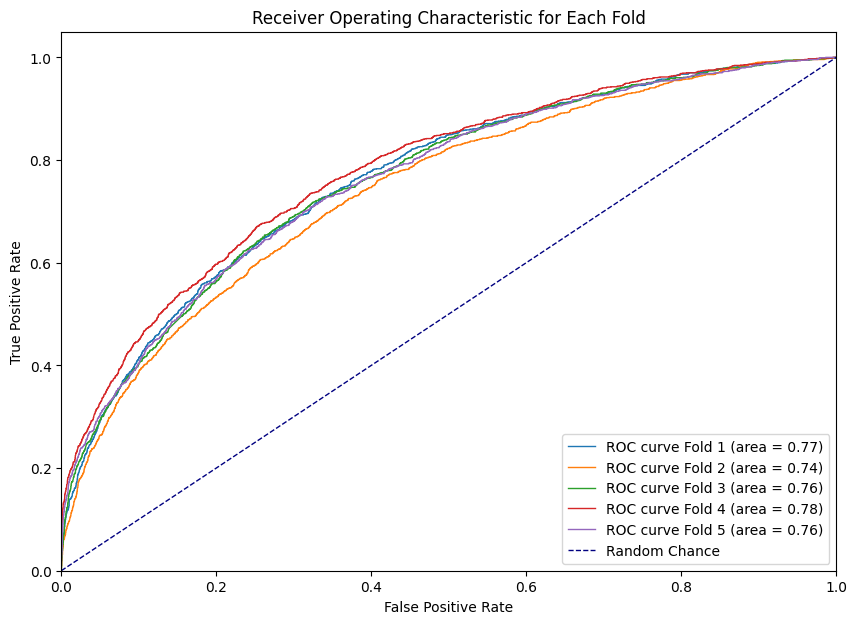

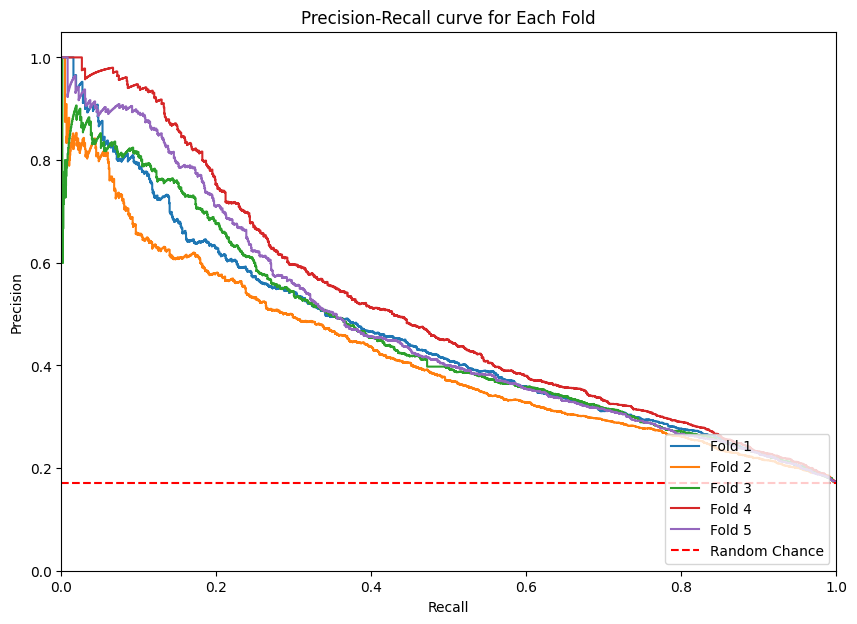

Epoch 1/20
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6458 - auc: 0.6736 - precision: 0.2618 - recall: 0.5974 - f1_metric: 0.3417 - val_loss: 0.4790 - val_auc: 0.7606 - val_precision: 0.4438 - val_recall: 0.4201 - val_f1_metric: 0.4060
Epoch 2/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6114 - auc: 0.7239 - precision: 0.2958 - recall: 0.6370 - f1_metric: 0.3929 - val_loss: 0.6282 - val_auc: 0.7657 - val_precision: 0.2865 - val_recall: 0.7964 - val_f1_metric: 0.4080
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6038 - auc: 0.7338 - precision: 0.3003 - recall: 0.6388 - f1_metric: 0.3978 - val_loss: 0.6646 - val_auc: 0.7691 - val_precision: 0.2643 - val_recall: 0.8471 - val_f1_metric: 0.3909
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.5989 - auc: 0.7398 - precision: 0.3079 - recall: 0.6484 - f1_metric: 0.4010 - val_loss: 0.5404 - val_auc: 0.7716 - val_precision: 0.3943 - val

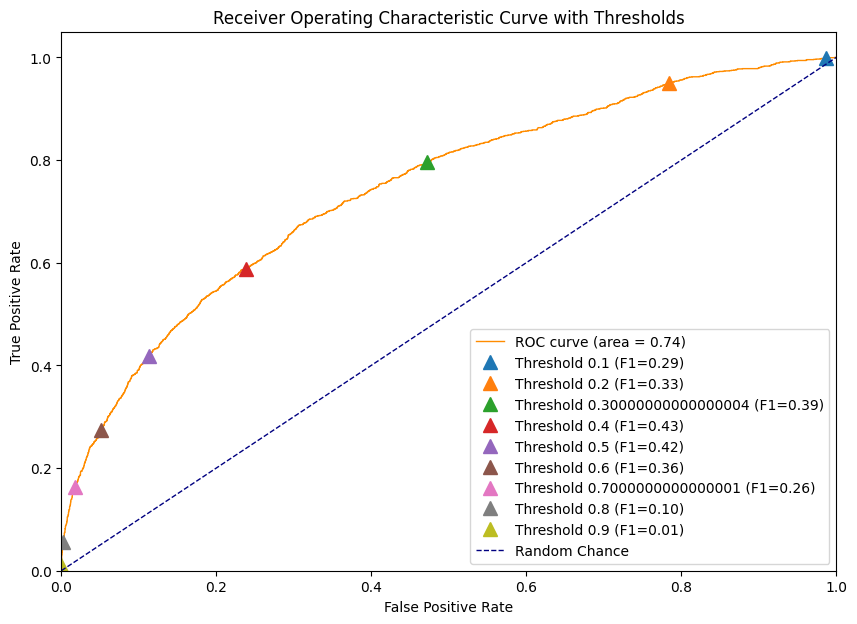

335/335 [==============================] - 0s 1ms/step


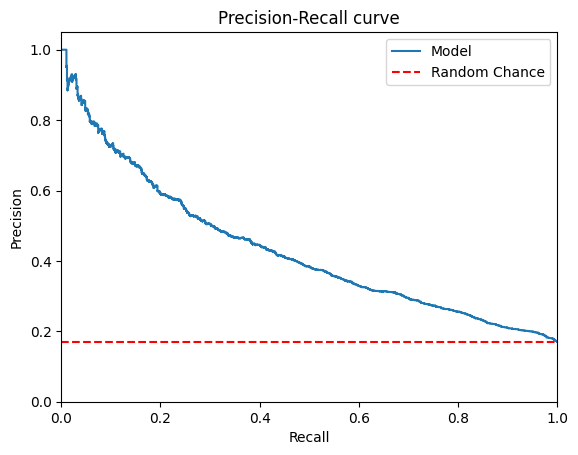

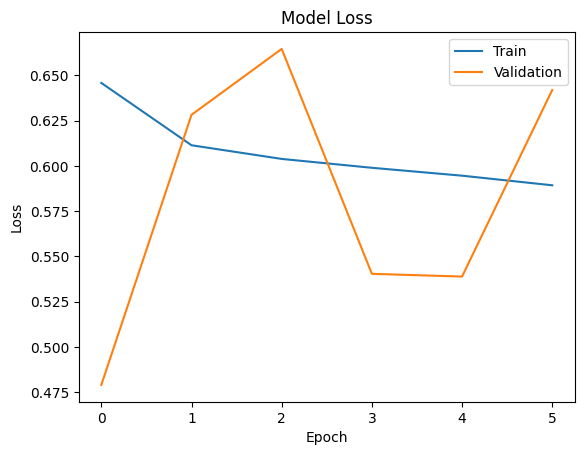

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.05859802847754655
AUC Confidence interval: (0.73, 0.75)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN_f1(df, 'gatortron_base_embeddings_average')

[I 2023-09-12 12:06:08,438] A new study created in memory with name: no-name-2eb360ba-1631-4170-8d19-4ff8dbe957cb


268/268 [==============================] - 1s 2ms/step - loss: 0.6363 - f1_metric: 0.4363


[I 2023-09-12 12:06:42,391] Trial 0 finished with value: 0.43630102276802063 and parameters: {'dropout_rate': 0.4414914926476958, 'n_units': 45, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.43630102276802063.


268/268 [==============================] - 1s 2ms/step - loss: 0.5500 - f1_metric: 0.4413


[I 2023-09-12 12:07:14,916] Trial 1 finished with value: 0.44126302003860474 and parameters: {'dropout_rate': 0.36786306216709297, 'n_units': 37, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6717 - f1_metric: 0.3702


[I 2023-09-12 12:07:47,861] Trial 2 finished with value: 0.37020745873451233 and parameters: {'dropout_rate': 0.4960739465698497, 'n_units': 117, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6388 - f1_metric: 0.4267


[I 2023-09-12 12:08:21,899] Trial 3 finished with value: 0.4267117977142334 and parameters: {'dropout_rate': 0.418511061561217, 'n_units': 112, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.5826 - f1_metric: 0.4222


[I 2023-09-12 12:08:54,575] Trial 4 finished with value: 0.4221903681755066 and parameters: {'dropout_rate': 0.2086875456100784, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6092 - f1_metric: 0.4121


[I 2023-09-12 12:09:27,619] Trial 5 finished with value: 0.4121289551258087 and parameters: {'dropout_rate': 0.15988924104156266, 'n_units': 61, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.5546 - f1_metric: 0.4329


[I 2023-09-12 12:10:01,522] Trial 6 finished with value: 0.43292462825775146 and parameters: {'dropout_rate': 0.1853756666951053, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6255 - f1_metric: 0.4298


[I 2023-09-12 12:10:35,585] Trial 7 finished with value: 0.4298498034477234 and parameters: {'dropout_rate': 0.17022224630845167, 'n_units': 38, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6447 - f1_metric: 0.4093


[I 2023-09-12 12:11:09,970] Trial 8 finished with value: 0.40929704904556274 and parameters: {'dropout_rate': 0.45257132761822283, 'n_units': 80, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6230 - f1_metric: 0.4357


[I 2023-09-12 12:11:45,799] Trial 9 finished with value: 0.435723215341568 and parameters: {'dropout_rate': 0.3805499583016714, 'n_units': 114, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.5807 - f1_metric: 0.4041


[I 2023-09-12 12:12:19,616] Trial 10 finished with value: 0.4040697515010834 and parameters: {'dropout_rate': 0.31154872038434384, 'n_units': 87, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.5704 - f1_metric: 0.4234


[I 2023-09-12 12:12:52,500] Trial 11 finished with value: 0.4234011769294739 and parameters: {'dropout_rate': 0.35509222505464827, 'n_units': 34, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6174 - f1_metric: 0.4121


[I 2023-09-12 12:13:26,794] Trial 12 finished with value: 0.4120706021785736 and parameters: {'dropout_rate': 0.2831466348026416, 'n_units': 45, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6527 - f1_metric: 0.3904


[I 2023-09-12 12:13:59,550] Trial 13 finished with value: 0.3904006779193878 and parameters: {'dropout_rate': 0.43046717144346247, 'n_units': 76, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


268/268 [==============================] - 1s 2ms/step - loss: 0.6090 - f1_metric: 0.4155


[I 2023-09-12 12:14:32,408] Trial 14 finished with value: 0.415490061044693 and parameters: {'dropout_rate': 0.37012508217218676, 'n_units': 49, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.44126302003860474.


Fold [    7    10    12 ... 42861 42865 42867]
Best f1_metric: 0.44126302003860474
Best hyperparameters: {'dropout_rate': 0.36786306216709297, 'n_units': 37, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 12:15:12,076] A new study created in memory with name: no-name-a1d6a3bb-ae12-4dc2-a9ed-a5e5c02fb664


268/268 [==============================] - 1s 2ms/step - loss: 0.6022 - f1_metric: 0.4273


[I 2023-09-12 12:15:45,337] Trial 0 finished with value: 0.42726436257362366 and parameters: {'dropout_rate': 0.15242173838502673, 'n_units': 111, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42726436257362366.


268/268 [==============================] - 1s 2ms/step - loss: 0.5179 - f1_metric: 0.4363


[I 2023-09-12 12:16:19,923] Trial 1 finished with value: 0.43634167313575745 and parameters: {'dropout_rate': 0.18034946655531436, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.6083 - f1_metric: 0.4211


[I 2023-09-12 12:16:53,947] Trial 2 finished with value: 0.4210564196109772 and parameters: {'dropout_rate': 0.19217194844475416, 'n_units': 64, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.6824 - f1_metric: 0.3851


[I 2023-09-12 12:17:27,159] Trial 3 finished with value: 0.3850949704647064 and parameters: {'dropout_rate': 0.2025862802132155, 'n_units': 44, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.5706 - f1_metric: 0.4295


[I 2023-09-12 12:18:00,150] Trial 4 finished with value: 0.4295048415660858 and parameters: {'dropout_rate': 0.22110818955760003, 'n_units': 43, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.6164 - f1_metric: 0.4051


[I 2023-09-12 12:18:35,446] Trial 5 finished with value: 0.40507593750953674 and parameters: {'dropout_rate': 0.38264231888209776, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.6029 - f1_metric: 0.4235


[I 2023-09-12 12:19:09,936] Trial 6 finished with value: 0.4234772324562073 and parameters: {'dropout_rate': 0.32796719034214133, 'n_units': 99, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.6151 - f1_metric: 0.3967


[I 2023-09-12 12:19:43,330] Trial 7 finished with value: 0.39669474959373474 and parameters: {'dropout_rate': 0.38902418638274405, 'n_units': 97, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43634167313575745.


268/268 [==============================] - 1s 2ms/step - loss: 0.5399 - f1_metric: 0.4379


[I 2023-09-12 12:20:16,360] Trial 8 finished with value: 0.43788081407546997 and parameters: {'dropout_rate': 0.23077443913613727, 'n_units': 82, 'optimizer': 'RMSprop'}. Best is trial 8 with value: 0.43788081407546997.


268/268 [==============================] - 1s 2ms/step - loss: 0.5013 - f1_metric: 0.4382


[I 2023-09-12 12:20:50,578] Trial 9 finished with value: 0.43818777799606323 and parameters: {'dropout_rate': 0.38599518429758095, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


268/268 [==============================] - 1s 2ms/step - loss: 0.5720 - f1_metric: 0.4122


[I 2023-09-12 12:21:25,398] Trial 10 finished with value: 0.4121886193752289 and parameters: {'dropout_rate': 0.49501382412434647, 'n_units': 121, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


268/268 [==============================] - 1s 2ms/step - loss: 0.6096 - f1_metric: 0.4154


[I 2023-09-12 12:21:59,558] Trial 11 finished with value: 0.41537195444107056 and parameters: {'dropout_rate': 0.11227083690764805, 'n_units': 79, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


268/268 [==============================] - 1s 2ms/step - loss: 0.5647 - f1_metric: 0.4214


[I 2023-09-12 12:22:34,947] Trial 12 finished with value: 0.4213556945323944 and parameters: {'dropout_rate': 0.25506719379146203, 'n_units': 80, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


268/268 [==============================] - 1s 2ms/step - loss: 0.5880 - f1_metric: 0.4202


[I 2023-09-12 12:23:08,623] Trial 13 finished with value: 0.42020246386528015 and parameters: {'dropout_rate': 0.2909066383329684, 'n_units': 37, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


268/268 [==============================] - 1s 2ms/step - loss: 0.5697 - f1_metric: 0.4318


[I 2023-09-12 12:23:41,765] Trial 14 finished with value: 0.4318190813064575 and parameters: {'dropout_rate': 0.2676675278922142, 'n_units': 73, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.43818777799606323.


Fold [    6     8    16 ... 42839 42848 42866]
Best f1_metric: 0.43818777799606323
Best hyperparameters: {'dropout_rate': 0.38599518429758095, 'n_units': 55, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 12:24:19,157] A new study created in memory with name: no-name-6d5caf93-e450-476a-90b4-213115894121


268/268 [==============================] - 1s 2ms/step - loss: 0.5507 - f1_metric: 0.4360


[I 2023-09-12 12:24:56,340] Trial 0 finished with value: 0.43604496121406555 and parameters: {'dropout_rate': 0.2923748235464204, 'n_units': 105, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.43604496121406555.


268/268 [==============================] - 1s 2ms/step - loss: 0.5654 - f1_metric: 0.4317


[I 2023-09-12 12:25:36,551] Trial 1 finished with value: 0.4317306876182556 and parameters: {'dropout_rate': 0.28848570278141183, 'n_units': 97, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.43604496121406555.


268/268 [==============================] - 1s 2ms/step - loss: 0.6727 - f1_metric: 0.3847


[I 2023-09-12 12:26:15,330] Trial 2 finished with value: 0.38468873500823975 and parameters: {'dropout_rate': 0.39214260438384674, 'n_units': 35, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.43604496121406555.


268/268 [==============================] - 1s 2ms/step - loss: 0.5258 - f1_metric: 0.4323


[I 2023-09-12 12:26:53,124] Trial 3 finished with value: 0.43225160241127014 and parameters: {'dropout_rate': 0.22174899259906705, 'n_units': 39, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.43604496121406555.


268/268 [==============================] - 1s 2ms/step - loss: 0.6324 - f1_metric: 0.3987


[I 2023-09-12 12:27:30,579] Trial 4 finished with value: 0.39865899085998535 and parameters: {'dropout_rate': 0.375423441852049, 'n_units': 56, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.43604496121406555.


268/268 [==============================] - 1s 2ms/step - loss: 0.5130 - f1_metric: 0.4440


[I 2023-09-12 12:28:11,104] Trial 5 finished with value: 0.4440332353115082 and parameters: {'dropout_rate': 0.13985534541608177, 'n_units': 33, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6016 - f1_metric: 0.4033


[I 2023-09-12 12:28:50,138] Trial 6 finished with value: 0.4033069610595703 and parameters: {'dropout_rate': 0.44729249781122304, 'n_units': 45, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.7344 - f1_metric: 0.3574


[I 2023-09-12 12:29:28,629] Trial 7 finished with value: 0.3573554456233978 and parameters: {'dropout_rate': 0.4373296134336676, 'n_units': 78, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.5699 - f1_metric: 0.4191


[I 2023-09-12 12:30:08,188] Trial 8 finished with value: 0.4190514087677002 and parameters: {'dropout_rate': 0.207373657624605, 'n_units': 48, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6293 - f1_metric: 0.4027


[I 2023-09-12 12:30:44,243] Trial 9 finished with value: 0.40266847610473633 and parameters: {'dropout_rate': 0.4168033679984343, 'n_units': 62, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.5850 - f1_metric: 0.4175


[I 2023-09-12 12:31:23,129] Trial 10 finished with value: 0.41754913330078125 and parameters: {'dropout_rate': 0.1317159827227973, 'n_units': 127, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6154 - f1_metric: 0.4135


[I 2023-09-12 12:32:03,032] Trial 11 finished with value: 0.41354066133499146 and parameters: {'dropout_rate': 0.10319860323947755, 'n_units': 108, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6274 - f1_metric: 0.4000


[I 2023-09-12 12:32:44,224] Trial 12 finished with value: 0.3999723494052887 and parameters: {'dropout_rate': 0.3195599596844182, 'n_units': 91, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6934 - f1_metric: 0.2863


[I 2023-09-12 12:33:25,291] Trial 13 finished with value: 0.2863166332244873 and parameters: {'dropout_rate': 0.49792784758047115, 'n_units': 117, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


268/268 [==============================] - 1s 2ms/step - loss: 0.6683 - f1_metric: 0.3859


[I 2023-09-12 12:34:06,013] Trial 14 finished with value: 0.38588452339172363 and parameters: {'dropout_rate': 0.16948702914772373, 'n_units': 75, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.4440332353115082.


Fold [    3     5    17 ... 42862 42864 42868]
Best f1_metric: 0.4440332353115082
Best hyperparameters: {'dropout_rate': 0.13985534541608177, 'n_units': 33, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 12:34:54,596] A new study created in memory with name: no-name-af3622f7-89de-4b27-bb36-9cbbac8e4e17


268/268 [==============================] - 1s 2ms/step - loss: 0.5753 - f1_metric: 0.4367


[I 2023-09-12 12:35:33,507] Trial 0 finished with value: 0.43665507435798645 and parameters: {'dropout_rate': 0.3797708004444349, 'n_units': 46, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.43665507435798645.


268/268 [==============================] - 1s 2ms/step - loss: 0.6121 - f1_metric: 0.4383


[I 2023-09-12 12:36:10,112] Trial 1 finished with value: 0.43826770782470703 and parameters: {'dropout_rate': 0.40154511585665464, 'n_units': 117, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.43826770782470703.


268/268 [==============================] - 1s 2ms/step - loss: 0.5305 - f1_metric: 0.4275


[I 2023-09-12 12:36:48,394] Trial 2 finished with value: 0.42747727036476135 and parameters: {'dropout_rate': 0.3482934908181463, 'n_units': 84, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.43826770782470703.


268/268 [==============================] - 1s 2ms/step - loss: 0.5986 - f1_metric: 0.4417


[I 2023-09-12 12:37:26,619] Trial 3 finished with value: 0.4417397081851959 and parameters: {'dropout_rate': 0.13998707112804865, 'n_units': 38, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4417397081851959.


268/268 [==============================] - 1s 2ms/step - loss: 0.4988 - f1_metric: 0.4459


[I 2023-09-12 12:38:04,688] Trial 4 finished with value: 0.44592493772506714 and parameters: {'dropout_rate': 0.3516600345150569, 'n_units': 114, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5399 - f1_metric: 0.4456


[I 2023-09-12 12:38:45,471] Trial 5 finished with value: 0.4455524981021881 and parameters: {'dropout_rate': 0.21474098552320844, 'n_units': 75, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5538 - f1_metric: 0.4451


[I 2023-09-12 12:39:25,464] Trial 6 finished with value: 0.445061057806015 and parameters: {'dropout_rate': 0.12982246323830218, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.6552 - f1_metric: 0.4075


[I 2023-09-12 12:40:05,124] Trial 7 finished with value: 0.40747353434562683 and parameters: {'dropout_rate': 0.18950745063517505, 'n_units': 69, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5011 - f1_metric: 0.4393


[I 2023-09-12 12:40:47,354] Trial 8 finished with value: 0.4392835199832916 and parameters: {'dropout_rate': 0.18365044358778612, 'n_units': 54, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5930 - f1_metric: 0.4249


[I 2023-09-12 12:41:23,514] Trial 9 finished with value: 0.4249415099620819 and parameters: {'dropout_rate': 0.3100326918339349, 'n_units': 102, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.6095 - f1_metric: 0.4051


[I 2023-09-12 12:41:58,425] Trial 10 finished with value: 0.40505650639533997 and parameters: {'dropout_rate': 0.4983289697475668, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5677 - f1_metric: 0.4437


[I 2023-09-12 12:42:33,739] Trial 11 finished with value: 0.44367173314094543 and parameters: {'dropout_rate': 0.2472325030190182, 'n_units': 67, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.4910 - f1_metric: 0.4425


[I 2023-09-12 12:43:08,984] Trial 12 finished with value: 0.44254639744758606 and parameters: {'dropout_rate': 0.2557660778396271, 'n_units': 104, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.44592493772506714.


268/268 [==============================] - 1s 2ms/step - loss: 0.5472 - f1_metric: 0.4521


[I 2023-09-12 12:43:44,141] Trial 13 finished with value: 0.4520949423313141 and parameters: {'dropout_rate': 0.2667144889933134, 'n_units': 94, 'optimizer': 'Adam'}. Best is trial 13 with value: 0.4520949423313141.


268/268 [==============================] - 1s 2ms/step - loss: 0.5340 - f1_metric: 0.4496


[I 2023-09-12 12:44:19,433] Trial 14 finished with value: 0.44962501525878906 and parameters: {'dropout_rate': 0.2898236471525311, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 13 with value: 0.4520949423313141.


Fold [    1    11    15 ... 42852 42856 42863]
Best f1_metric: 0.4520949423313141
Best hyperparameters: {'dropout_rate': 0.2667144889933134, 'n_units': 94, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 12:44:58,997] A new study created in memory with name: no-name-63074de0-7b28-433b-ae28-abadbb0297fa


268/268 [==============================] - 1s 2ms/step - loss: 0.5438 - f1_metric: 0.4313


[I 2023-09-12 12:45:34,097] Trial 0 finished with value: 0.43131354451179504 and parameters: {'dropout_rate': 0.27199082567179655, 'n_units': 107, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.43131354451179504.


268/268 [==============================] - 1s 2ms/step - loss: 0.5742 - f1_metric: 0.4242


[I 2023-09-12 12:46:08,872] Trial 1 finished with value: 0.424168199300766 and parameters: {'dropout_rate': 0.31883122823206944, 'n_units': 92, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.43131354451179504.


268/268 [==============================] - 1s 2ms/step - loss: 0.5276 - f1_metric: 0.4336


[I 2023-09-12 12:46:43,156] Trial 2 finished with value: 0.43363481760025024 and parameters: {'dropout_rate': 0.14583993948228377, 'n_units': 58, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.5645 - f1_metric: 0.4303


[I 2023-09-12 12:47:20,341] Trial 3 finished with value: 0.4302833676338196 and parameters: {'dropout_rate': 0.15201558104594137, 'n_units': 58, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.5676 - f1_metric: 0.4291


[I 2023-09-12 12:47:56,122] Trial 4 finished with value: 0.42906877398490906 and parameters: {'dropout_rate': 0.4083549850389593, 'n_units': 83, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.4602 - f1_metric: 0.3922


[I 2023-09-12 12:48:31,495] Trial 5 finished with value: 0.39215996861457825 and parameters: {'dropout_rate': 0.40365812055331185, 'n_units': 76, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.5451 - f1_metric: 0.4200


[I 2023-09-12 12:49:05,726] Trial 6 finished with value: 0.41995730996131897 and parameters: {'dropout_rate': 0.4734549259038072, 'n_units': 48, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.5795 - f1_metric: 0.4222


[I 2023-09-12 12:49:40,261] Trial 7 finished with value: 0.4221726059913635 and parameters: {'dropout_rate': 0.1654066938993901, 'n_units': 80, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.6509 - f1_metric: 0.4057


[I 2023-09-12 12:50:15,396] Trial 8 finished with value: 0.4057076871395111 and parameters: {'dropout_rate': 0.24546552347039677, 'n_units': 59, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.43363481760025024.


268/268 [==============================] - 1s 2ms/step - loss: 0.5083 - f1_metric: 0.4341


[I 2023-09-12 12:50:49,662] Trial 9 finished with value: 0.4341457188129425 and parameters: {'dropout_rate': 0.2787433283251277, 'n_units': 70, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.4341457188129425.


268/268 [==============================] - 1s 2ms/step - loss: 0.5550 - f1_metric: 0.4364


[I 2023-09-12 12:51:23,727] Trial 10 finished with value: 0.43640127778053284 and parameters: {'dropout_rate': 0.22843592434430676, 'n_units': 128, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.43640127778053284.


268/268 [==============================] - 1s 2ms/step - loss: 0.6001 - f1_metric: 0.4074


[I 2023-09-12 12:51:57,725] Trial 11 finished with value: 0.40741151571273804 and parameters: {'dropout_rate': 0.22674938787616494, 'n_units': 124, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.43640127778053284.


268/268 [==============================] - 1s 2ms/step - loss: 0.5594 - f1_metric: 0.4175


[I 2023-09-12 12:52:32,736] Trial 12 finished with value: 0.41750258207321167 and parameters: {'dropout_rate': 0.3195107299015366, 'n_units': 127, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.43640127778053284.


268/268 [==============================] - 1s 2ms/step - loss: 0.4687 - f1_metric: 0.4187


[I 2023-09-12 12:53:06,342] Trial 13 finished with value: 0.4187077283859253 and parameters: {'dropout_rate': 0.2099095326156984, 'n_units': 100, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.43640127778053284.


268/268 [==============================] - 1s 2ms/step - loss: 0.5070 - f1_metric: 0.4284


[I 2023-09-12 12:53:40,089] Trial 14 finished with value: 0.42844128608703613 and parameters: {'dropout_rate': 0.10037680334274185, 'n_units': 38, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.43640127778053284.


Fold [    0     2     4 ... 42835 42840 42854]
Best f1_metric: 0.43640127778053284
Best hyperparameters: {'dropout_rate': 0.22843592434430676, 'n_units': 128, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


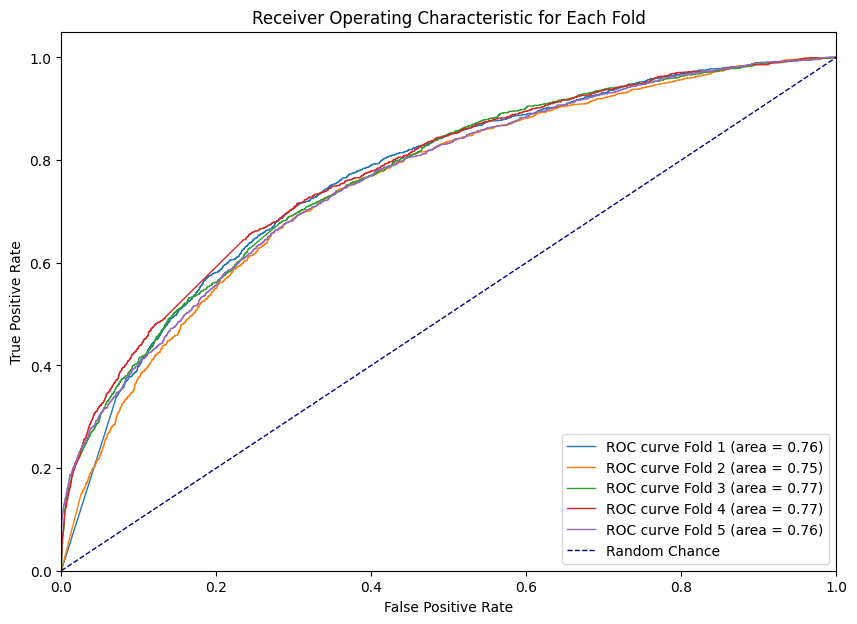

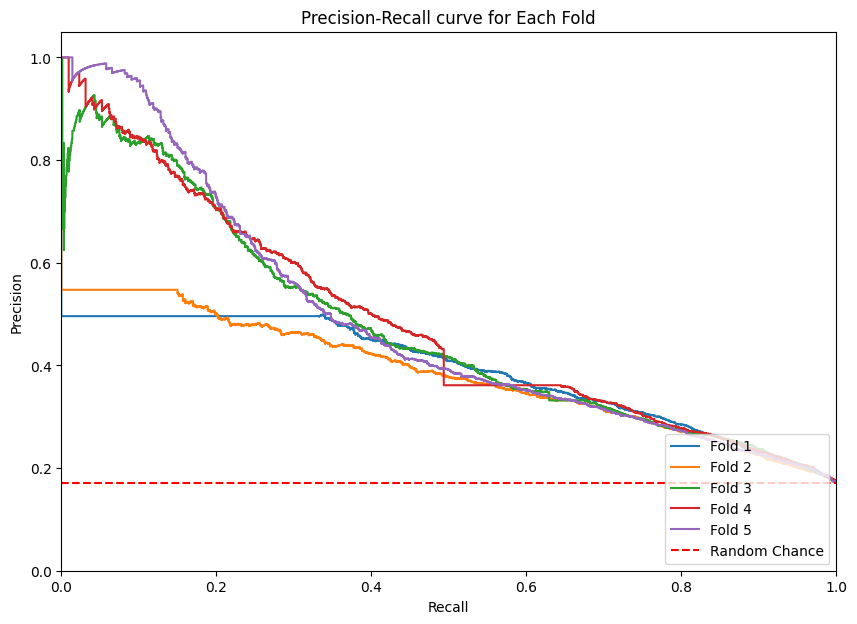

Epoch 1/20
1005/1005 [==============================] - 8s 5ms/step - loss: 0.6664 - auc: 0.6386 - precision: 0.2392 - recall: 0.5736 - f1_metric: 0.3270 - val_loss: 0.7263 - val_auc: 0.7484 - val_precision: 0.2479 - val_recall: 0.8402 - val_f1_metric: 0.3713
Epoch 2/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6202 - auc: 0.7119 - precision: 0.3045 - recall: 0.5701 - f1_metric: 0.3798 - val_loss: 0.5655 - val_auc: 0.7661 - val_precision: 0.4127 - val_recall: 0.5329 - val_f1_metric: 0.4460
Epoch 3/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6086 - auc: 0.7255 - precision: 0.2970 - recall: 0.6086 - f1_metric: 0.3814 - val_loss: 0.6072 - val_auc: 0.7676 - val_precision: 0.3142 - val_recall: 0.7173 - val_f1_metric: 0.4206
Epoch 4/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6074 - auc: 0.7269 - precision: 0.2807 - recall: 0.6723 - f1_metric: 0.3851 - val_loss: 0.5690 - val_auc: 0.7714 - val_precision: 0.3859 - val

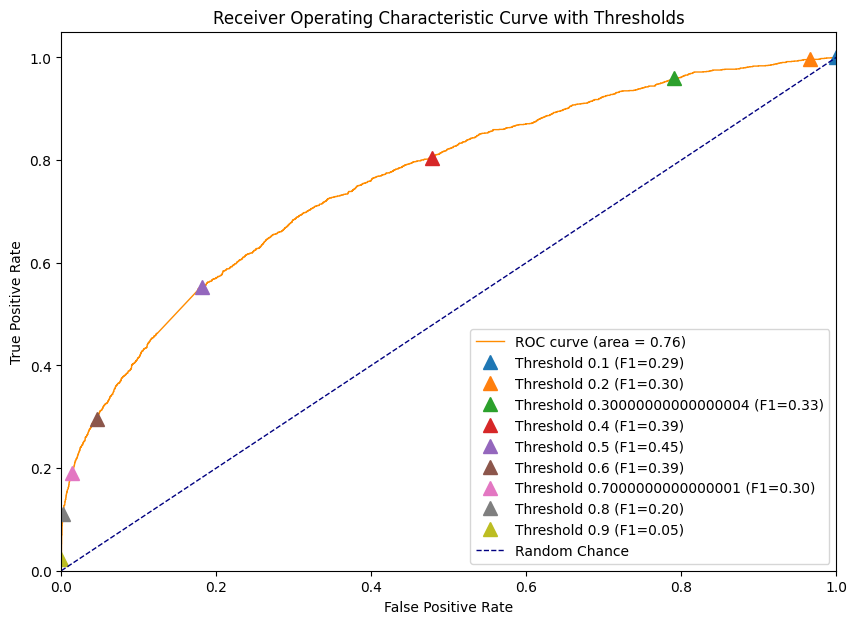

335/335 [==============================] - 0s 1ms/step


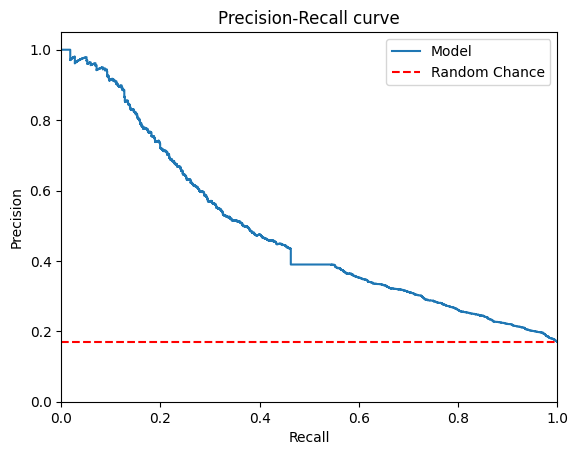

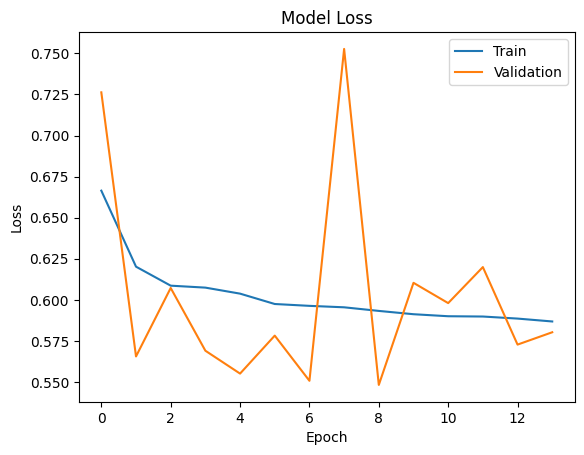

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.15826944140197152
AUC Confidence interval: (0.75, 0.77)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN_f1(df, 'gatortron_base_embeddings_all_layers')

[I 2023-09-12 12:55:37,162] A new study created in memory with name: no-name-ddda333e-c70f-4206-802b-5a8dea6d8bbd


268/268 [==============================] - 1s 2ms/step - loss: 0.6688 - f1_metric: 0.3963


[I 2023-09-12 12:56:12,695] Trial 0 finished with value: 0.3962607681751251 and parameters: {'dropout_rate': 0.4546174702122979, 'n_units': 113, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.3962607681751251.


268/268 [==============================] - 1s 2ms/step - loss: 0.5798 - f1_metric: 0.4021


[I 2023-09-12 12:56:46,808] Trial 1 finished with value: 0.4021357297897339 and parameters: {'dropout_rate': 0.19227468327389838, 'n_units': 76, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4021357297897339.


268/268 [==============================] - 1s 2ms/step - loss: 0.6291 - f1_metric: 0.3917


[I 2023-09-12 12:57:21,128] Trial 2 finished with value: 0.39174872636795044 and parameters: {'dropout_rate': 0.4411950968930821, 'n_units': 101, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4021357297897339.


268/268 [==============================] - 1s 2ms/step - loss: 0.7088 - f1_metric: 0.3704


[I 2023-09-12 12:57:55,502] Trial 3 finished with value: 0.3703823685646057 and parameters: {'dropout_rate': 0.19797654334286757, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4021357297897339.


268/268 [==============================] - 1s 2ms/step - loss: 0.5898 - f1_metric: 0.4021


[I 2023-09-12 12:58:30,447] Trial 4 finished with value: 0.4020850658416748 and parameters: {'dropout_rate': 0.25735329104060584, 'n_units': 106, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4021357297897339.


268/268 [==============================] - 1s 2ms/step - loss: 0.5606 - f1_metric: 0.4038


[I 2023-09-12 12:59:04,092] Trial 5 finished with value: 0.40376338362693787 and parameters: {'dropout_rate': 0.10759890834901538, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.6408 - f1_metric: 0.3901


[I 2023-09-12 12:59:38,264] Trial 6 finished with value: 0.39011529088020325 and parameters: {'dropout_rate': 0.14524992349519145, 'n_units': 72, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.5745 - f1_metric: 0.4010


[I 2023-09-12 13:00:11,700] Trial 7 finished with value: 0.4009600877761841 and parameters: {'dropout_rate': 0.2445519614640861, 'n_units': 117, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.6495 - f1_metric: 0.3910


[I 2023-09-12 13:00:45,105] Trial 8 finished with value: 0.39100173115730286 and parameters: {'dropout_rate': 0.21497924460361487, 'n_units': 94, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.6930 - f1_metric: 0.3653


[I 2023-09-12 13:01:18,066] Trial 9 finished with value: 0.3653291165828705 and parameters: {'dropout_rate': 0.2064816005153466, 'n_units': 97, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.6433 - f1_metric: 0.3925


[I 2023-09-12 13:01:52,241] Trial 10 finished with value: 0.39246276021003723 and parameters: {'dropout_rate': 0.10846511424316077, 'n_units': 45, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.6165 - f1_metric: 0.4008


[I 2023-09-12 13:02:24,871] Trial 11 finished with value: 0.40075698494911194 and parameters: {'dropout_rate': 0.10782219844876607, 'n_units': 64, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.5959 - f1_metric: 0.3959


[I 2023-09-12 13:02:57,824] Trial 12 finished with value: 0.395927369594574 and parameters: {'dropout_rate': 0.3170597925618569, 'n_units': 52, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.7372 - f1_metric: 0.3582


[I 2023-09-12 13:03:30,698] Trial 13 finished with value: 0.35815712809562683 and parameters: {'dropout_rate': 0.15689172672395615, 'n_units': 32, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


268/268 [==============================] - 1s 2ms/step - loss: 0.5085 - f1_metric: 0.3939


[I 2023-09-12 13:04:03,449] Trial 14 finished with value: 0.3938893973827362 and parameters: {'dropout_rate': 0.10344579486275218, 'n_units': 79, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.40376338362693787.


Fold [    7    10    12 ... 42861 42865 42867]
Best f1_metric: 0.40376338362693787
Best hyperparameters: {'dropout_rate': 0.10759890834901538, 'n_units': 71, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:04:28,480] A new study created in memory with name: no-name-1abe5c8f-83f2-479d-abbd-70b0b26eded4


268/268 [==============================] - 1s 2ms/step - loss: 0.6634 - f1_metric: 0.3963


[I 2023-09-12 13:05:03,657] Trial 0 finished with value: 0.39627134799957275 and parameters: {'dropout_rate': 0.46060394365592694, 'n_units': 102, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.39627134799957275.


268/268 [==============================] - 1s 2ms/step - loss: 0.7006 - f1_metric: 0.3636


[I 2023-09-12 13:05:38,253] Trial 1 finished with value: 0.3635575771331787 and parameters: {'dropout_rate': 0.41755904772129093, 'n_units': 73, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.39627134799957275.


268/268 [==============================] - 1s 2ms/step - loss: 0.6756 - f1_metric: 0.3791


[I 2023-09-12 13:06:13,623] Trial 2 finished with value: 0.37908533215522766 and parameters: {'dropout_rate': 0.3756862164734003, 'n_units': 85, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.39627134799957275.


268/268 [==============================] - 1s 2ms/step - loss: 0.6430 - f1_metric: 0.4028


[I 2023-09-12 13:06:49,219] Trial 3 finished with value: 0.40280136466026306 and parameters: {'dropout_rate': 0.45742369928502635, 'n_units': 113, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.40280136466026306.


268/268 [==============================] - 1s 2ms/step - loss: 0.5524 - f1_metric: 0.4034


[I 2023-09-12 13:07:23,472] Trial 4 finished with value: 0.4034116268157959 and parameters: {'dropout_rate': 0.13079417651573602, 'n_units': 127, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.4034116268157959.


268/268 [==============================] - 1s 2ms/step - loss: 0.6321 - f1_metric: 0.3930


[I 2023-09-12 13:07:57,971] Trial 5 finished with value: 0.3929736018180847 and parameters: {'dropout_rate': 0.19268377144110743, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.4034116268157959.


268/268 [==============================] - 1s 2ms/step - loss: 0.5760 - f1_metric: 0.4079


[I 2023-09-12 13:08:34,577] Trial 6 finished with value: 0.4079447388648987 and parameters: {'dropout_rate': 0.1221620423598949, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.5651 - f1_metric: 0.4069


[I 2023-09-12 13:09:10,430] Trial 7 finished with value: 0.4068886935710907 and parameters: {'dropout_rate': 0.3166884018382403, 'n_units': 97, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.6894 - f1_metric: 0.0000e+00


[I 2023-09-12 13:09:46,393] Trial 8 finished with value: 0.0 and parameters: {'dropout_rate': 0.49208185369703406, 'n_units': 79, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.5772 - f1_metric: 0.4039


[I 2023-09-12 13:10:20,997] Trial 9 finished with value: 0.40391838550567627 and parameters: {'dropout_rate': 0.2984885380260126, 'n_units': 104, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.6402 - f1_metric: 0.3956


[I 2023-09-12 13:10:56,609] Trial 10 finished with value: 0.3956022262573242 and parameters: {'dropout_rate': 0.12609953105052119, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.7038 - f1_metric: 0.3493


[I 2023-09-12 13:11:32,464] Trial 11 finished with value: 0.3492638170719147 and parameters: {'dropout_rate': 0.2984469858356399, 'n_units': 35, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.6998 - f1_metric: 0.3678


[I 2023-09-12 13:12:08,757] Trial 12 finished with value: 0.36778053641319275 and parameters: {'dropout_rate': 0.2286398580227379, 'n_units': 60, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.5570 - f1_metric: 0.4060


[I 2023-09-12 13:12:45,079] Trial 13 finished with value: 0.40595269203186035 and parameters: {'dropout_rate': 0.3503889963606575, 'n_units': 92, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


268/268 [==============================] - 1s 2ms/step - loss: 0.5973 - f1_metric: 0.4052


[I 2023-09-12 13:13:20,565] Trial 14 finished with value: 0.4052214026451111 and parameters: {'dropout_rate': 0.23317148100131302, 'n_units': 57, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4079447388648987.


Fold [    6     8    16 ... 42839 42848 42866]
Best f1_metric: 0.4079447388648987
Best hyperparameters: {'dropout_rate': 0.1221620423598949, 'n_units': 32, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:14:03,225] A new study created in memory with name: no-name-7b2b32b9-32ec-44ae-be9c-09c19c99627f


268/268 [==============================] - 1s 2ms/step - loss: 0.6792 - f1_metric: 0.3314


[I 2023-09-12 13:14:37,232] Trial 0 finished with value: 0.33136481046676636 and parameters: {'dropout_rate': 0.4632670945558556, 'n_units': 124, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.33136481046676636.


268/268 [==============================] - 1s 2ms/step - loss: 0.6622 - f1_metric: 0.3637


[I 2023-09-12 13:15:11,113] Trial 1 finished with value: 0.3636625111103058 and parameters: {'dropout_rate': 0.490401089328505, 'n_units': 75, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.3636625111103058.


268/268 [==============================] - 1s 2ms/step - loss: 0.6209 - f1_metric: 0.3892


[I 2023-09-12 13:15:46,117] Trial 2 finished with value: 0.38921797275543213 and parameters: {'dropout_rate': 0.3761621009508046, 'n_units': 108, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.38921797275543213.


268/268 [==============================] - 1s 2ms/step - loss: 0.6264 - f1_metric: 0.3852


[I 2023-09-12 13:16:19,799] Trial 3 finished with value: 0.3851528763771057 and parameters: {'dropout_rate': 0.2978768383363499, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 0.38921797275543213.


268/268 [==============================] - 1s 2ms/step - loss: 0.5710 - f1_metric: 0.4101


[I 2023-09-12 13:16:54,732] Trial 4 finished with value: 0.41014114022254944 and parameters: {'dropout_rate': 0.21164333621142783, 'n_units': 119, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5215 - f1_metric: 0.4076


[I 2023-09-12 13:17:27,972] Trial 5 finished with value: 0.40762582421302795 and parameters: {'dropout_rate': 0.13873565442847738, 'n_units': 41, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.6402 - f1_metric: 0.3813


[I 2023-09-12 13:18:01,625] Trial 6 finished with value: 0.3812549114227295 and parameters: {'dropout_rate': 0.20118143247471132, 'n_units': 59, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5491 - f1_metric: 0.4063


[I 2023-09-12 13:18:36,572] Trial 7 finished with value: 0.4063214957714081 and parameters: {'dropout_rate': 0.2042578447992056, 'n_units': 89, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5571 - f1_metric: 0.3985


[I 2023-09-12 13:19:11,131] Trial 8 finished with value: 0.3985340893268585 and parameters: {'dropout_rate': 0.2530078247384644, 'n_units': 90, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.6064 - f1_metric: 0.3880


[I 2023-09-12 13:19:45,568] Trial 9 finished with value: 0.387966513633728 and parameters: {'dropout_rate': 0.3268561266681483, 'n_units': 91, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5360 - f1_metric: 0.4067


[I 2023-09-12 13:20:20,295] Trial 10 finished with value: 0.4067041873931885 and parameters: {'dropout_rate': 0.11599198264773894, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.6119 - f1_metric: 0.3909


[I 2023-09-12 13:20:53,889] Trial 11 finished with value: 0.39090660214424133 and parameters: {'dropout_rate': 0.10130636929244287, 'n_units': 45, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5101 - f1_metric: 0.3427


[I 2023-09-12 13:21:27,178] Trial 12 finished with value: 0.34272289276123047 and parameters: {'dropout_rate': 0.16640781667766488, 'n_units': 39, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.6117 - f1_metric: 0.3947


[I 2023-09-12 13:22:01,961] Trial 13 finished with value: 0.3946762681007385 and parameters: {'dropout_rate': 0.17039844516636754, 'n_units': 56, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


268/268 [==============================] - 1s 2ms/step - loss: 0.5989 - f1_metric: 0.3972


[I 2023-09-12 13:22:38,269] Trial 14 finished with value: 0.3971603810787201 and parameters: {'dropout_rate': 0.23617292990265792, 'n_units': 32, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.41014114022254944.


Fold [    3     5    17 ... 42862 42864 42868]
Best f1_metric: 0.41014114022254944
Best hyperparameters: {'dropout_rate': 0.21164333621142783, 'n_units': 119, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:23:09,095] A new study created in memory with name: no-name-ef8ffec8-4ffc-456c-8612-53b12f719dc4


268/268 [==============================] - 1s 2ms/step - loss: 0.4869 - f1_metric: 0.3746


[I 2023-09-12 13:23:43,207] Trial 0 finished with value: 0.3746297061443329 and parameters: {'dropout_rate': 0.14772787517281594, 'n_units': 47, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.3746297061443329.


268/268 [==============================] - 1s 2ms/step - loss: 0.6252 - f1_metric: 0.3840


[I 2023-09-12 13:24:18,399] Trial 1 finished with value: 0.38402852416038513 and parameters: {'dropout_rate': 0.31585839683657524, 'n_units': 118, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.38402852416038513.


268/268 [==============================] - 1s 2ms/step - loss: 0.6919 - f1_metric: 0.0000e+00


[I 2023-09-12 13:24:53,515] Trial 2 finished with value: 0.0 and parameters: {'dropout_rate': 0.3153048962884176, 'n_units': 53, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.38402852416038513.


268/268 [==============================] - 1s 2ms/step - loss: 0.5792 - f1_metric: 0.4172


[I 2023-09-12 13:25:27,223] Trial 3 finished with value: 0.4171549081802368 and parameters: {'dropout_rate': 0.10076166497845494, 'n_units': 104, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.6748 - f1_metric: 0.3661


[I 2023-09-12 13:26:01,074] Trial 4 finished with value: 0.36610251665115356 and parameters: {'dropout_rate': 0.3175144975554459, 'n_units': 65, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.6398 - f1_metric: 0.3888


[I 2023-09-12 13:26:34,310] Trial 5 finished with value: 0.3887855112552643 and parameters: {'dropout_rate': 0.4297682955685983, 'n_units': 55, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.6086 - f1_metric: 0.3989


[I 2023-09-12 13:27:07,426] Trial 6 finished with value: 0.39886486530303955 and parameters: {'dropout_rate': 0.4881752326543458, 'n_units': 40, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.6093 - f1_metric: 0.4031


[I 2023-09-12 13:27:42,068] Trial 7 finished with value: 0.40307724475860596 and parameters: {'dropout_rate': 0.43559733648591614, 'n_units': 88, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.5809 - f1_metric: 0.4138


[I 2023-09-12 13:28:16,309] Trial 8 finished with value: 0.4137822985649109 and parameters: {'dropout_rate': 0.2895383960530382, 'n_units': 100, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4171549081802368.


268/268 [==============================] - 1s 2ms/step - loss: 0.5621 - f1_metric: 0.4182


[I 2023-09-12 13:28:49,954] Trial 9 finished with value: 0.4182482063770294 and parameters: {'dropout_rate': 0.21792271311491396, 'n_units': 87, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.4182482063770294.


268/268 [==============================] - 1s 2ms/step - loss: 0.5539 - f1_metric: 0.4125


[I 2023-09-12 13:29:23,072] Trial 10 finished with value: 0.4125306010246277 and parameters: {'dropout_rate': 0.2083670174599932, 'n_units': 78, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.4182482063770294.


268/268 [==============================] - 1s 2ms/step - loss: 0.6344 - f1_metric: 0.3987


[I 2023-09-12 13:29:56,753] Trial 11 finished with value: 0.3986983895301819 and parameters: {'dropout_rate': 0.10907668855957897, 'n_units': 112, 'optimizer': 'RMSprop'}. Best is trial 9 with value: 0.4182482063770294.


268/268 [==============================] - 1s 2ms/step - loss: 0.5784 - f1_metric: 0.4210


[I 2023-09-12 13:30:30,064] Trial 12 finished with value: 0.420980304479599 and parameters: {'dropout_rate': 0.10166536769222673, 'n_units': 92, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.420980304479599.


268/268 [==============================] - 1s 2ms/step - loss: 0.6403 - f1_metric: 0.3885


[I 2023-09-12 13:31:02,976] Trial 13 finished with value: 0.38846680521965027 and parameters: {'dropout_rate': 0.19193960939657317, 'n_units': 83, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.420980304479599.


268/268 [==============================] - 1s 2ms/step - loss: 0.6318 - f1_metric: 0.4024


[I 2023-09-12 13:31:36,028] Trial 14 finished with value: 0.4024047255516052 and parameters: {'dropout_rate': 0.19008461244406977, 'n_units': 70, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.420980304479599.


Fold [    1    11    15 ... 42852 42856 42863]
Best f1_metric: 0.420980304479599
Best hyperparameters: {'dropout_rate': 0.10166536769222673, 'n_units': 92, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:32:15,990] A new study created in memory with name: no-name-3997fe06-e234-40ef-bcaa-faed91c9a2a6


268/268 [==============================] - 1s 2ms/step - loss: 0.5375 - f1_metric: 0.4041


[I 2023-09-12 13:32:48,982] Trial 0 finished with value: 0.40413352847099304 and parameters: {'dropout_rate': 0.224502700069158, 'n_units': 42, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.6416 - f1_metric: 0.3688


[I 2023-09-12 13:33:22,530] Trial 1 finished with value: 0.36875730752944946 and parameters: {'dropout_rate': 0.2392835016402014, 'n_units': 37, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.6885 - f1_metric: 0.3479


[I 2023-09-12 13:33:55,469] Trial 2 finished with value: 0.3478882610797882 and parameters: {'dropout_rate': 0.28958759656551664, 'n_units': 113, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.7154 - f1_metric: 0.3464


[I 2023-09-12 13:34:27,913] Trial 3 finished with value: 0.34636029601097107 and parameters: {'dropout_rate': 0.41657023788736713, 'n_units': 80, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.6907 - f1_metric: 0.0000e+00


[I 2023-09-12 13:35:00,360] Trial 4 finished with value: 0.0 and parameters: {'dropout_rate': 0.48240362991999375, 'n_units': 66, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.6116 - f1_metric: 0.3936


[I 2023-09-12 13:35:34,251] Trial 5 finished with value: 0.3936498165130615 and parameters: {'dropout_rate': 0.26804271504880034, 'n_units': 120, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.40413352847099304.


268/268 [==============================] - 1s 2ms/step - loss: 0.5975 - f1_metric: 0.4099


[I 2023-09-12 13:36:07,880] Trial 6 finished with value: 0.4098655879497528 and parameters: {'dropout_rate': 0.12494773490894398, 'n_units': 82, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.6919 - f1_metric: 0.0000e+00


[I 2023-09-12 13:36:42,276] Trial 7 finished with value: 0.0 and parameters: {'dropout_rate': 0.4442085499693498, 'n_units': 108, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.5815 - f1_metric: 0.3984


[I 2023-09-12 13:37:16,608] Trial 8 finished with value: 0.3984295725822449 and parameters: {'dropout_rate': 0.26081039024689845, 'n_units': 81, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.5867 - f1_metric: 0.3965


[I 2023-09-12 13:37:49,621] Trial 9 finished with value: 0.39649978280067444 and parameters: {'dropout_rate': 0.3467080300105033, 'n_units': 127, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.6082 - f1_metric: 0.3997


[I 2023-09-12 13:38:23,052] Trial 10 finished with value: 0.3996622860431671 and parameters: {'dropout_rate': 0.11734632525900172, 'n_units': 93, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.7150 - f1_metric: 0.3720


[I 2023-09-12 13:38:56,540] Trial 11 finished with value: 0.3719741106033325 and parameters: {'dropout_rate': 0.14374776217291985, 'n_units': 45, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.7649 - f1_metric: 0.3615


[I 2023-09-12 13:39:29,606] Trial 12 finished with value: 0.3615473508834839 and parameters: {'dropout_rate': 0.17985798655473745, 'n_units': 56, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.5937 - f1_metric: 0.4007


[I 2023-09-12 13:40:02,560] Trial 13 finished with value: 0.40065839886665344 and parameters: {'dropout_rate': 0.1926669694243309, 'n_units': 67, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4098655879497528.


268/268 [==============================] - 1s 2ms/step - loss: 0.4964 - f1_metric: 0.4123


[I 2023-09-12 13:40:35,674] Trial 14 finished with value: 0.41228652000427246 and parameters: {'dropout_rate': 0.12667224601649424, 'n_units': 93, 'optimizer': 'RMSprop'}. Best is trial 14 with value: 0.41228652000427246.


Fold [    0     2     4 ... 42835 42840 42854]
Best f1_metric: 0.41228652000427246
Best hyperparameters: {'dropout_rate': 0.12667224601649424, 'n_units': 93, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


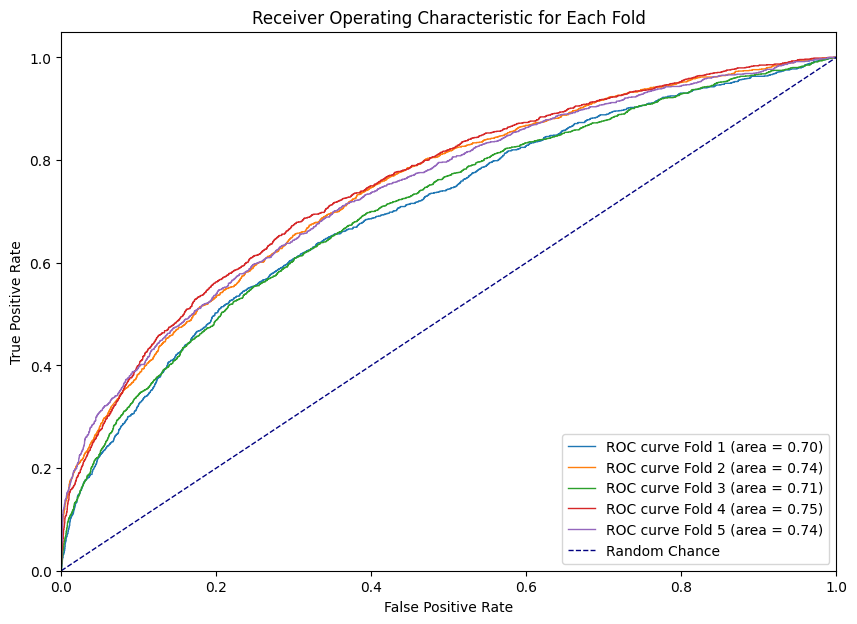

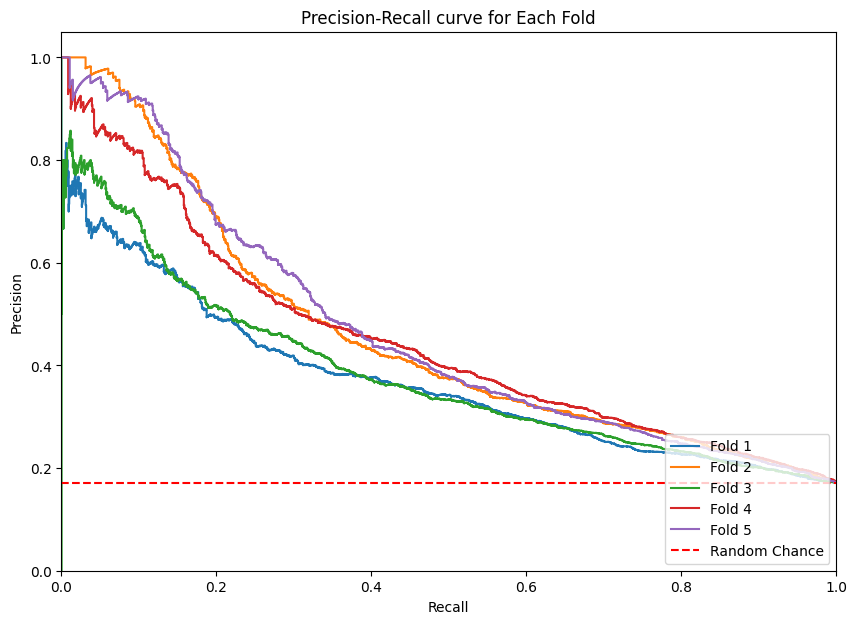

Epoch 1/20
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6651 - auc: 0.6345 - precision: 0.2356 - recall: 0.5822 - f1_metric: 0.3152 - val_loss: 0.5218 - val_auc: 0.7134 - val_precision: 0.3806 - val_recall: 0.4244 - val_f1_metric: 0.3819
Epoch 2/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6387 - auc: 0.6832 - precision: 0.2762 - recall: 0.5758 - f1_metric: 0.3586 - val_loss: 0.6747 - val_auc: 0.7284 - val_precision: 0.2693 - val_recall: 0.7344 - val_f1_metric: 0.3806
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6264 - auc: 0.7003 - precision: 0.2902 - recall: 0.5852 - f1_metric: 0.3747 - val_loss: 0.6179 - val_auc: 0.7394 - val_precision: 0.3027 - val_recall: 0.6553 - val_f1_metric: 0.3998
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6198 - auc: 0.7094 - precision: 0.2949 - recall: 0.5978 - f1_metric: 0.3804 - val_loss: 0.5392 - val_auc: 0.7426 - val_precision: 0.3992 - val

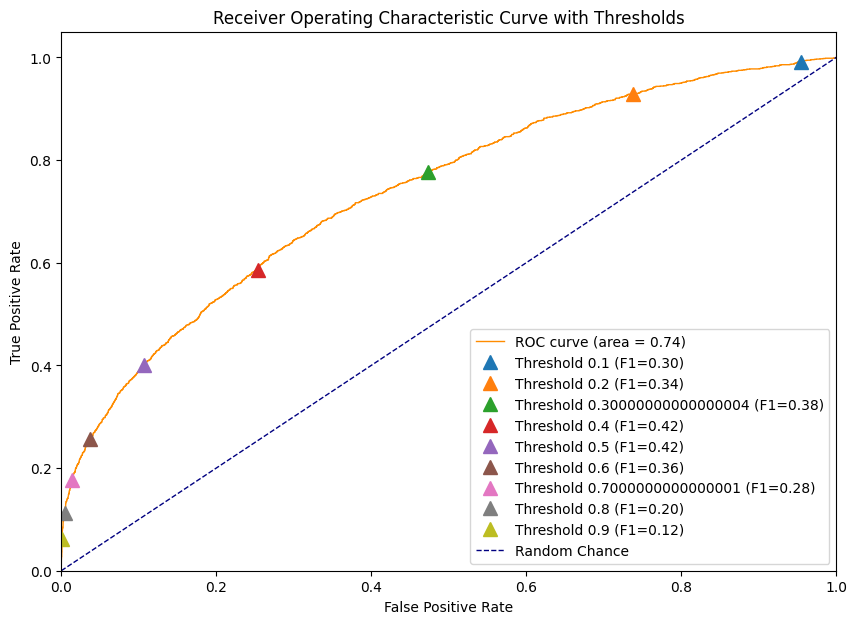

335/335 [==============================] - 0s 1ms/step


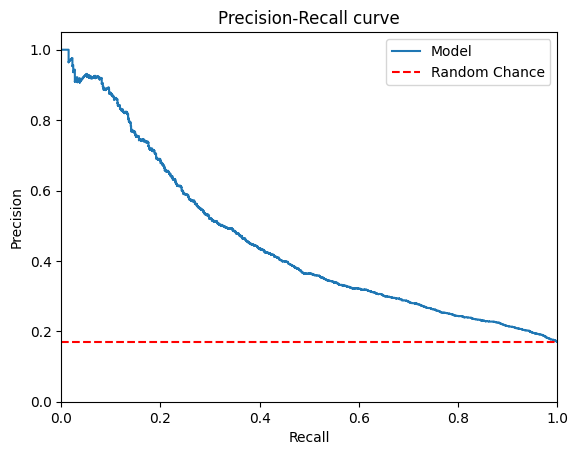

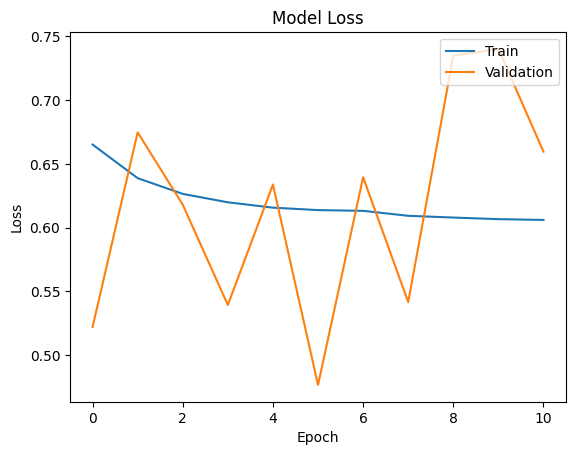

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.13636363636363635
AUC Confidence interval: (0.73, 0.75)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN_f1(df, 'bert_base_embeddings_average')

[I 2023-09-12 13:42:12,459] A new study created in memory with name: no-name-2a30ffae-0d1c-4d4c-bc0d-352a40d8bab4


268/268 [==============================] - 1s 2ms/step - loss: 0.6247 - f1_metric: 0.4195


[I 2023-09-12 13:42:46,449] Trial 0 finished with value: 0.4194546639919281 and parameters: {'dropout_rate': 0.4939720637528524, 'n_units': 42, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4194546639919281.


268/268 [==============================] - 1s 2ms/step - loss: 0.5827 - f1_metric: 0.4293


[I 2023-09-12 13:43:19,423] Trial 1 finished with value: 0.4292506277561188 and parameters: {'dropout_rate': 0.41902560774201725, 'n_units': 120, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4292506277561188.


268/268 [==============================] - 1s 2ms/step - loss: 0.5571 - f1_metric: 0.4226


[I 2023-09-12 13:43:52,834] Trial 2 finished with value: 0.4226180911064148 and parameters: {'dropout_rate': 0.40402871522141715, 'n_units': 119, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4292506277561188.


268/268 [==============================] - 1s 2ms/step - loss: 0.6649 - f1_metric: 0.3980


[I 2023-09-12 13:44:25,786] Trial 3 finished with value: 0.39798712730407715 and parameters: {'dropout_rate': 0.47095909030440175, 'n_units': 75, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4292506277561188.


268/268 [==============================] - 1s 2ms/step - loss: 0.5293 - f1_metric: 0.4352


[I 2023-09-12 13:44:59,960] Trial 4 finished with value: 0.43520990014076233 and parameters: {'dropout_rate': 0.17017415855686302, 'n_units': 80, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5531 - f1_metric: 0.4316


[I 2023-09-12 13:45:33,625] Trial 5 finished with value: 0.4315798282623291 and parameters: {'dropout_rate': 0.37726390518679587, 'n_units': 61, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5096 - f1_metric: 0.4343


[I 2023-09-12 13:46:07,598] Trial 6 finished with value: 0.43425318598747253 and parameters: {'dropout_rate': 0.1796488868810312, 'n_units': 65, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5015 - f1_metric: 0.4293


[I 2023-09-12 13:46:41,053] Trial 7 finished with value: 0.4292578399181366 and parameters: {'dropout_rate': 0.1796756044570152, 'n_units': 63, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5865 - f1_metric: 0.4257


[I 2023-09-12 13:47:14,712] Trial 8 finished with value: 0.42573314905166626 and parameters: {'dropout_rate': 0.20336075578239626, 'n_units': 120, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5702 - f1_metric: 0.4271


[I 2023-09-12 13:47:48,924] Trial 9 finished with value: 0.4270836114883423 and parameters: {'dropout_rate': 0.270072914001775, 'n_units': 95, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.5080 - f1_metric: 0.4351


[I 2023-09-12 13:48:21,263] Trial 10 finished with value: 0.43514010310173035 and parameters: {'dropout_rate': 0.1087436130769738, 'n_units': 95, 'optimizer': 'RMSprop'}. Best is trial 4 with value: 0.43520990014076233.


268/268 [==============================] - 1s 2ms/step - loss: 0.4853 - f1_metric: 0.4359


[I 2023-09-12 13:48:54,092] Trial 11 finished with value: 0.43591809272766113 and parameters: {'dropout_rate': 0.11972330674100735, 'n_units': 96, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.43591809272766113.


268/268 [==============================] - 1s 2ms/step - loss: 0.6061 - f1_metric: 0.4253


[I 2023-09-12 13:49:28,429] Trial 12 finished with value: 0.4253156781196594 and parameters: {'dropout_rate': 0.10984056136370027, 'n_units': 95, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.43591809272766113.


268/268 [==============================] - 1s 2ms/step - loss: 0.5814 - f1_metric: 0.4268


[I 2023-09-12 13:50:01,588] Trial 13 finished with value: 0.42677444219589233 and parameters: {'dropout_rate': 0.2627677018604971, 'n_units': 85, 'optimizer': 'RMSprop'}. Best is trial 11 with value: 0.43591809272766113.


268/268 [==============================] - 1s 2ms/step - loss: 0.5394 - f1_metric: 0.4348


[I 2023-09-12 13:50:36,173] Trial 14 finished with value: 0.43478599190711975 and parameters: {'dropout_rate': 0.1030523857060511, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 11 with value: 0.43591809272766113.


Fold [    7    10    12 ... 42861 42865 42867]
Best f1_metric: 0.43591809272766113
Best hyperparameters: {'dropout_rate': 0.11972330674100735, 'n_units': 96, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:51:12,346] A new study created in memory with name: no-name-ce98354e-f0ca-4a45-8a92-71037ab4e8a8


268/268 [==============================] - 1s 2ms/step - loss: 0.5995 - f1_metric: 0.4195


[I 2023-09-12 13:51:45,548] Trial 0 finished with value: 0.4195394515991211 and parameters: {'dropout_rate': 0.21513701874242375, 'n_units': 126, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.4195394515991211.


268/268 [==============================] - 1s 2ms/step - loss: 0.6155 - f1_metric: 0.4203


[I 2023-09-12 13:52:18,708] Trial 1 finished with value: 0.420274555683136 and parameters: {'dropout_rate': 0.37003590935146746, 'n_units': 88, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.420274555683136.


268/268 [==============================] - 1s 2ms/step - loss: 0.4654 - f1_metric: 0.4190


[I 2023-09-12 13:52:52,297] Trial 2 finished with value: 0.41897615790367126 and parameters: {'dropout_rate': 0.24149130018913711, 'n_units': 116, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.420274555683136.


268/268 [==============================] - 1s 2ms/step - loss: 0.5547 - f1_metric: 0.4321


[I 2023-09-12 13:53:27,035] Trial 3 finished with value: 0.432073712348938 and parameters: {'dropout_rate': 0.11740934480963815, 'n_units': 110, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.432073712348938.


268/268 [==============================] - 1s 2ms/step - loss: 0.6160 - f1_metric: 0.4203


[I 2023-09-12 13:54:01,725] Trial 4 finished with value: 0.42033252120018005 and parameters: {'dropout_rate': 0.32461387928021823, 'n_units': 104, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.432073712348938.


268/268 [==============================] - 1s 2ms/step - loss: 0.5139 - f1_metric: 0.4322


[I 2023-09-12 13:54:35,124] Trial 5 finished with value: 0.43216314911842346 and parameters: {'dropout_rate': 0.22488613060271742, 'n_units': 107, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.43216314911842346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6264 - f1_metric: 0.4030


[I 2023-09-12 13:55:09,252] Trial 6 finished with value: 0.403047114610672 and parameters: {'dropout_rate': 0.4599615222875858, 'n_units': 50, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.43216314911842346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6576 - f1_metric: 0.4060


[I 2023-09-12 13:55:42,380] Trial 7 finished with value: 0.40599724650382996 and parameters: {'dropout_rate': 0.21330603050199157, 'n_units': 98, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.43216314911842346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6102 - f1_metric: 0.4043


[I 2023-09-12 13:56:15,243] Trial 8 finished with value: 0.40428265929222107 and parameters: {'dropout_rate': 0.41270787349836957, 'n_units': 47, 'optimizer': 'RMSprop'}. Best is trial 5 with value: 0.43216314911842346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5656 - f1_metric: 0.4309


[I 2023-09-12 13:56:49,771] Trial 9 finished with value: 0.43092232942581177 and parameters: {'dropout_rate': 0.12256092885516093, 'n_units': 91, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.43216314911842346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5613 - f1_metric: 0.4358


[I 2023-09-12 13:57:22,476] Trial 10 finished with value: 0.435802161693573 and parameters: {'dropout_rate': 0.3336843899486923, 'n_units': 72, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.435802161693573.


268/268 [==============================] - 1s 2ms/step - loss: 0.5855 - f1_metric: 0.4226


[I 2023-09-12 13:57:55,126] Trial 11 finished with value: 0.4225521683692932 and parameters: {'dropout_rate': 0.30040068605268505, 'n_units': 67, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.435802161693573.


268/268 [==============================] - 1s 2ms/step - loss: 0.4497 - f1_metric: 0.4147


[I 2023-09-12 13:58:27,880] Trial 12 finished with value: 0.4146633446216583 and parameters: {'dropout_rate': 0.371937806872301, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.435802161693573.


268/268 [==============================] - 1s 2ms/step - loss: 0.6097 - f1_metric: 0.4128


[I 2023-09-12 13:59:00,249] Trial 13 finished with value: 0.41279488801956177 and parameters: {'dropout_rate': 0.2661280718496538, 'n_units': 70, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.435802161693573.


268/268 [==============================] - 1s 2ms/step - loss: 0.6474 - f1_metric: 0.3978


[I 2023-09-12 13:59:33,242] Trial 14 finished with value: 0.3978245258331299 and parameters: {'dropout_rate': 0.4823650901786246, 'n_units': 82, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 0.435802161693573.


Fold [    6     8    16 ... 42839 42848 42866]
Best f1_metric: 0.435802161693573
Best hyperparameters: {'dropout_rate': 0.3336843899486923, 'n_units': 72, 'optimizer': 'RMSprop'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 13:59:58,000] A new study created in memory with name: no-name-120ea6e9-f9e3-49d4-a39b-9dad8b07a579


268/268 [==============================] - 1s 2ms/step - loss: 0.5419 - f1_metric: 0.4121


[I 2023-09-12 14:00:31,756] Trial 0 finished with value: 0.4121253490447998 and parameters: {'dropout_rate': 0.4871989758383941, 'n_units': 94, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4121253490447998.


268/268 [==============================] - 1s 2ms/step - loss: 0.5468 - f1_metric: 0.4181


[I 2023-09-12 14:01:04,659] Trial 1 finished with value: 0.4180874228477478 and parameters: {'dropout_rate': 0.391449846515053, 'n_units': 111, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4180874228477478.


268/268 [==============================] - 1s 2ms/step - loss: 0.5821 - f1_metric: 0.4216


[I 2023-09-12 14:01:38,192] Trial 2 finished with value: 0.4216487407684326 and parameters: {'dropout_rate': 0.2334173771994249, 'n_units': 82, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.4216487407684326.


268/268 [==============================] - 1s 2ms/step - loss: 0.5513 - f1_metric: 0.4270


[I 2023-09-12 14:02:12,805] Trial 3 finished with value: 0.4269527494907379 and parameters: {'dropout_rate': 0.1926706314259926, 'n_units': 62, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.5782 - f1_metric: 0.4156


[I 2023-09-12 14:02:49,049] Trial 4 finished with value: 0.4156079888343811 and parameters: {'dropout_rate': 0.41759011333791074, 'n_units': 115, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.6644 - f1_metric: 0.3729


[I 2023-09-12 14:03:23,120] Trial 5 finished with value: 0.37294939160346985 and parameters: {'dropout_rate': 0.27536069542720853, 'n_units': 38, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.7200 - f1_metric: 0.3514


[I 2023-09-12 14:03:56,731] Trial 6 finished with value: 0.3514413833618164 and parameters: {'dropout_rate': 0.1790930008094821, 'n_units': 115, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.5511 - f1_metric: 0.4179


[I 2023-09-12 14:04:30,374] Trial 7 finished with value: 0.4178735911846161 and parameters: {'dropout_rate': 0.11067819036321894, 'n_units': 62, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.6187 - f1_metric: 0.4112


[I 2023-09-12 14:05:05,734] Trial 8 finished with value: 0.4112195074558258 and parameters: {'dropout_rate': 0.41896054417426665, 'n_units': 99, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.5306 - f1_metric: 0.4076


[I 2023-09-12 14:05:39,074] Trial 9 finished with value: 0.40762442350387573 and parameters: {'dropout_rate': 0.3526547836517313, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 3 with value: 0.4269527494907379.


268/268 [==============================] - 1s 2ms/step - loss: 0.5794 - f1_metric: 0.4271


[I 2023-09-12 14:06:14,062] Trial 10 finished with value: 0.4270898401737213 and parameters: {'dropout_rate': 0.20073361954394442, 'n_units': 65, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.4270898401737213.


268/268 [==============================] - 1s 2ms/step - loss: 0.6071 - f1_metric: 0.4128


[I 2023-09-12 14:06:48,196] Trial 11 finished with value: 0.4127981960773468 and parameters: {'dropout_rate': 0.19237556241765696, 'n_units': 65, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.4270898401737213.


268/268 [==============================] - 1s 2ms/step - loss: 0.5771 - f1_metric: 0.4151


[I 2023-09-12 14:07:22,637] Trial 12 finished with value: 0.4151046872138977 and parameters: {'dropout_rate': 0.26392326771398317, 'n_units': 46, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.4270898401737213.


268/268 [==============================] - 1s 2ms/step - loss: 0.4763 - f1_metric: 0.4145


[I 2023-09-12 14:07:57,365] Trial 13 finished with value: 0.4144672453403473 and parameters: {'dropout_rate': 0.12440529001751388, 'n_units': 74, 'optimizer': 'Adam'}. Best is trial 10 with value: 0.4270898401737213.


268/268 [==============================] - 1s 2ms/step - loss: 0.5346 - f1_metric: 0.4295


[I 2023-09-12 14:08:31,908] Trial 14 finished with value: 0.42952701449394226 and parameters: {'dropout_rate': 0.18892306406193568, 'n_units': 76, 'optimizer': 'Adam'}. Best is trial 14 with value: 0.42952701449394226.


Fold [    3     5    17 ... 42862 42864 42868]
Best f1_metric: 0.42952701449394226
Best hyperparameters: {'dropout_rate': 0.18892306406193568, 'n_units': 76, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 14:08:58,073] A new study created in memory with name: no-name-8f262b1a-d3df-4fdd-add0-39c70a7d0ebc


268/268 [==============================] - 1s 2ms/step - loss: 0.6031 - f1_metric: 0.4155


[I 2023-09-12 14:09:32,376] Trial 0 finished with value: 0.4154539108276367 and parameters: {'dropout_rate': 0.23298360740591217, 'n_units': 33, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4154539108276367.


268/268 [==============================] - 1s 2ms/step - loss: 0.5649 - f1_metric: 0.4394


[I 2023-09-12 14:10:06,239] Trial 1 finished with value: 0.4393763244152069 and parameters: {'dropout_rate': 0.3172970820232608, 'n_units': 66, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4393763244152069.


268/268 [==============================] - 1s 2ms/step - loss: 0.6107 - f1_metric: 0.4189


[I 2023-09-12 14:10:39,899] Trial 2 finished with value: 0.41891637444496155 and parameters: {'dropout_rate': 0.3941973477312277, 'n_units': 61, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4393763244152069.


268/268 [==============================] - 1s 2ms/step - loss: 0.4448 - f1_metric: 0.3794


[I 2023-09-12 14:11:13,377] Trial 3 finished with value: 0.37936466932296753 and parameters: {'dropout_rate': 0.33577408590129254, 'n_units': 105, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.4393763244152069.


268/268 [==============================] - 1s 2ms/step - loss: 0.4721 - f1_metric: 0.4129


[I 2023-09-12 14:11:48,358] Trial 4 finished with value: 0.41290757060050964 and parameters: {'dropout_rate': 0.2627474377504716, 'n_units': 92, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4393763244152069.


268/268 [==============================] - 1s 2ms/step - loss: 0.6349 - f1_metric: 0.4066


[I 2023-09-12 14:12:22,948] Trial 5 finished with value: 0.40655767917633057 and parameters: {'dropout_rate': 0.4835090903849708, 'n_units': 43, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.4393763244152069.


268/268 [==============================] - 1s 2ms/step - loss: 0.5368 - f1_metric: 0.4492


[I 2023-09-12 14:12:57,681] Trial 6 finished with value: 0.4492090046405792 and parameters: {'dropout_rate': 0.11920770119121267, 'n_units': 73, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.4465 - f1_metric: 0.4098


[I 2023-09-12 14:13:31,376] Trial 7 finished with value: 0.40978842973709106 and parameters: {'dropout_rate': 0.24036166910855084, 'n_units': 33, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.6762 - f1_metric: 0.3871


[I 2023-09-12 14:14:06,798] Trial 8 finished with value: 0.3870956599712372 and parameters: {'dropout_rate': 0.22531150868242458, 'n_units': 122, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.5583 - f1_metric: 0.4400


[I 2023-09-12 14:14:40,832] Trial 9 finished with value: 0.43995174765586853 and parameters: {'dropout_rate': 0.22484553591356052, 'n_units': 51, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.6576 - f1_metric: 0.4050


[I 2023-09-12 14:15:15,883] Trial 10 finished with value: 0.4049595296382904 and parameters: {'dropout_rate': 0.11736964896316683, 'n_units': 81, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.5485 - f1_metric: 0.4365


[I 2023-09-12 14:15:48,917] Trial 11 finished with value: 0.4365485608577728 and parameters: {'dropout_rate': 0.11862651463012423, 'n_units': 61, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.5919 - f1_metric: 0.4200


[I 2023-09-12 14:16:22,900] Trial 12 finished with value: 0.4199850261211395 and parameters: {'dropout_rate': 0.1682349369713212, 'n_units': 54, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.5732 - f1_metric: 0.4281


[I 2023-09-12 14:16:57,674] Trial 13 finished with value: 0.4280528128147125 and parameters: {'dropout_rate': 0.16522540415047413, 'n_units': 82, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4492090046405792.


268/268 [==============================] - 1s 2ms/step - loss: 0.6181 - f1_metric: 0.4227


[I 2023-09-12 14:17:32,211] Trial 14 finished with value: 0.4226749539375305 and parameters: {'dropout_rate': 0.17802681185090485, 'n_units': 54, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4492090046405792.


Fold [    1    11    15 ... 42852 42856 42863]
Best f1_metric: 0.4492090046405792
Best hyperparameters: {'dropout_rate': 0.11920770119121267, 'n_units': 73, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


[I 2023-09-12 14:18:13,555] A new study created in memory with name: no-name-6969923d-8d3d-4100-b1dd-80ad589b2ca1


268/268 [==============================] - 1s 2ms/step - loss: 0.5236 - f1_metric: 0.4211


[I 2023-09-12 14:18:48,040] Trial 0 finished with value: 0.42106759548187256 and parameters: {'dropout_rate': 0.2949915417107928, 'n_units': 125, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.6258 - f1_metric: 0.4011


[I 2023-09-12 14:19:22,691] Trial 1 finished with value: 0.4011377990245819 and parameters: {'dropout_rate': 0.15109042294960973, 'n_units': 62, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.4562 - f1_metric: 0.4156


[I 2023-09-12 14:19:55,959] Trial 2 finished with value: 0.41556718945503235 and parameters: {'dropout_rate': 0.20682580386793986, 'n_units': 62, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.4624 - f1_metric: 0.4160


[I 2023-09-12 14:20:29,547] Trial 3 finished with value: 0.41596388816833496 and parameters: {'dropout_rate': 0.17852577122624735, 'n_units': 85, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.6214 - f1_metric: 0.4053


[I 2023-09-12 14:21:02,539] Trial 4 finished with value: 0.40526890754699707 and parameters: {'dropout_rate': 0.1317177611372638, 'n_units': 35, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.5620 - f1_metric: 0.4170


[I 2023-09-12 14:21:36,919] Trial 5 finished with value: 0.4170270264148712 and parameters: {'dropout_rate': 0.17595615824629804, 'n_units': 93, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.6058 - f1_metric: 0.4013


[I 2023-09-12 14:22:09,869] Trial 6 finished with value: 0.4013034999370575 and parameters: {'dropout_rate': 0.435599877141282, 'n_units': 59, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.5632 - f1_metric: 0.4180


[I 2023-09-12 14:22:42,590] Trial 7 finished with value: 0.41797271370887756 and parameters: {'dropout_rate': 0.4221014155023691, 'n_units': 71, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.42106759548187256.


268/268 [==============================] - 1s 2ms/step - loss: 0.5377 - f1_metric: 0.4250


[I 2023-09-12 14:23:16,612] Trial 8 finished with value: 0.42503464221954346 and parameters: {'dropout_rate': 0.14453168767761093, 'n_units': 118, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6237 - f1_metric: 0.4040


[I 2023-09-12 14:23:50,553] Trial 9 finished with value: 0.4039634168148041 and parameters: {'dropout_rate': 0.432629120434477, 'n_units': 71, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.7024 - f1_metric: 0.3887


[I 2023-09-12 14:24:24,520] Trial 10 finished with value: 0.38866814970970154 and parameters: {'dropout_rate': 0.11380925496455584, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5812 - f1_metric: 0.4156


[I 2023-09-12 14:24:58,699] Trial 11 finished with value: 0.41559359431266785 and parameters: {'dropout_rate': 0.2642009088128769, 'n_units': 128, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5786 - f1_metric: 0.4094


[I 2023-09-12 14:25:33,342] Trial 12 finished with value: 0.4094271957874298 and parameters: {'dropout_rate': 0.3205647439300027, 'n_units': 107, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.6000 - f1_metric: 0.4076


[I 2023-09-12 14:26:07,188] Trial 13 finished with value: 0.40760406851768494 and parameters: {'dropout_rate': 0.2687094152605352, 'n_units': 110, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


268/268 [==============================] - 1s 2ms/step - loss: 0.5817 - f1_metric: 0.4107


[I 2023-09-12 14:26:41,078] Trial 14 finished with value: 0.4106772840023041 and parameters: {'dropout_rate': 0.1006952450417194, 'n_units': 110, 'optimizer': 'Adam'}. Best is trial 8 with value: 0.42503464221954346.


Fold [    0     2     4 ... 42835 42840 42854]
Best f1_metric: 0.42503464221954346
Best hyperparameters: {'dropout_rate': 0.14453168767761093, 'n_units': 118, 'optimizer': 'Adam'}
268/268 [==============================] - 0s 1ms/step


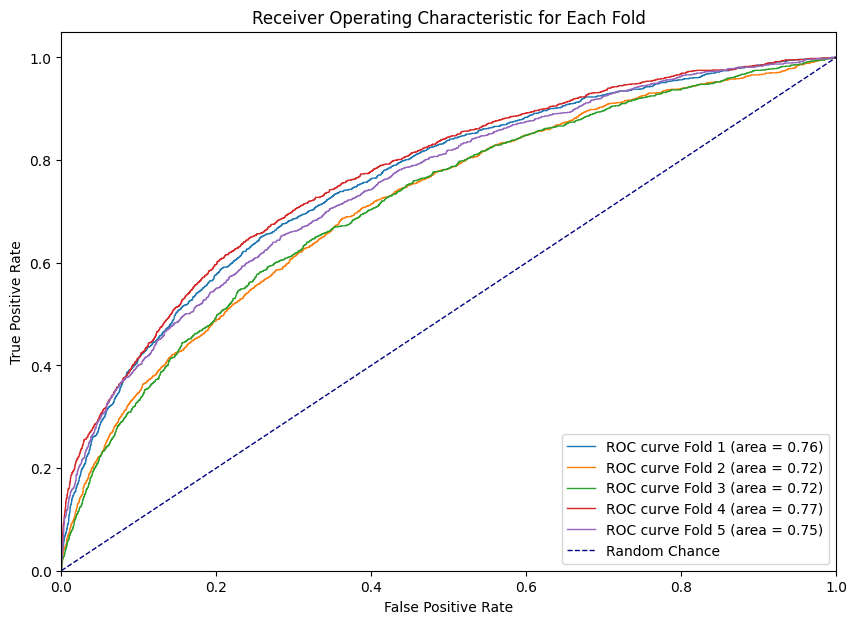

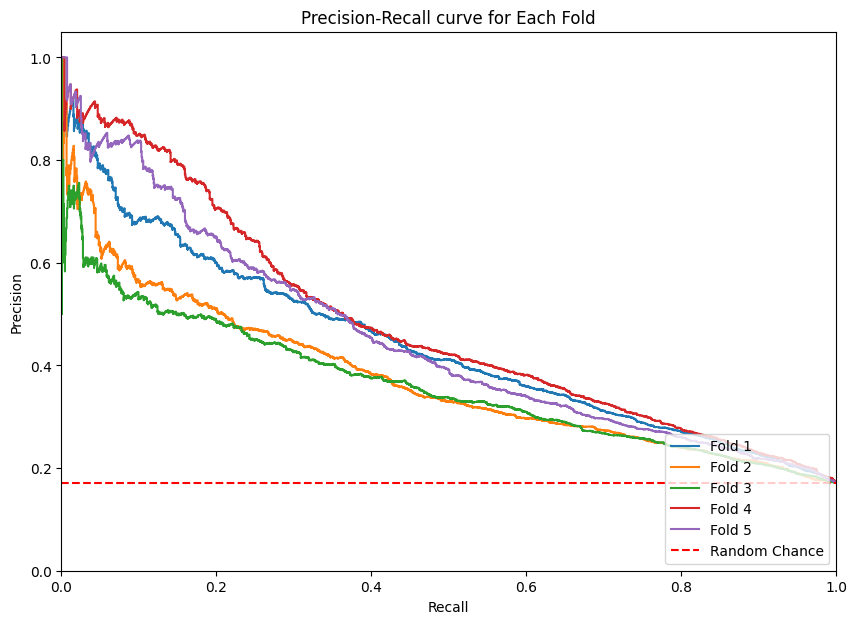

Epoch 1/20
1005/1005 [==============================] - 6s 5ms/step - loss: 0.6520 - auc: 0.6603 - precision: 0.2552 - recall: 0.5817 - f1_metric: 0.3388 - val_loss: 0.5585 - val_auc: 0.7417 - val_precision: 0.3925 - val_recall: 0.4869 - val_f1_metric: 0.4128
Epoch 2/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.6217 - auc: 0.7113 - precision: 0.2913 - recall: 0.6130 - f1_metric: 0.3826 - val_loss: 0.6079 - val_auc: 0.7545 - val_precision: 0.3533 - val_recall: 0.5986 - val_f1_metric: 0.4276
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6118 - auc: 0.7239 - precision: 0.3035 - recall: 0.6282 - f1_metric: 0.3929 - val_loss: 0.5275 - val_auc: 0.7597 - val_precision: 0.4730 - val_recall: 0.3795 - val_f1_metric: 0.3904
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.6056 - auc: 0.7320 - precision: 0.3056 - recall: 0.6363 - f1_metric: 0.3991 - val_loss: 0.6501 - val_auc: 0.7635 - val_precision: 0.2959 - val

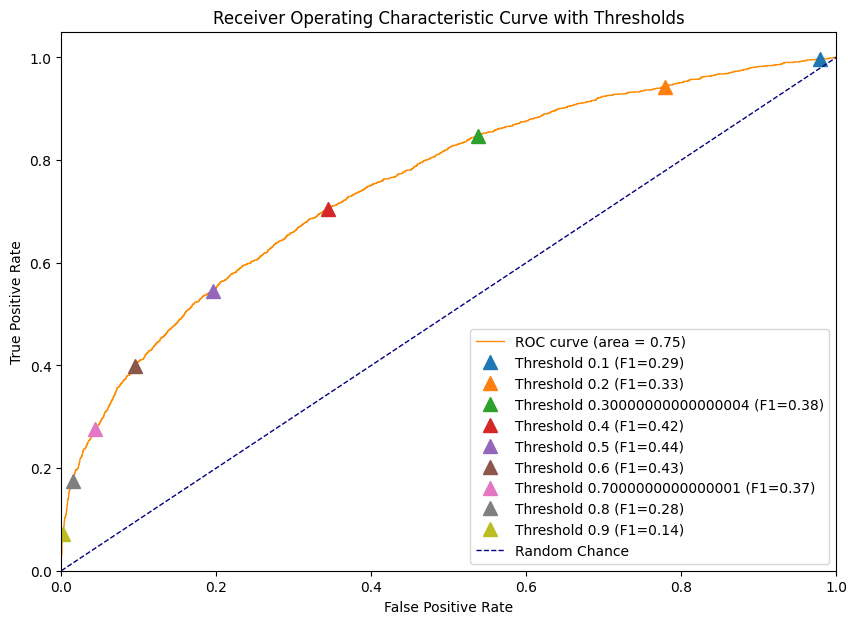

335/335 [==============================] - 0s 1ms/step


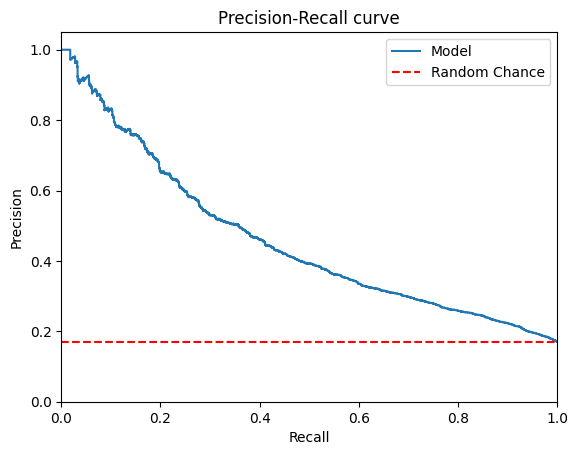

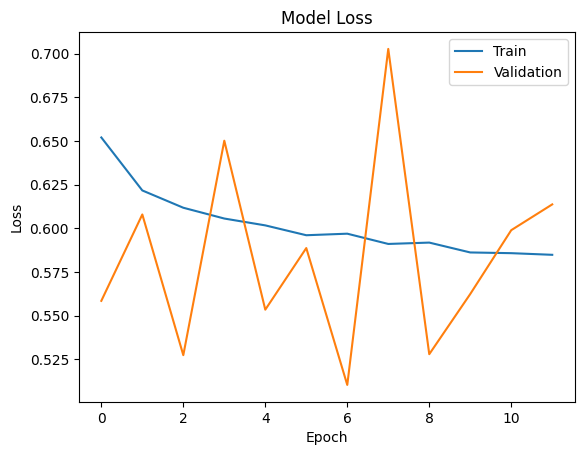

335/335 [==============================] - 0s 1ms/step
Recall at a precision of 80% is: 0.10624315443592552
AUC Confidence interval: (0.74, 0.76)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
run_FFNN_f1(df, 'longformer_embeddings')